# Visualise actual monthly mean prices of all RM_codes

In [5]:
%%capture
!pip install fredapi # To install additional package for Datalab

In [6]:
import preprocessor as pre
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style("whitegrid")

def draw_actual_combined_graphs(df, target_dict):
    """
    Visualise actual monthly mean prices of all RM_codes, grouped by Group Description
    """
    for target, RM_codes in target_dict.items():
        plt.figure(figsize=(15, 6))
        
        for code in RM_codes:
            # Filter the dataframe for each RM code
            code_df = df[df['Key RM code'] == code]
            code_df['year_month'] = code_df['Year'].astype(str) + "-" + code_df['Month'].astype(str)
            
            # Plot each RM code's price evolution
            sns.lineplot(data=code_df, x='year_month', y='PRICE (EUR/kg)', label=code, ci=None) # ci=None to remove graph shaded area
            
            filtered_df = code_df[code_df['year_month'].str.endswith(('3', '6', '9', '12'))]
            plt.xticks(ticks = filtered_df['year_month'], label = filtered_df['year_month'], rotation=45)
            
        plt.title(f"Price Evolution for {target}")
        plt.xlabel("Time")
        plt.ylabel("Average Price")
        plt.legend(title="Key RM Code")
        plt.show()

        
        
def draw_actual_individual_graphs(df, target_dict):
    """
    Visualise actual monthly mean prices of all RM_codes, individually
    """

    for code in df["Key RM code"].unique():
        plt.figure(figsize=(15, 6))

        # Filter the dataframe for each RM code
        code_df = df[df['Key RM code'] == code]
        code_df['year_month'] = code_df['Year'].astype(str) + "-" + code_df['Month'].astype(str)

        # Plot each RM code's price evolution
        sns.lineplot(data=code_df, x='year_month', y='PRICE (EUR/kg)', label=code, ci=None) # ci=None to remove graph shaded area

        filtered_df = code_df[code_df['year_month'].str.endswith(('3', '6', '9', '12'))]
        plt.xticks(ticks = filtered_df['year_month'], label = filtered_df['year_month'], rotation=45)

        plt.title(f"Price Evolution for {code}")
        plt.xlabel("Time")
        plt.ylabel("Average Price")
        plt.legend(title="Key RM Code")
        plt.show()
        


In [7]:

df = pre.clean_pred_price_evo_csv('Data_flat_files/Dataset_Future_Predicting_Price_Evolutions_202403.csv',2014,2023)

df = df[df.Year.between(2016,2023,inclusive="both")]

codes = df["Group Description"].sort_values()

target_dict = dict()
for i in range(0,8):
    target_dict[codes.unique()[i]] = df.groupby(codes)["Key RM code"].unique()[i]
    
imputed_df, missing = pre.impute_pred_price_evo_csv(df)

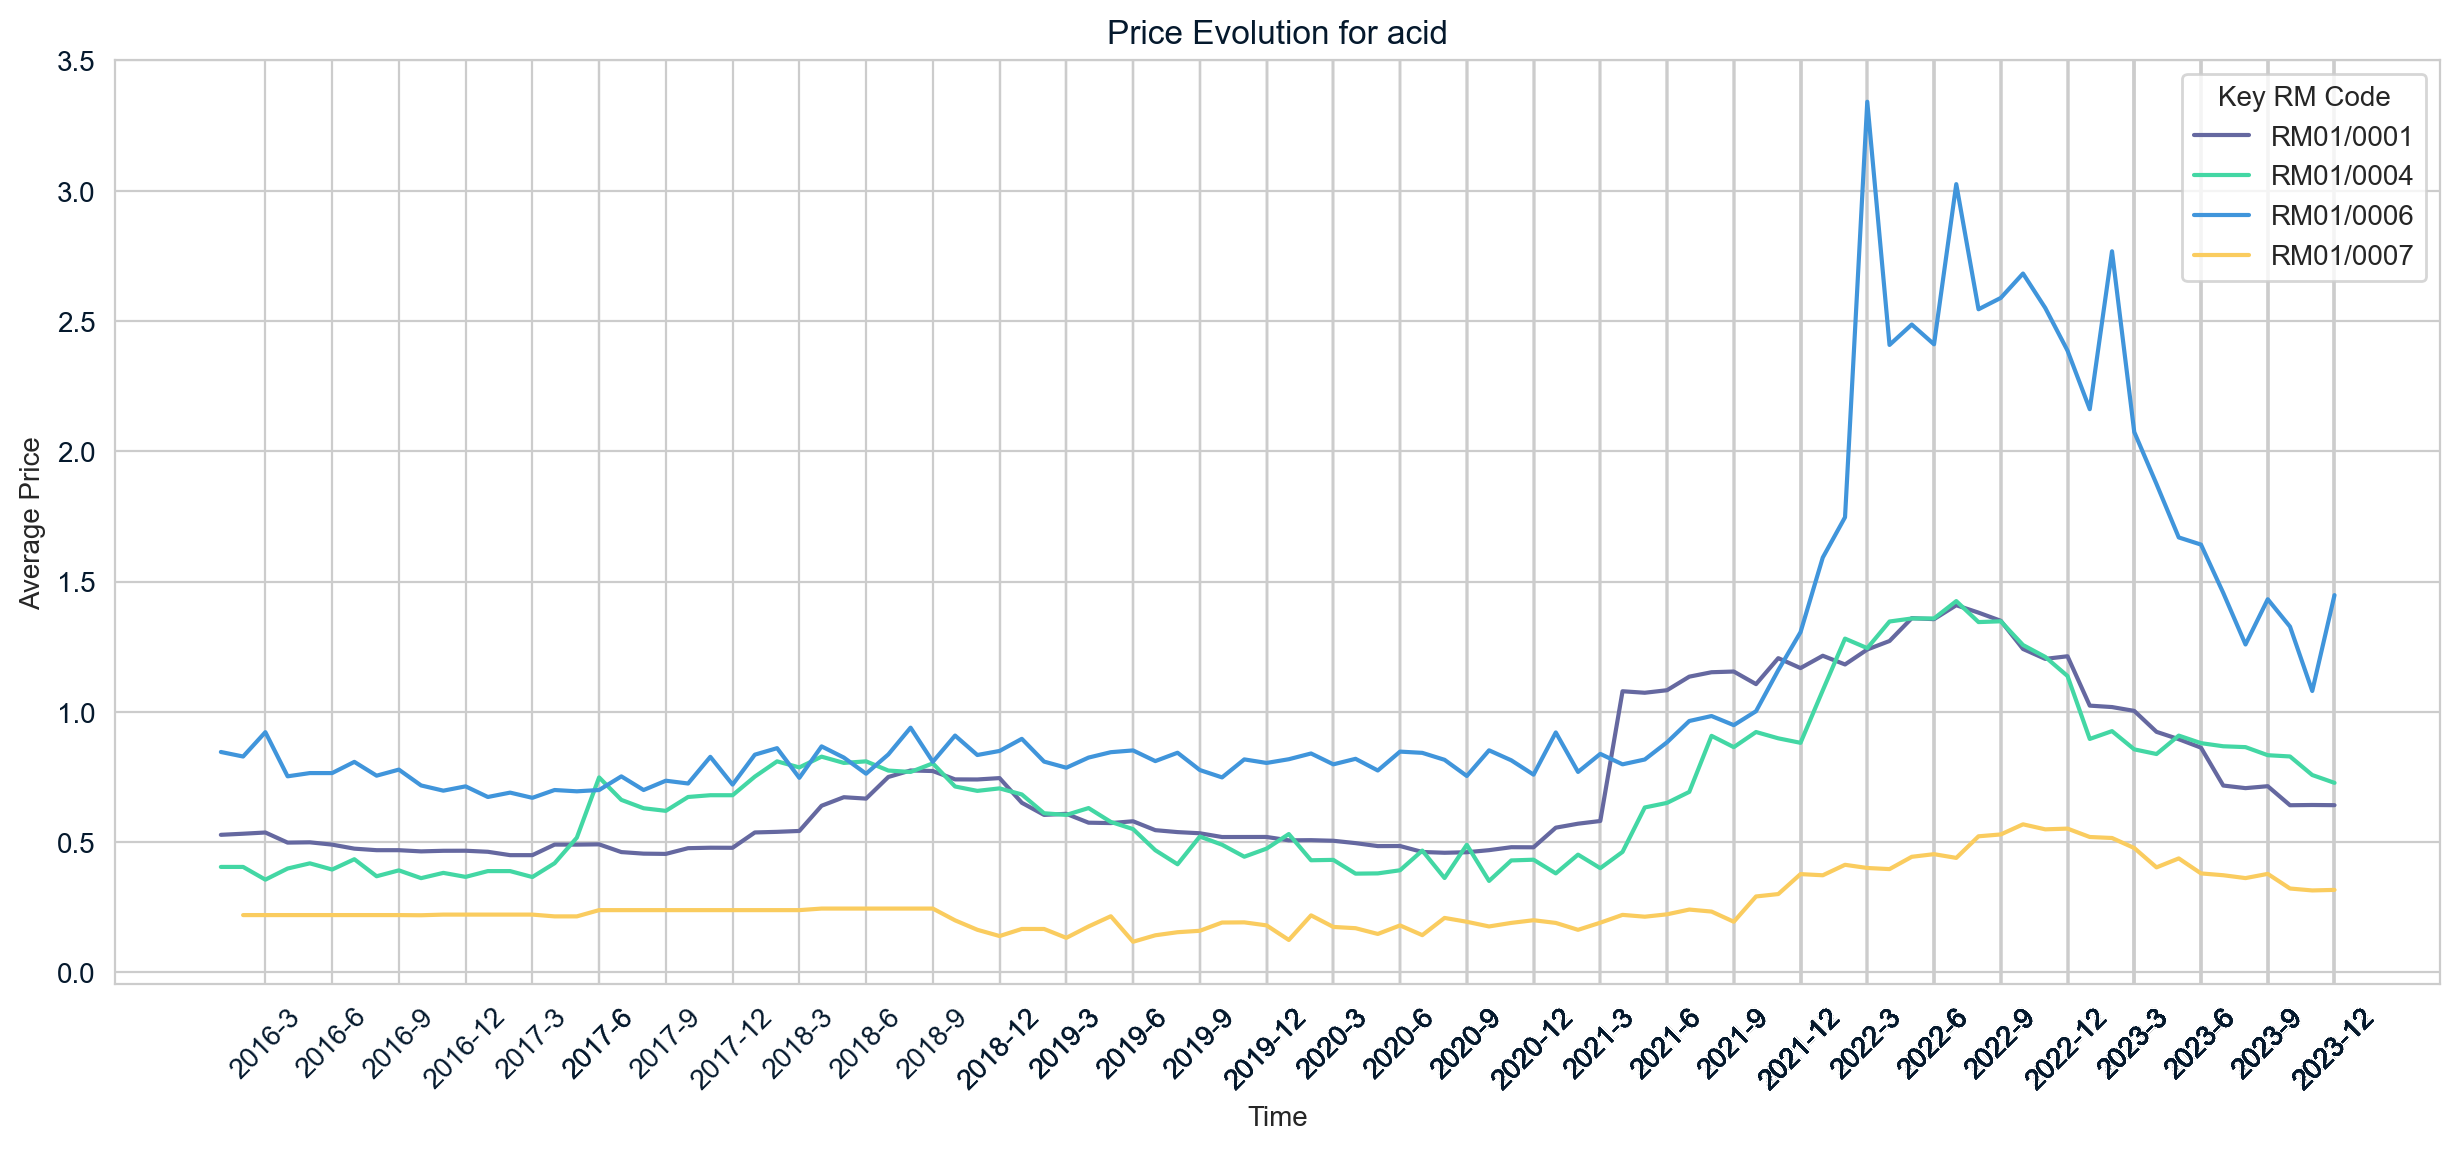

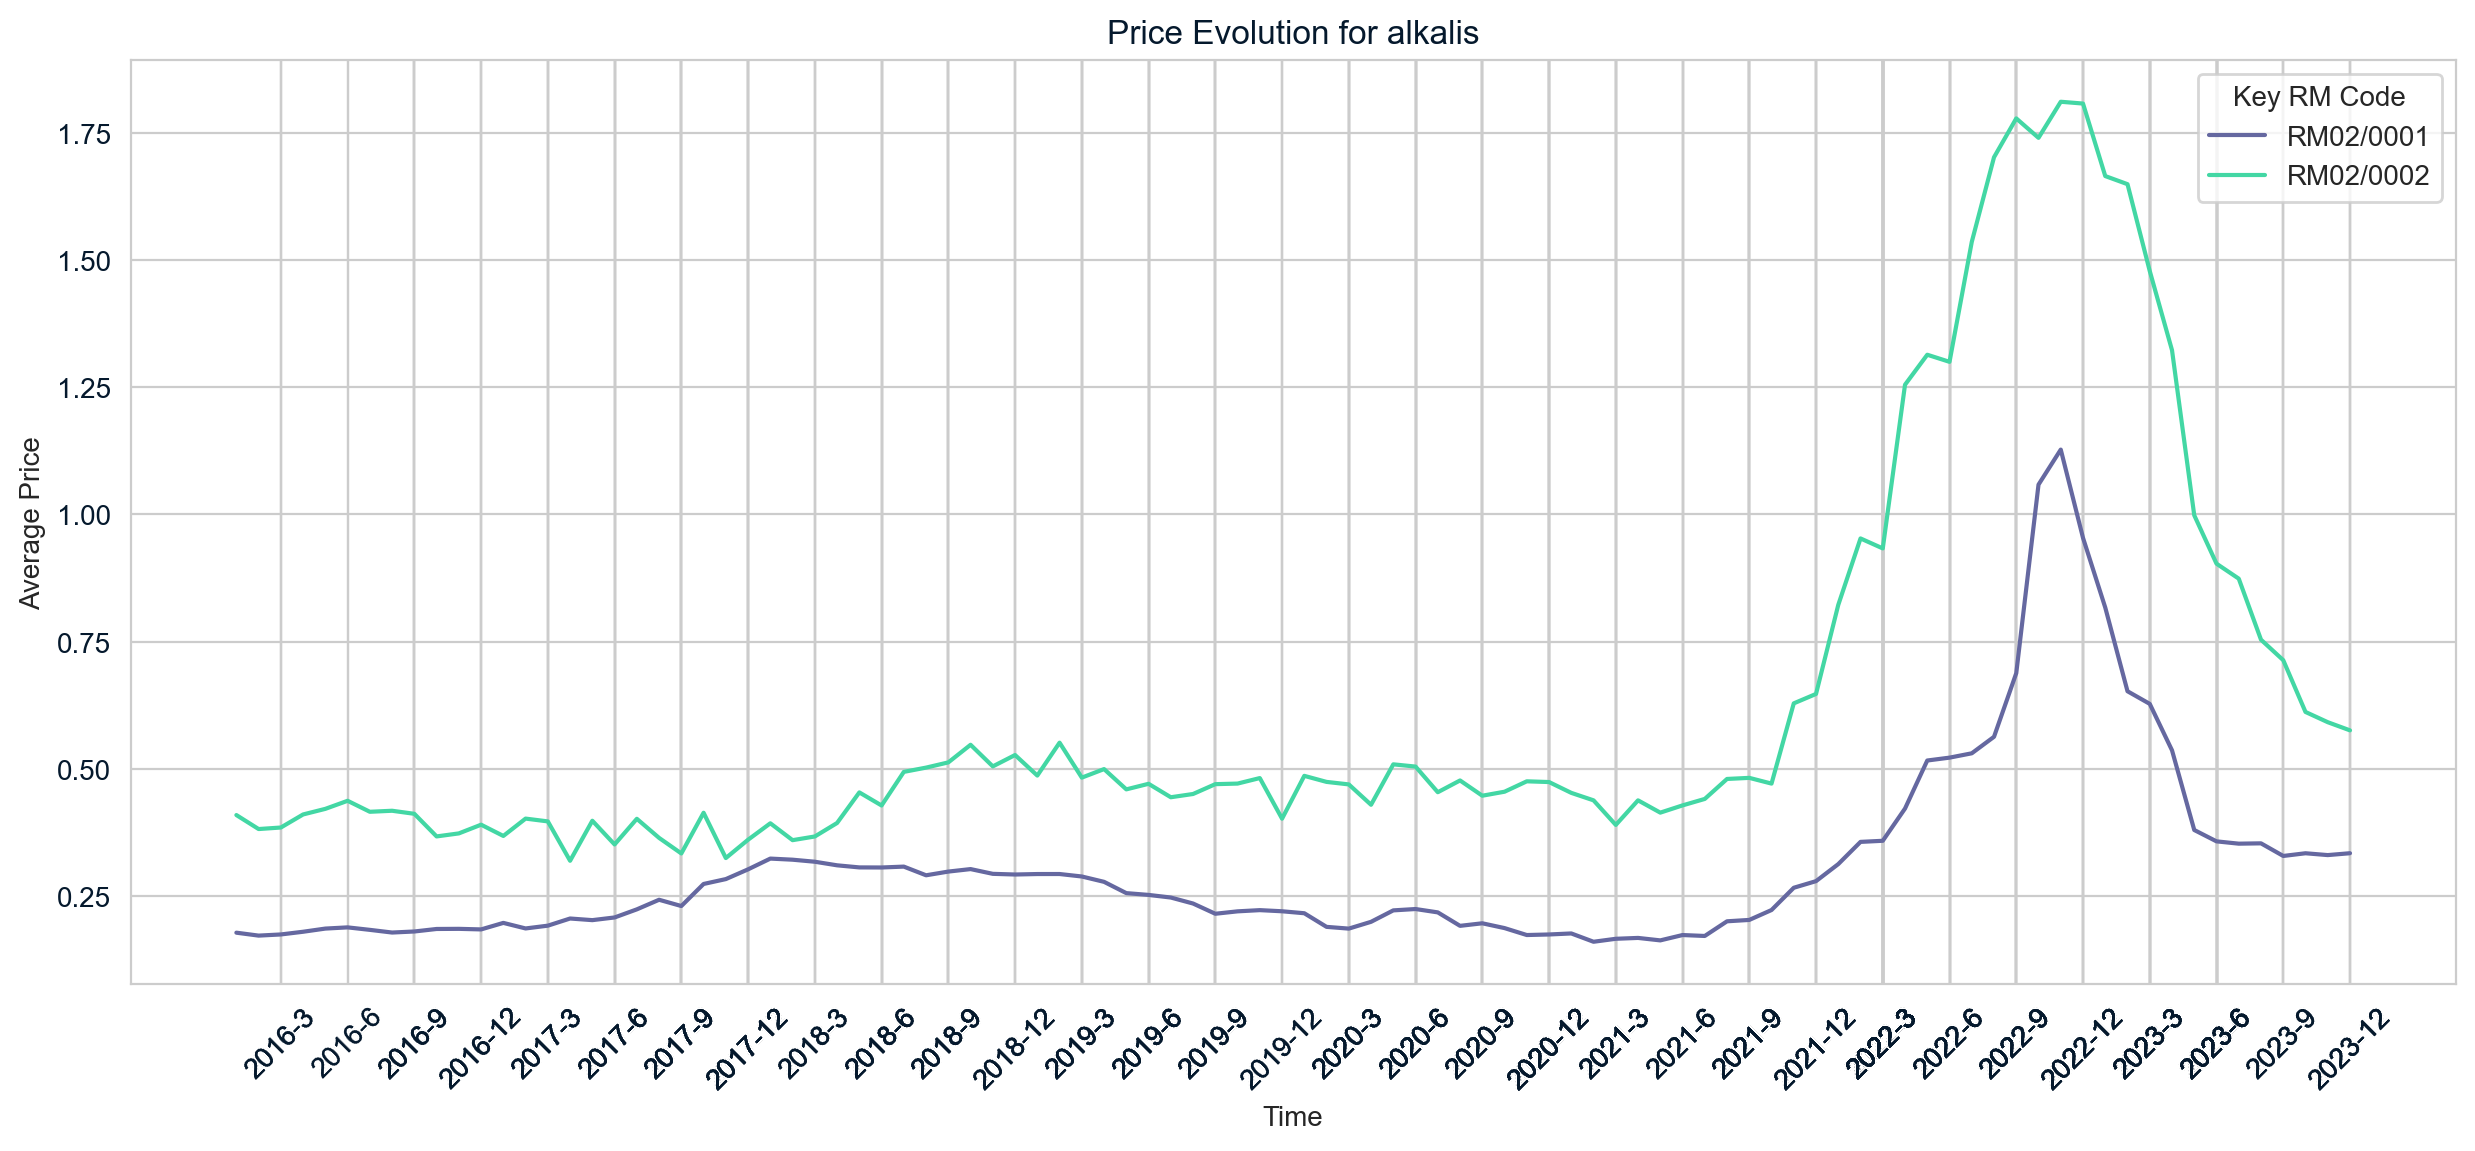

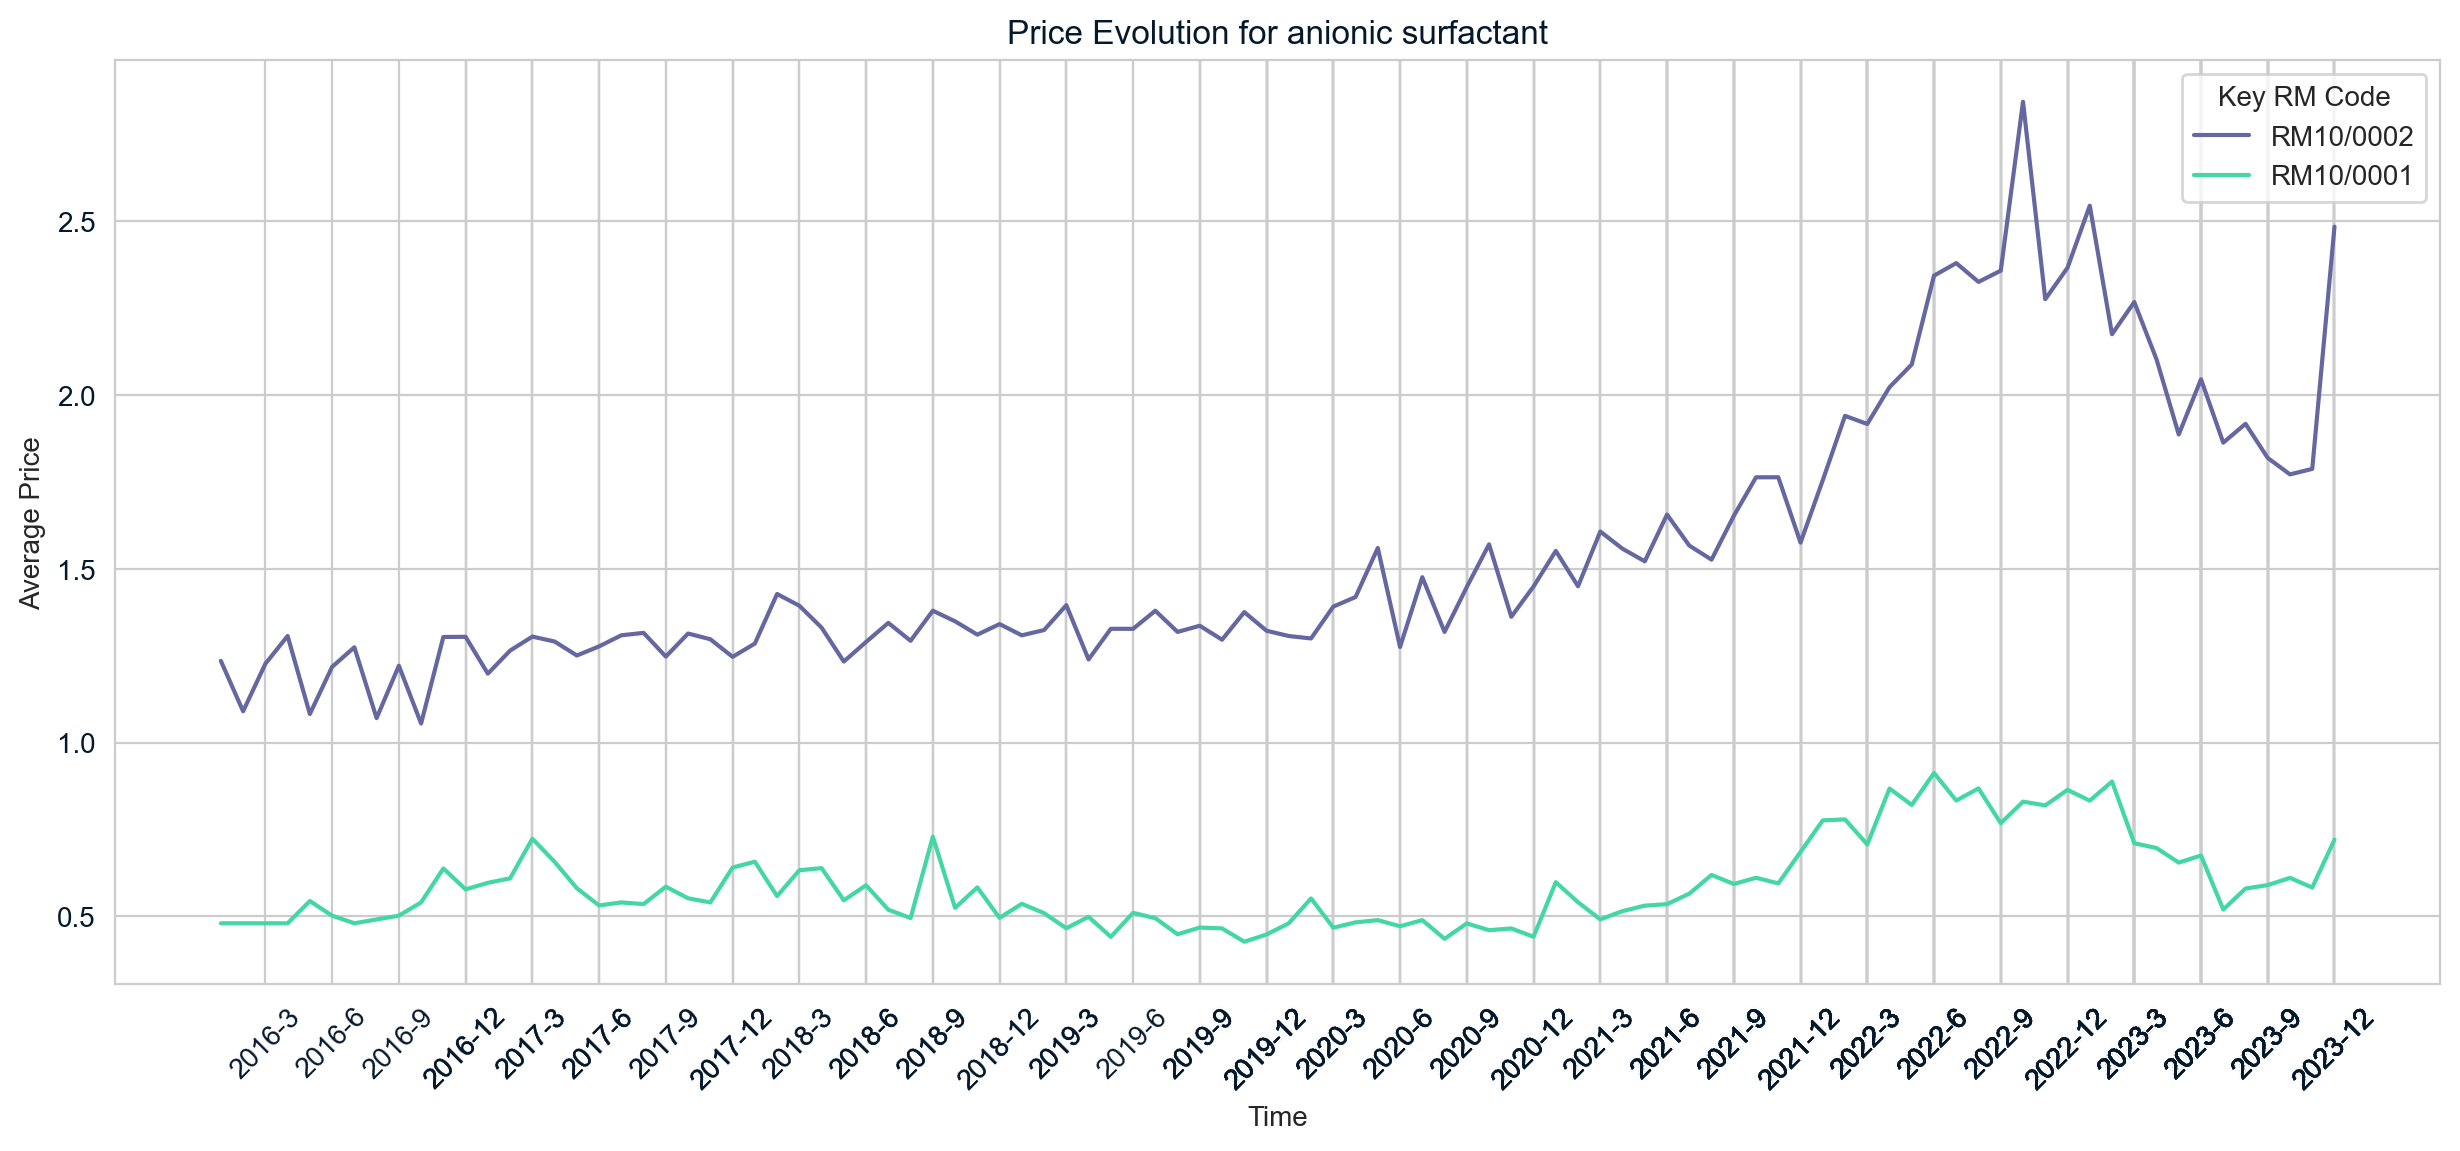

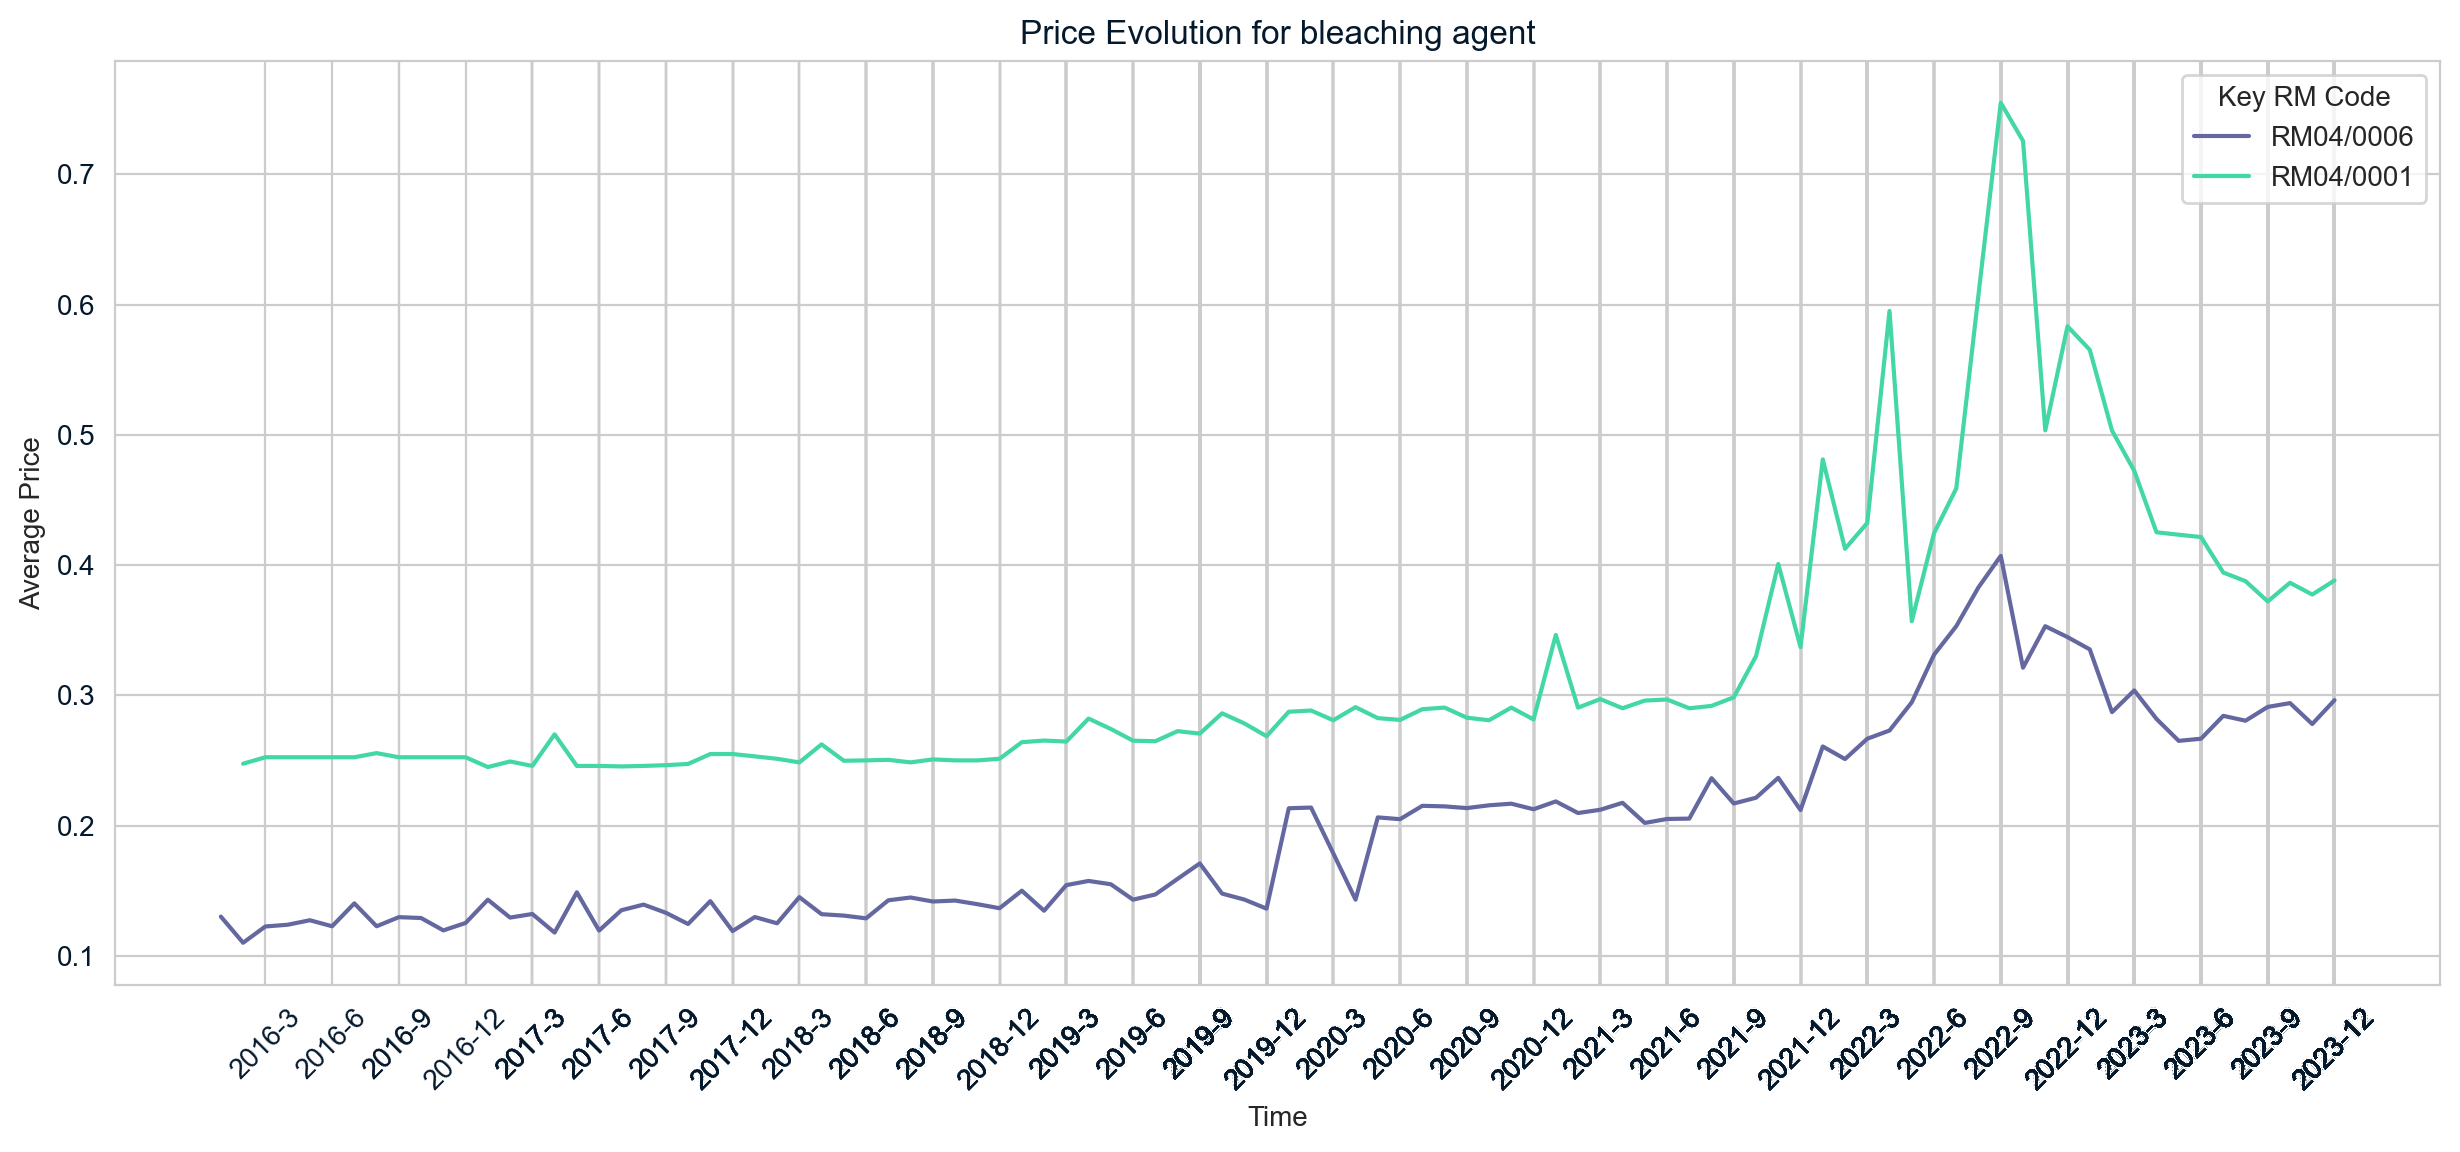

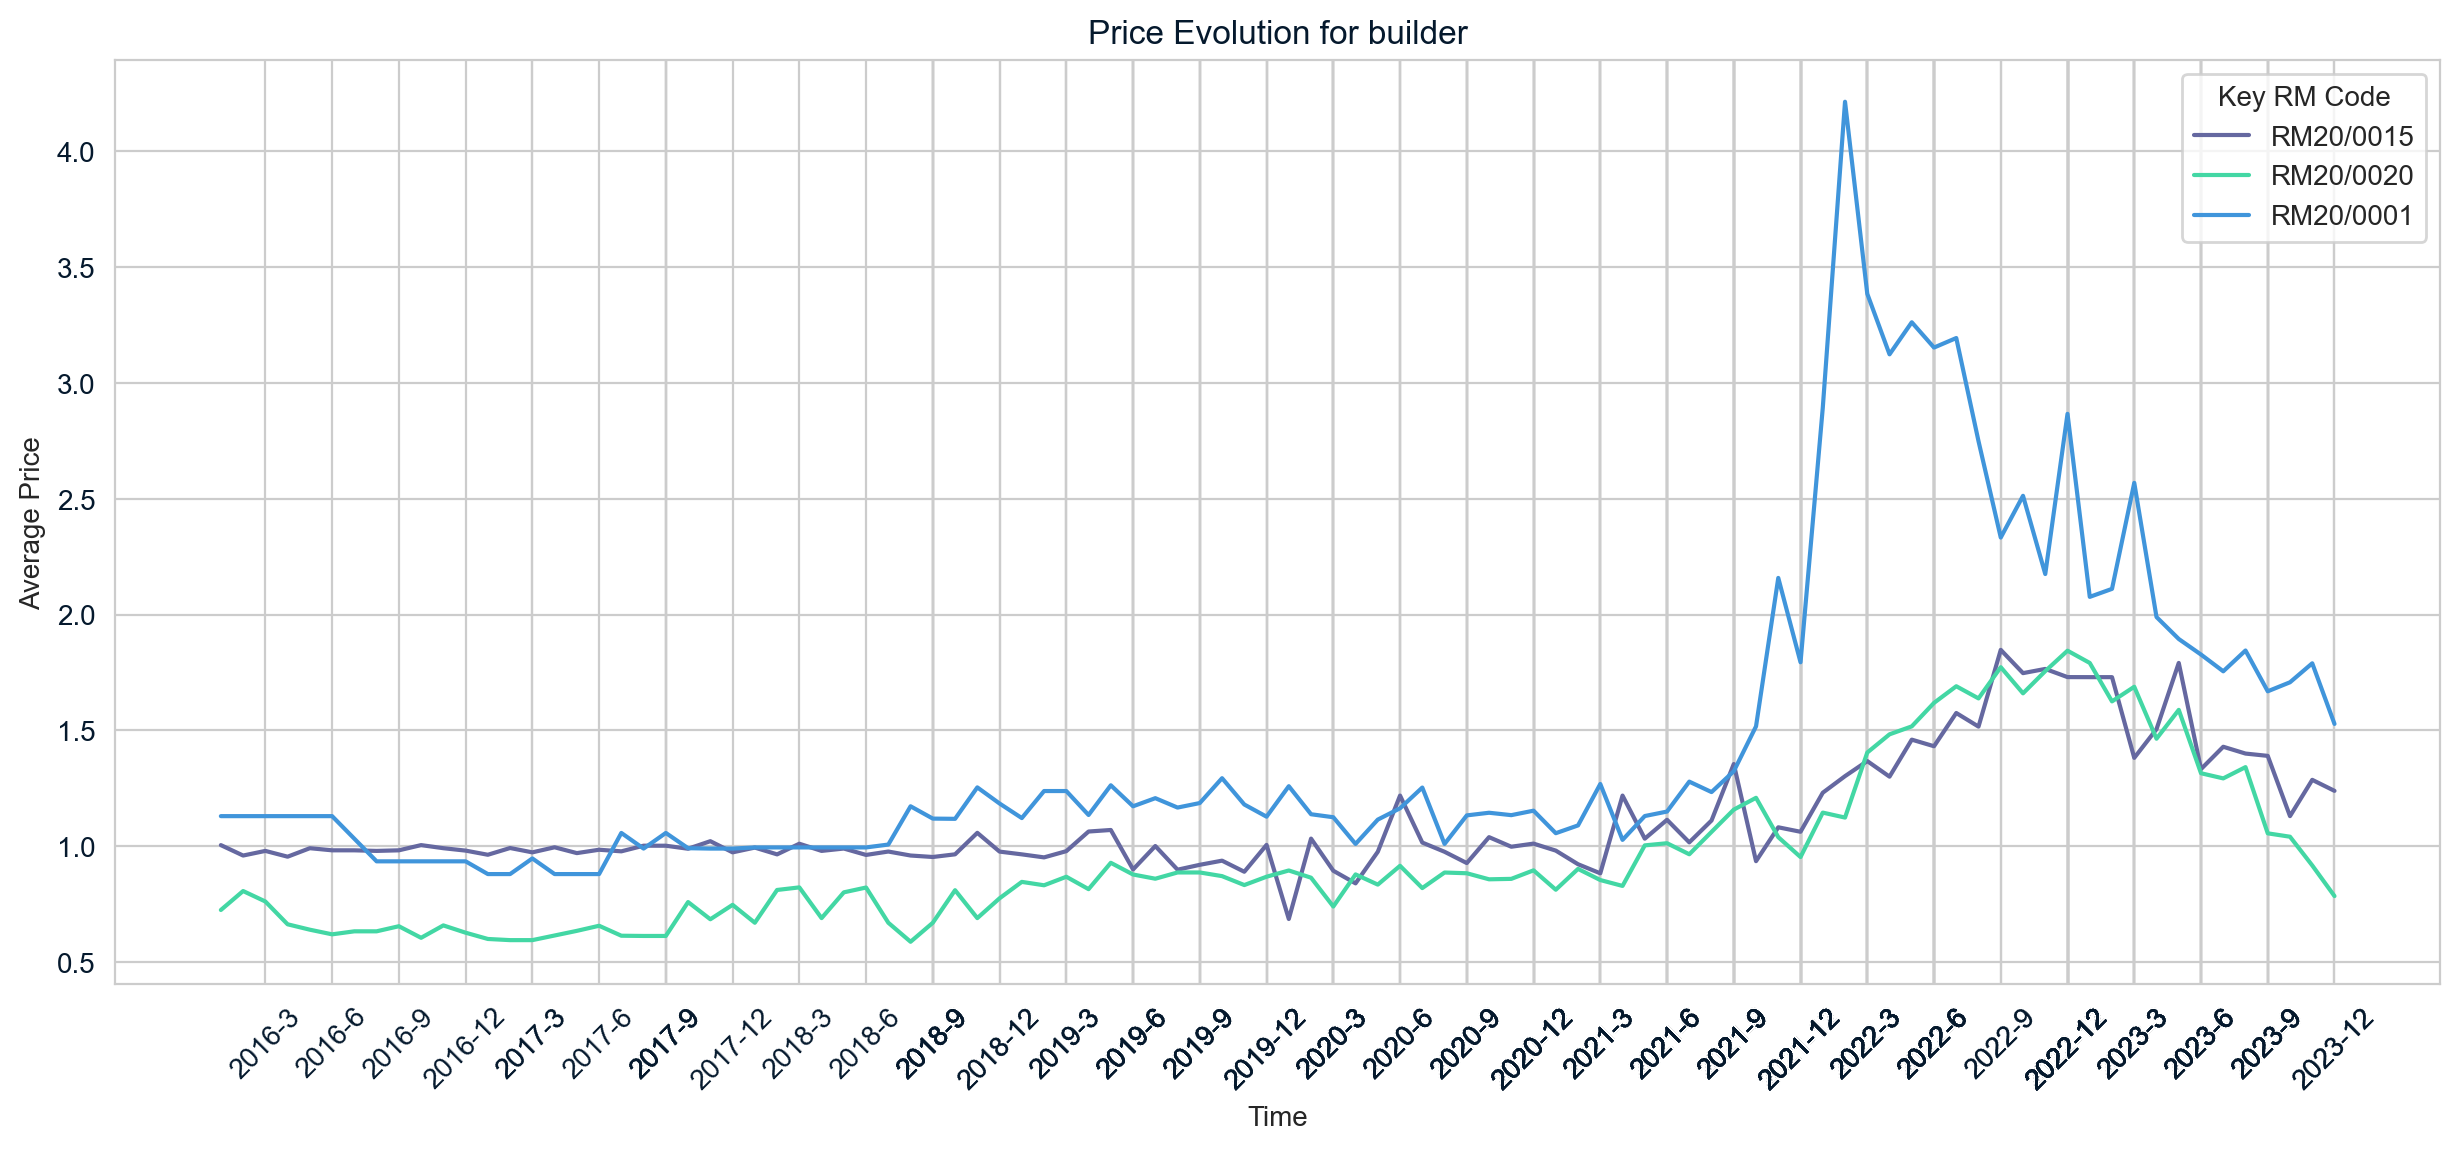

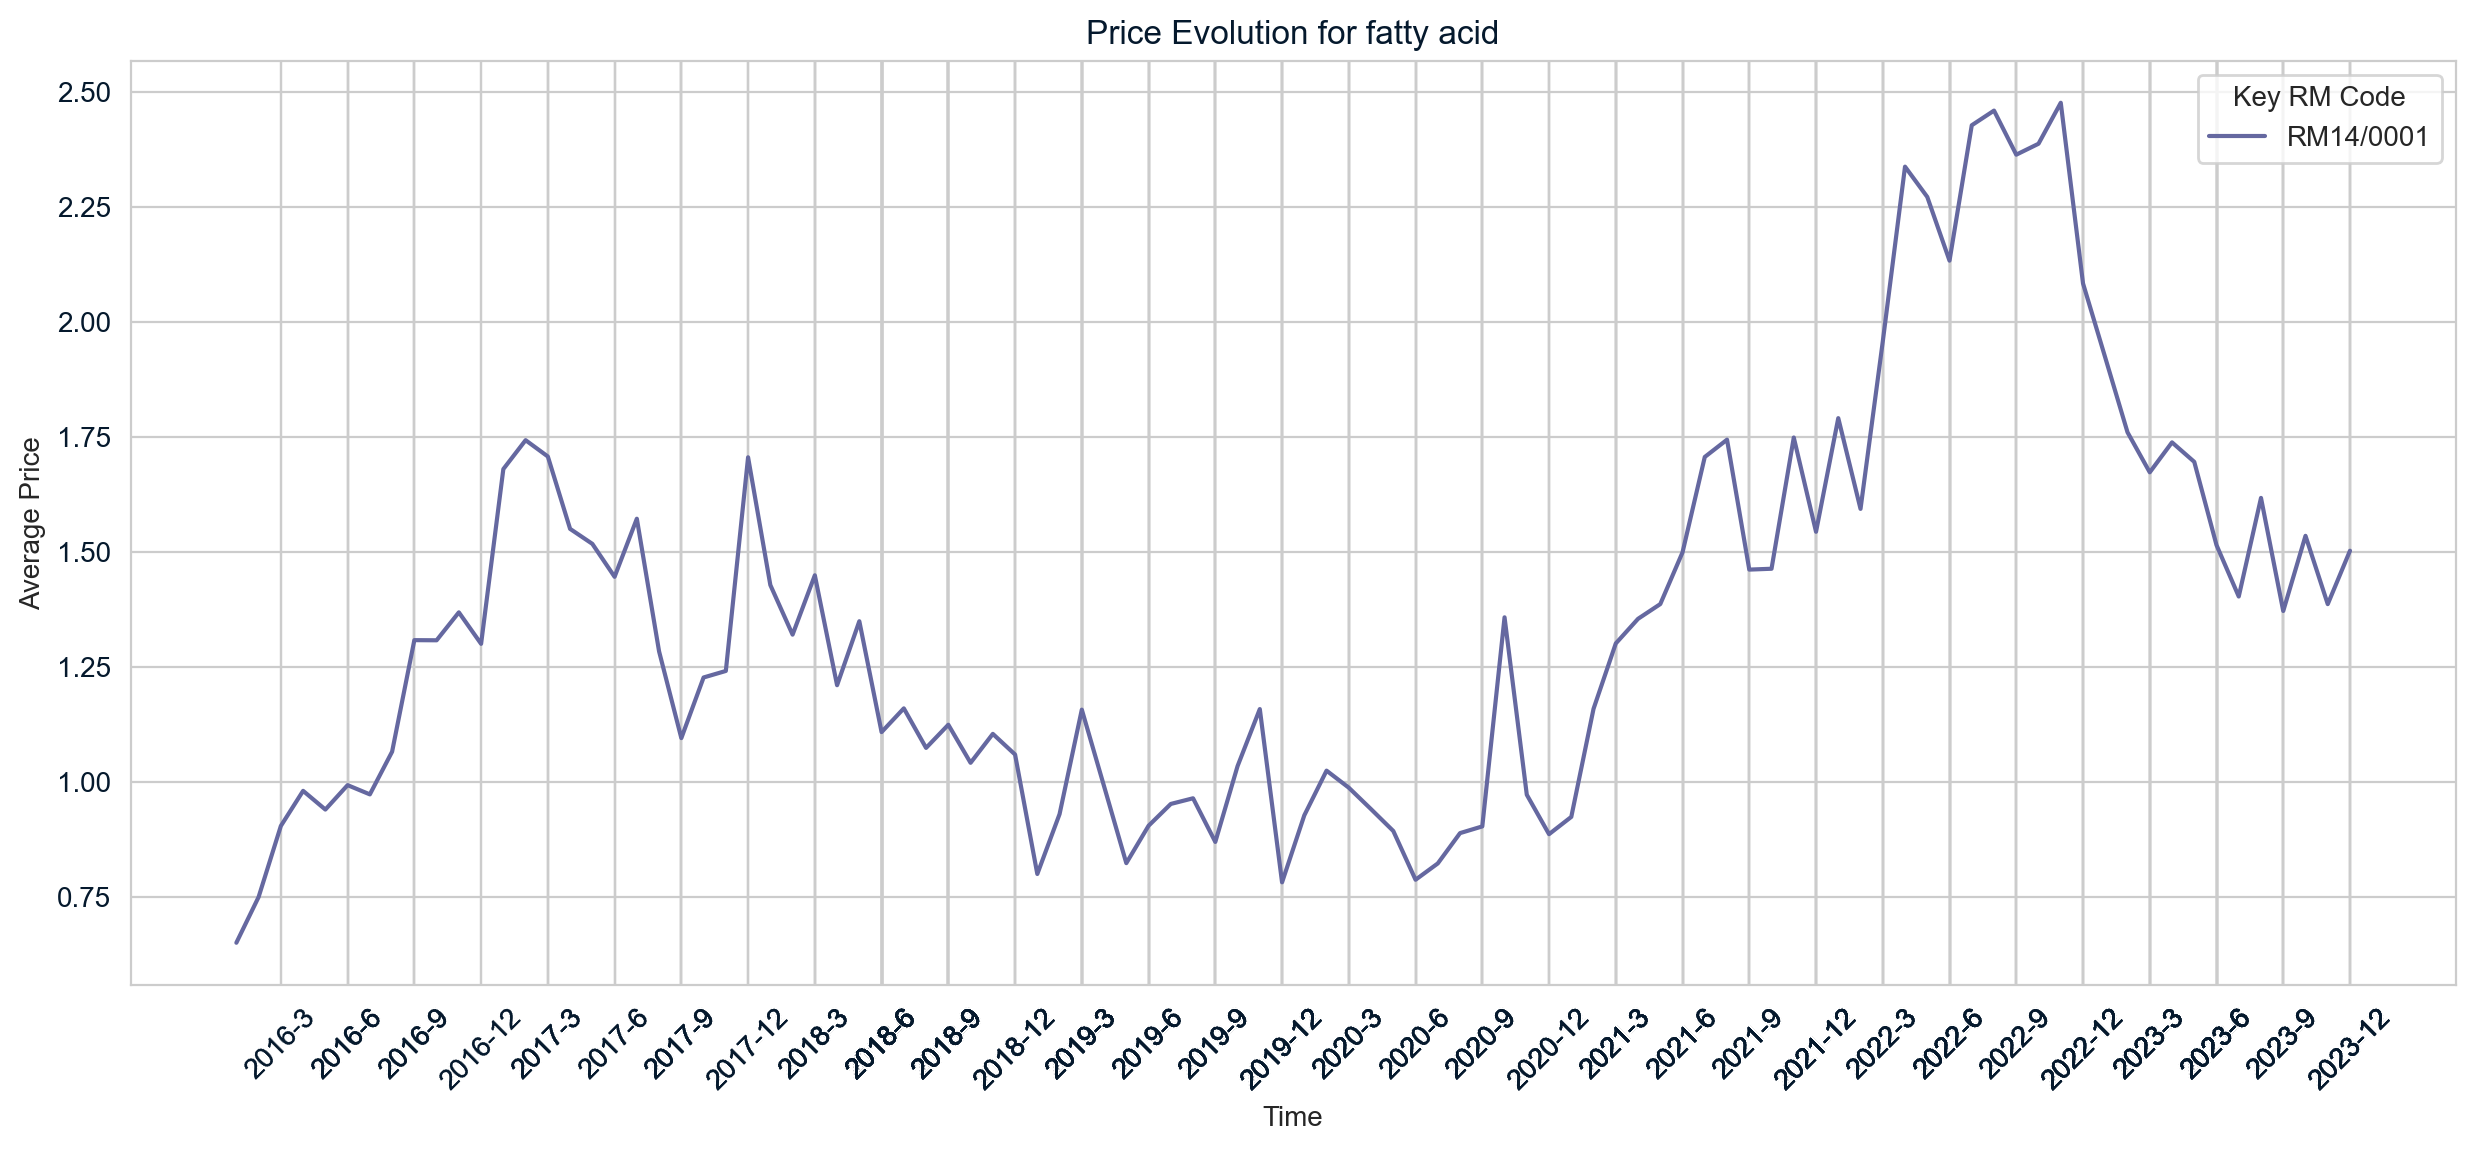

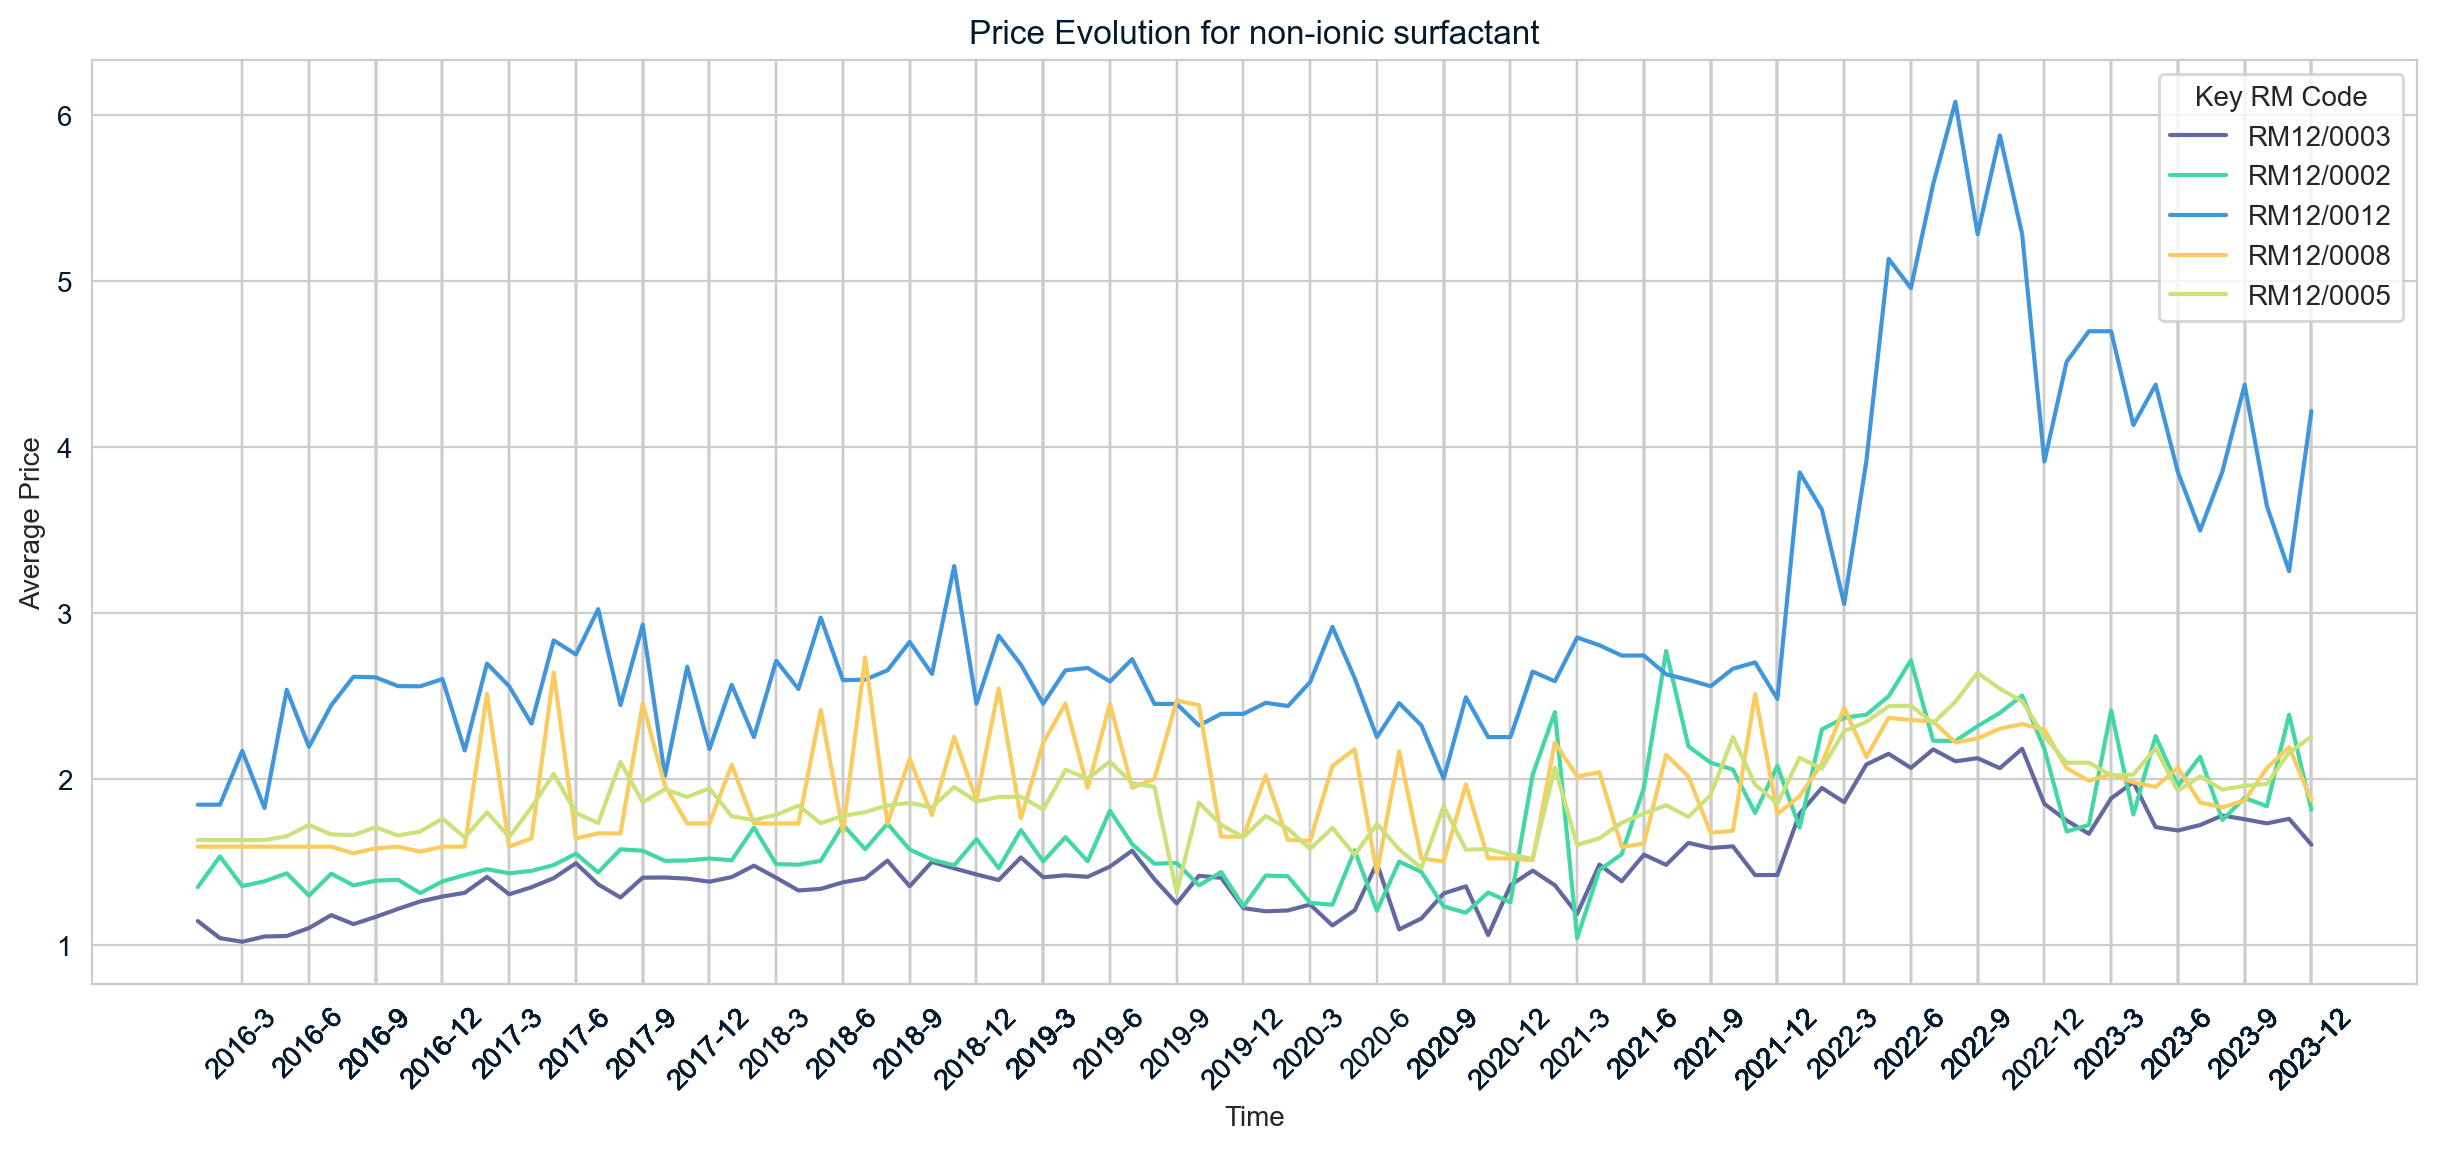

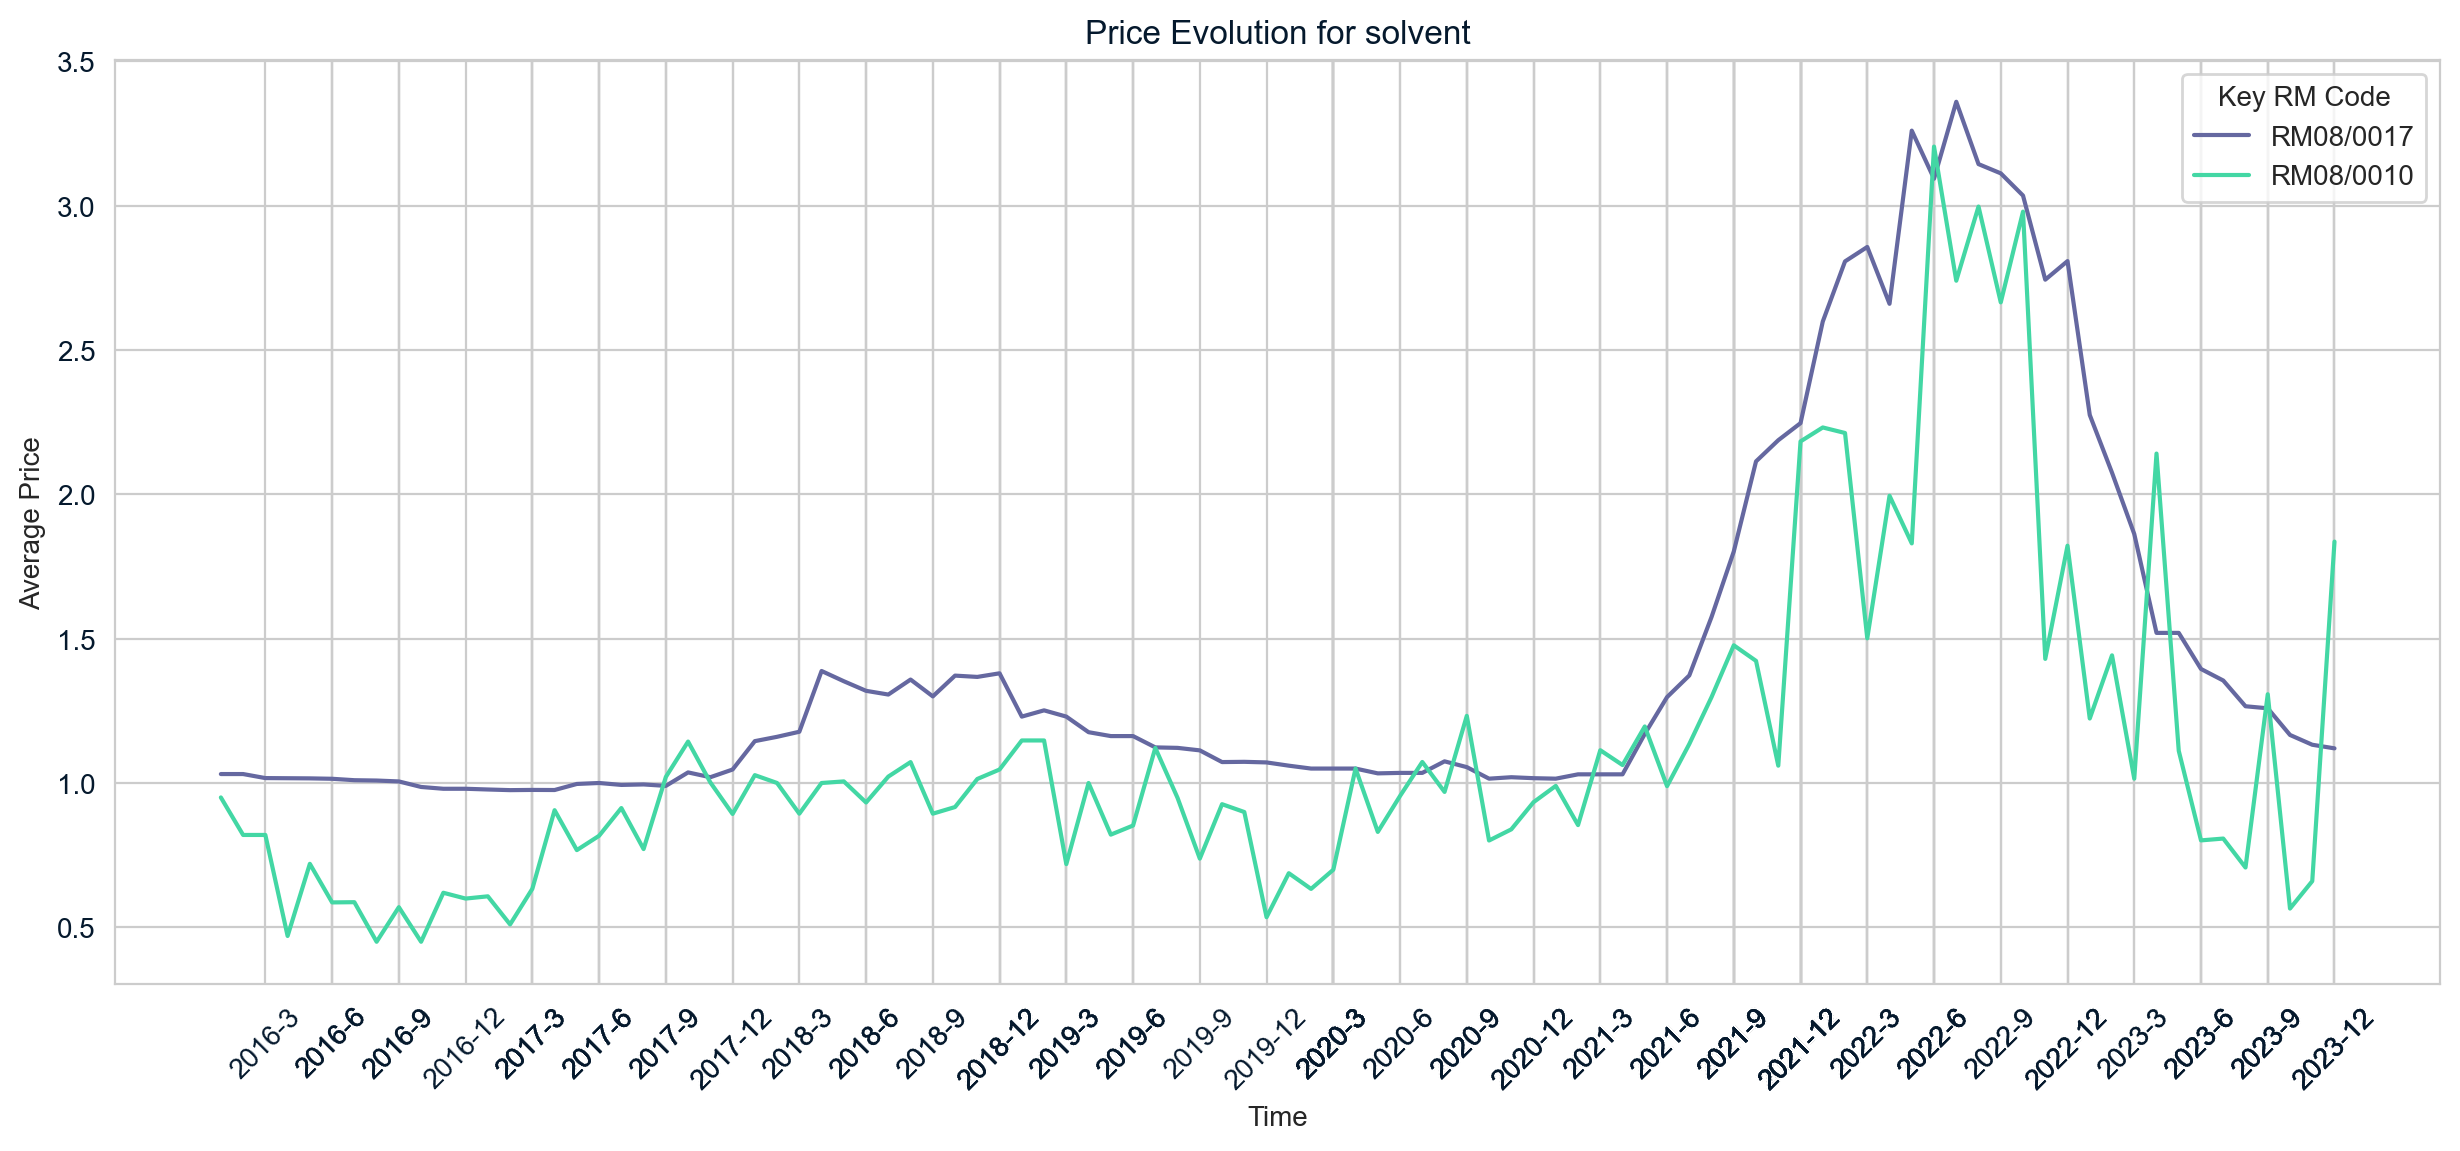

In [8]:
draw_actual_combined_graphs(imputed_df, target_dict)

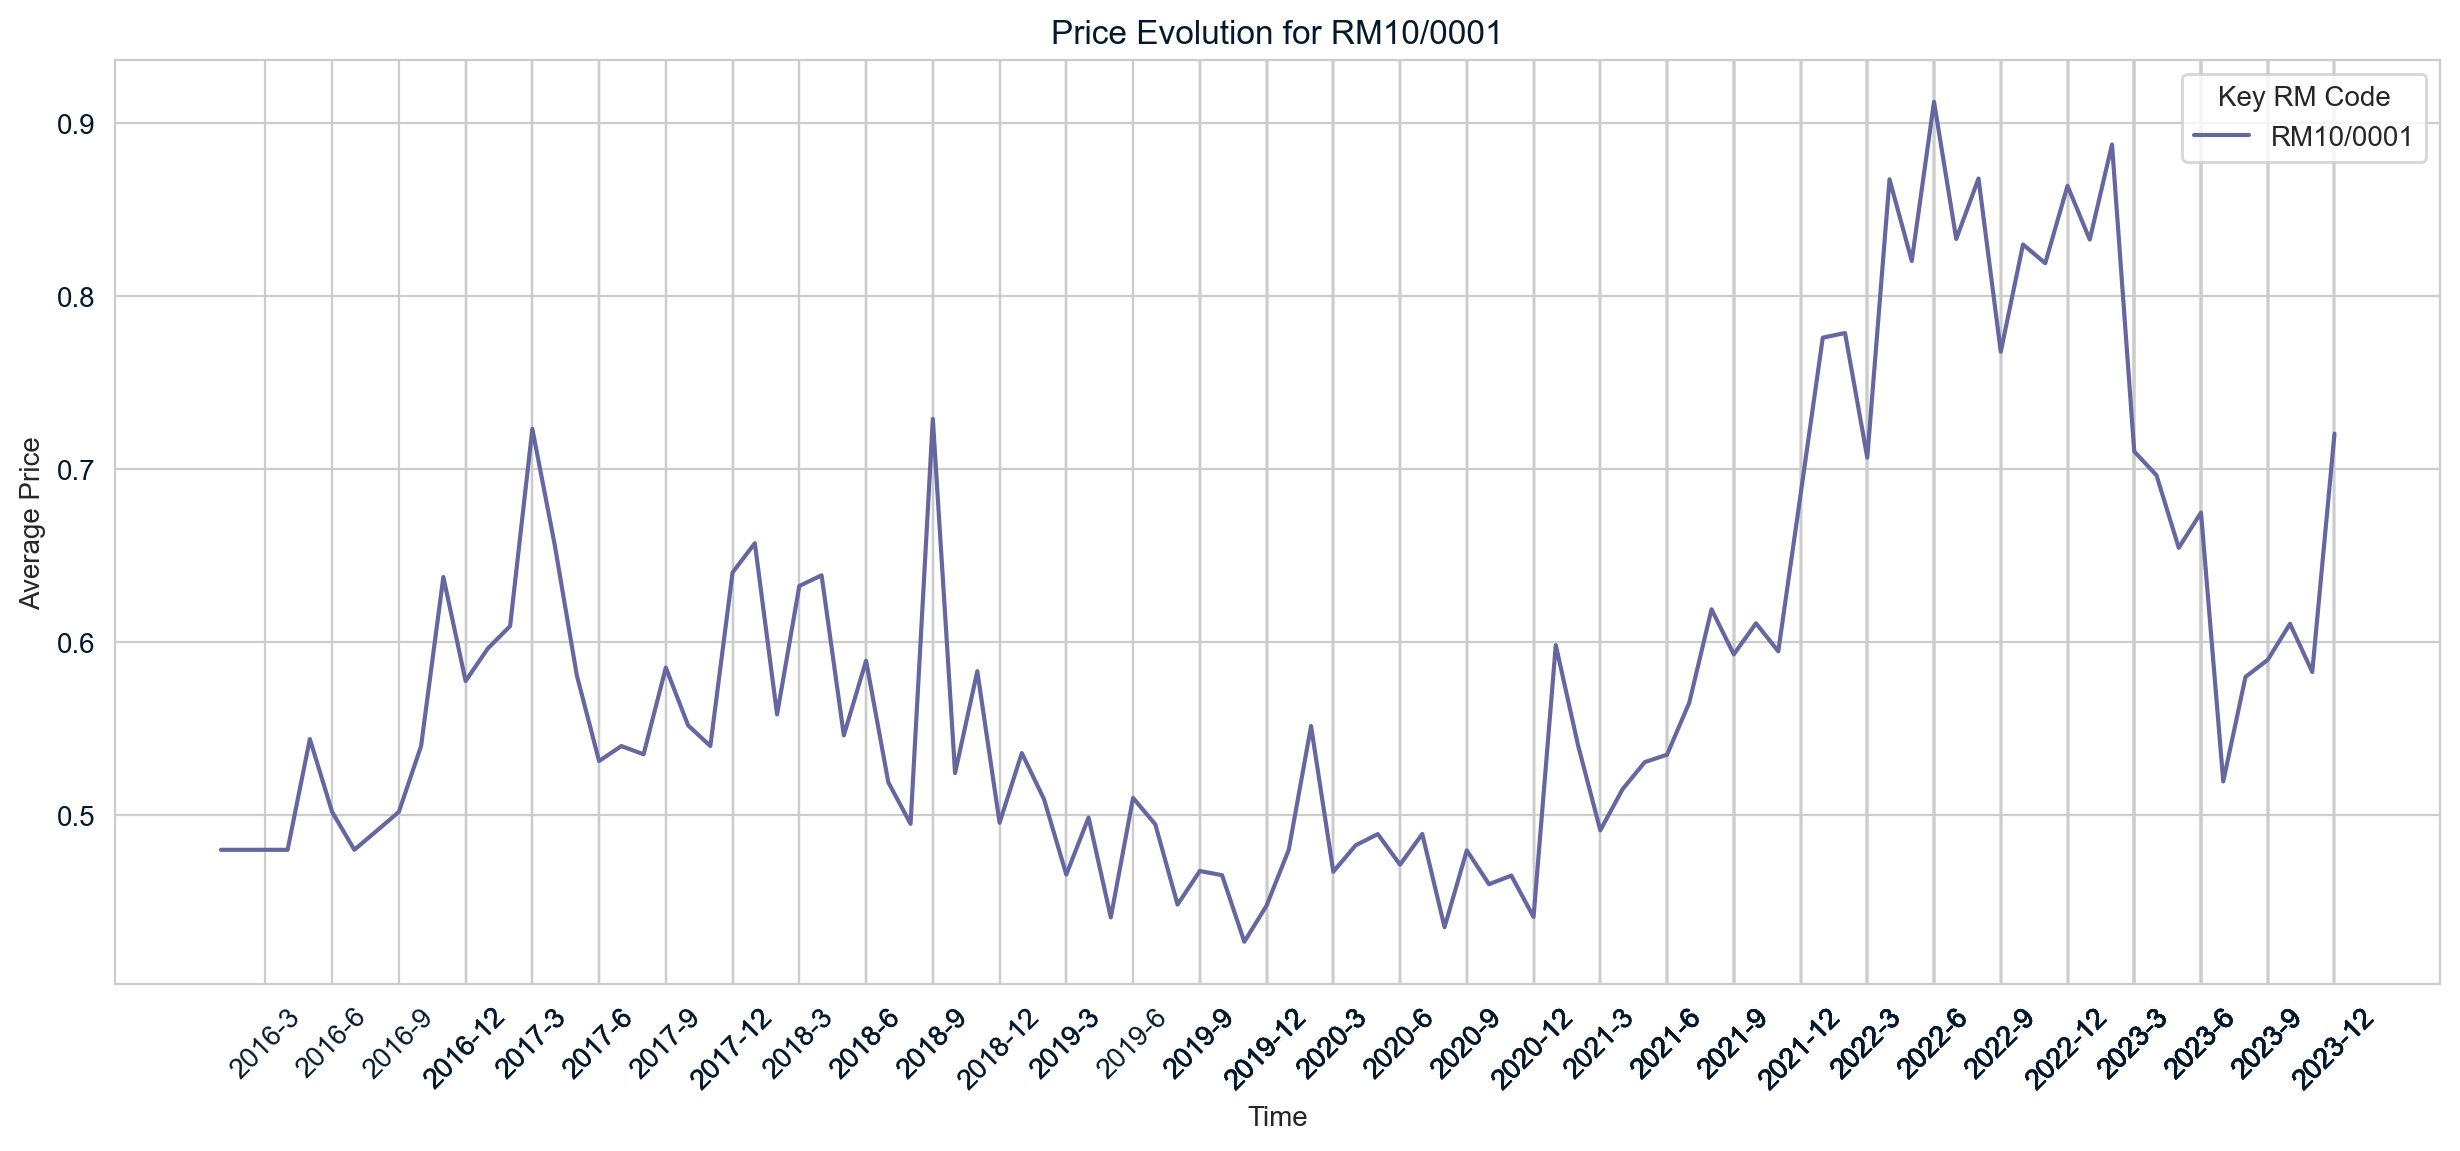

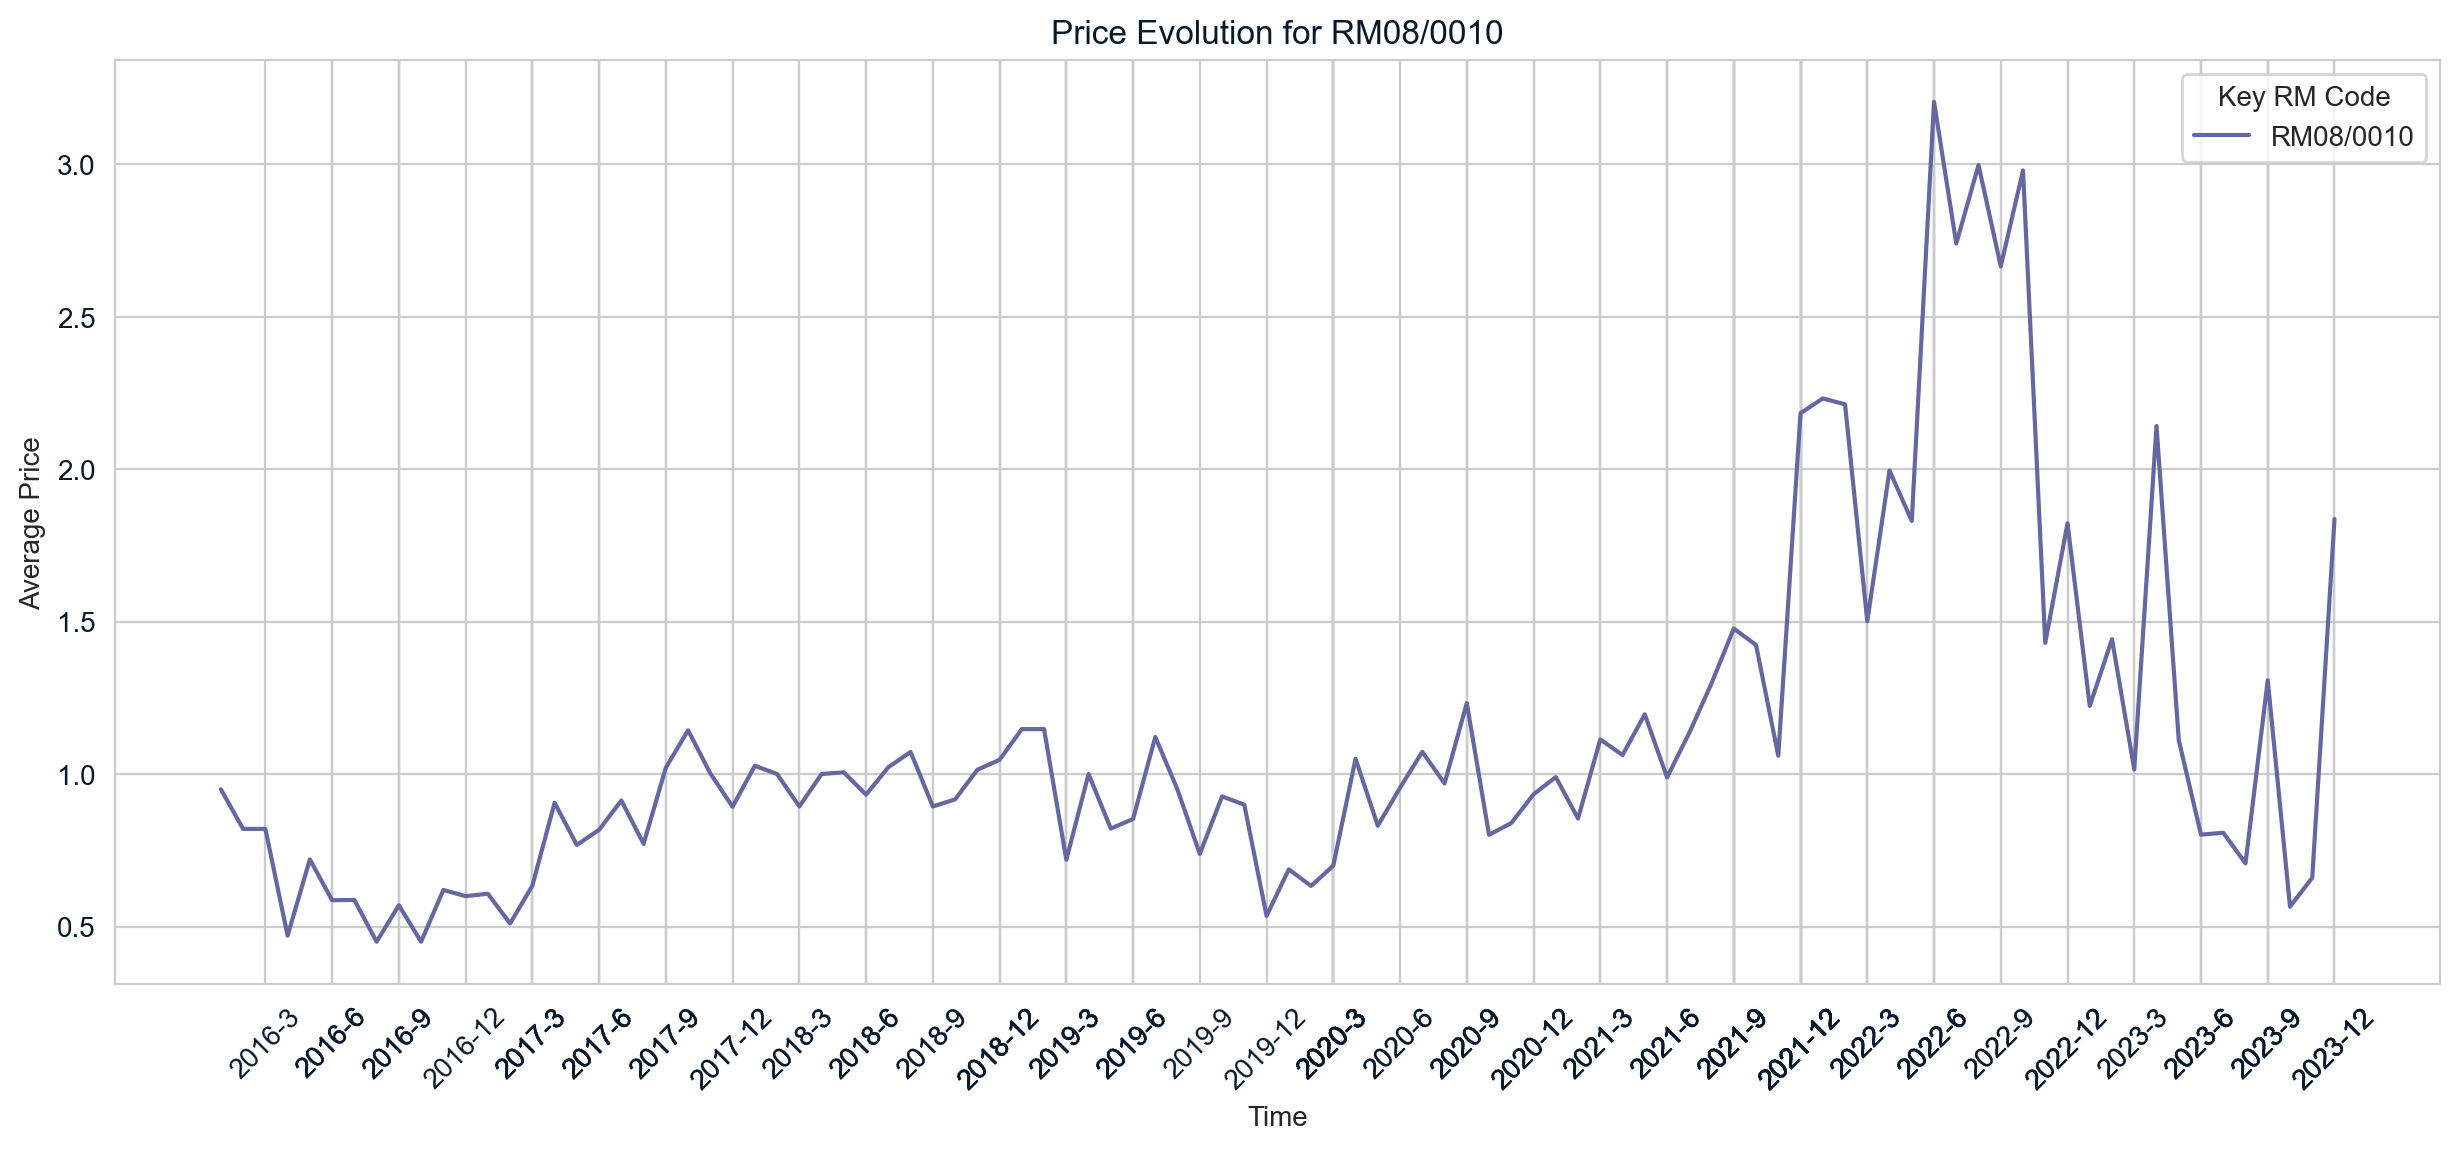

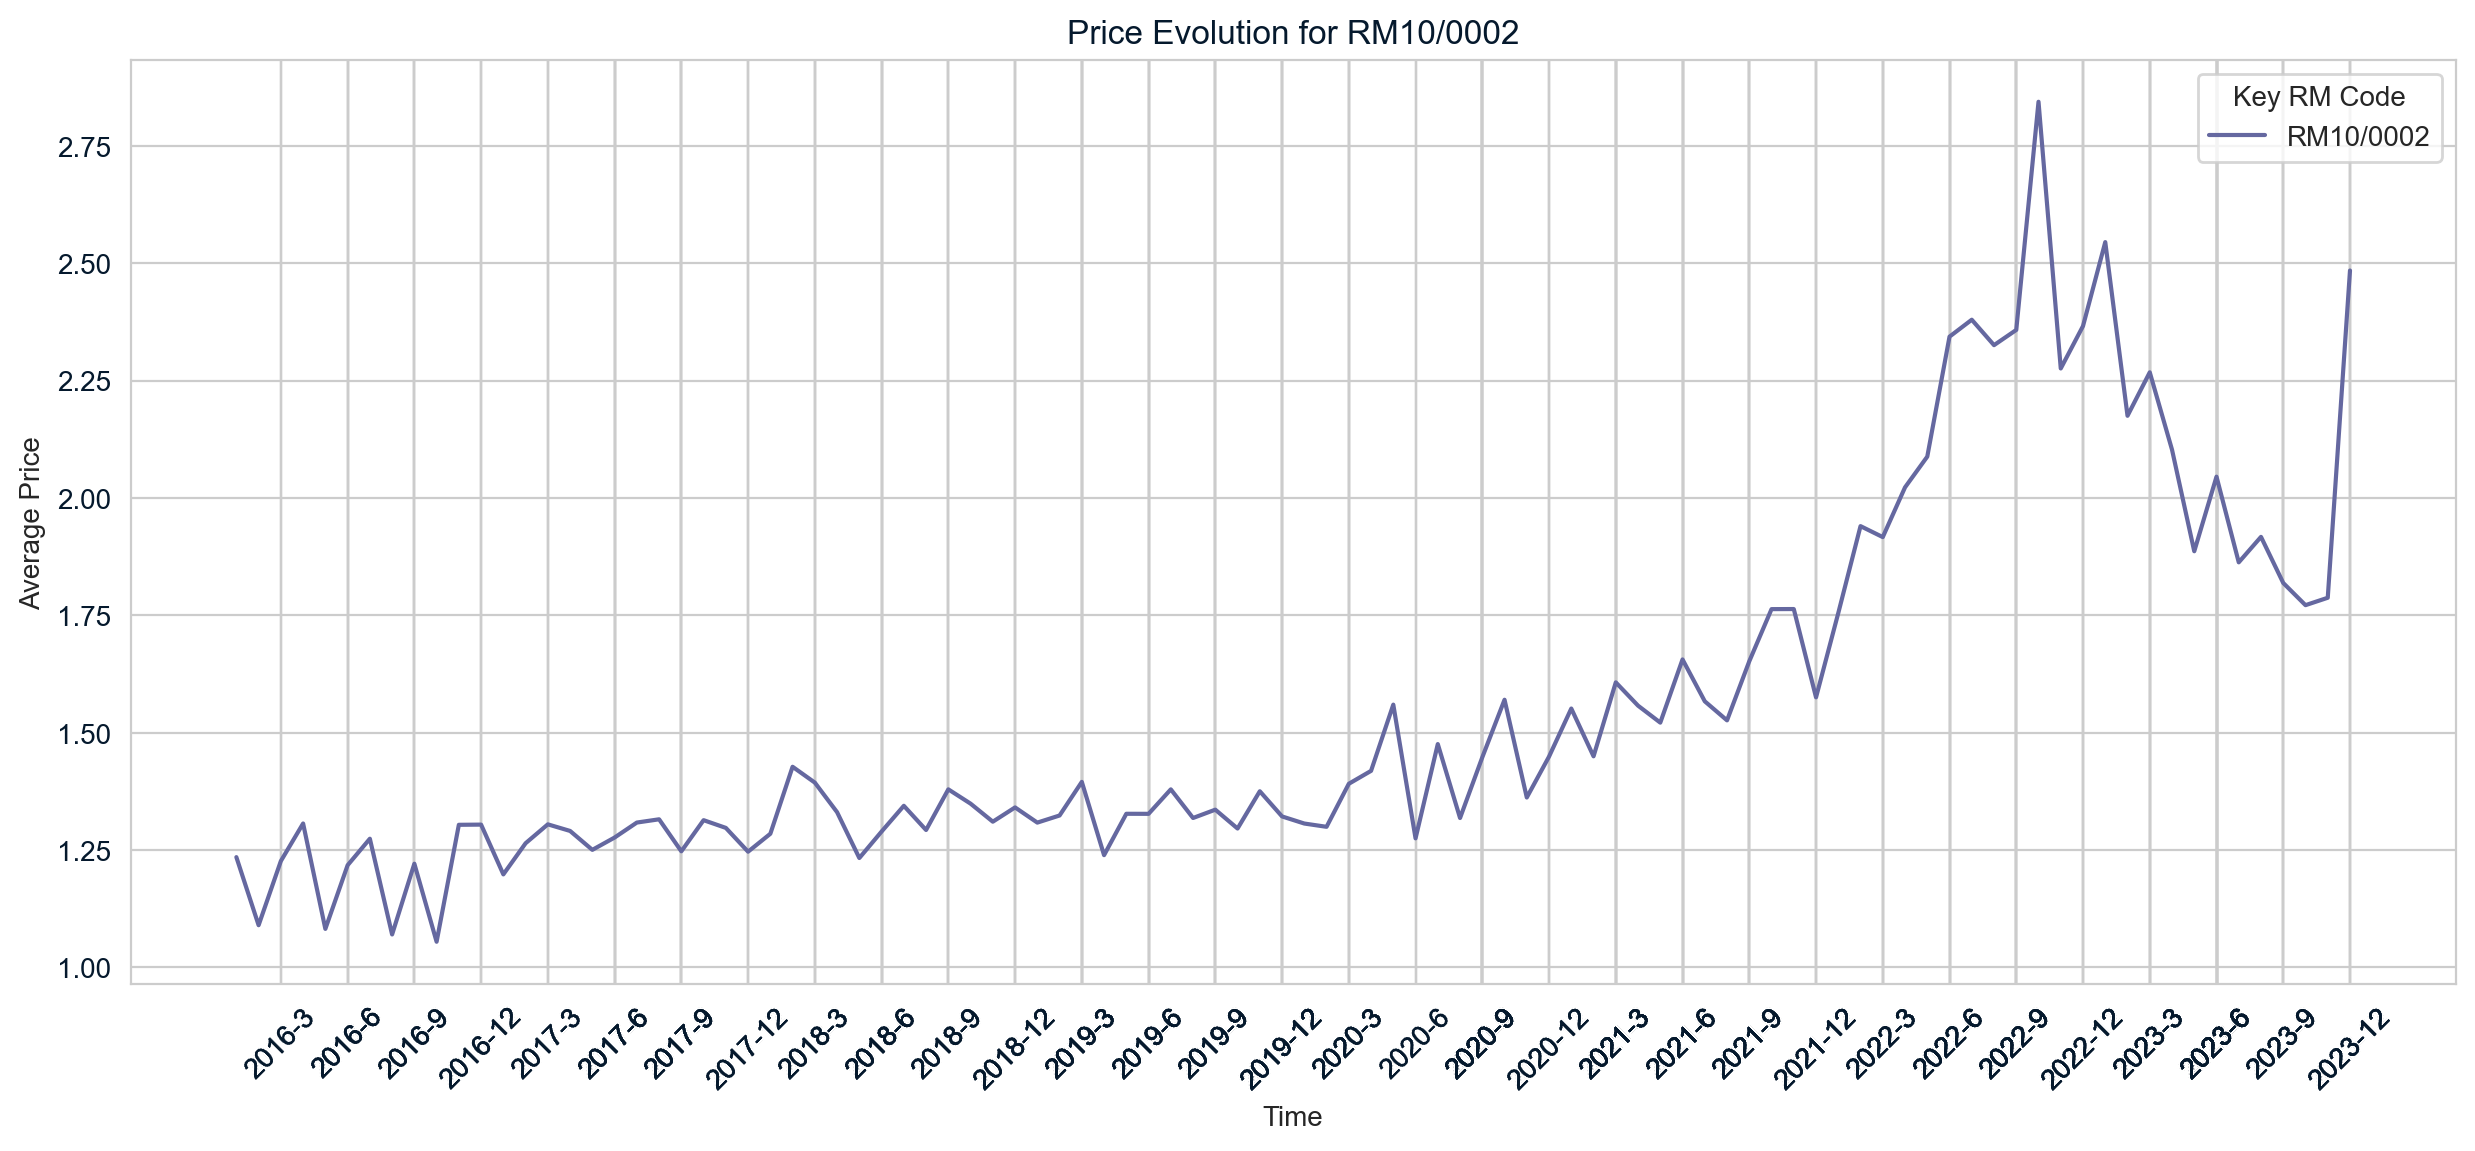

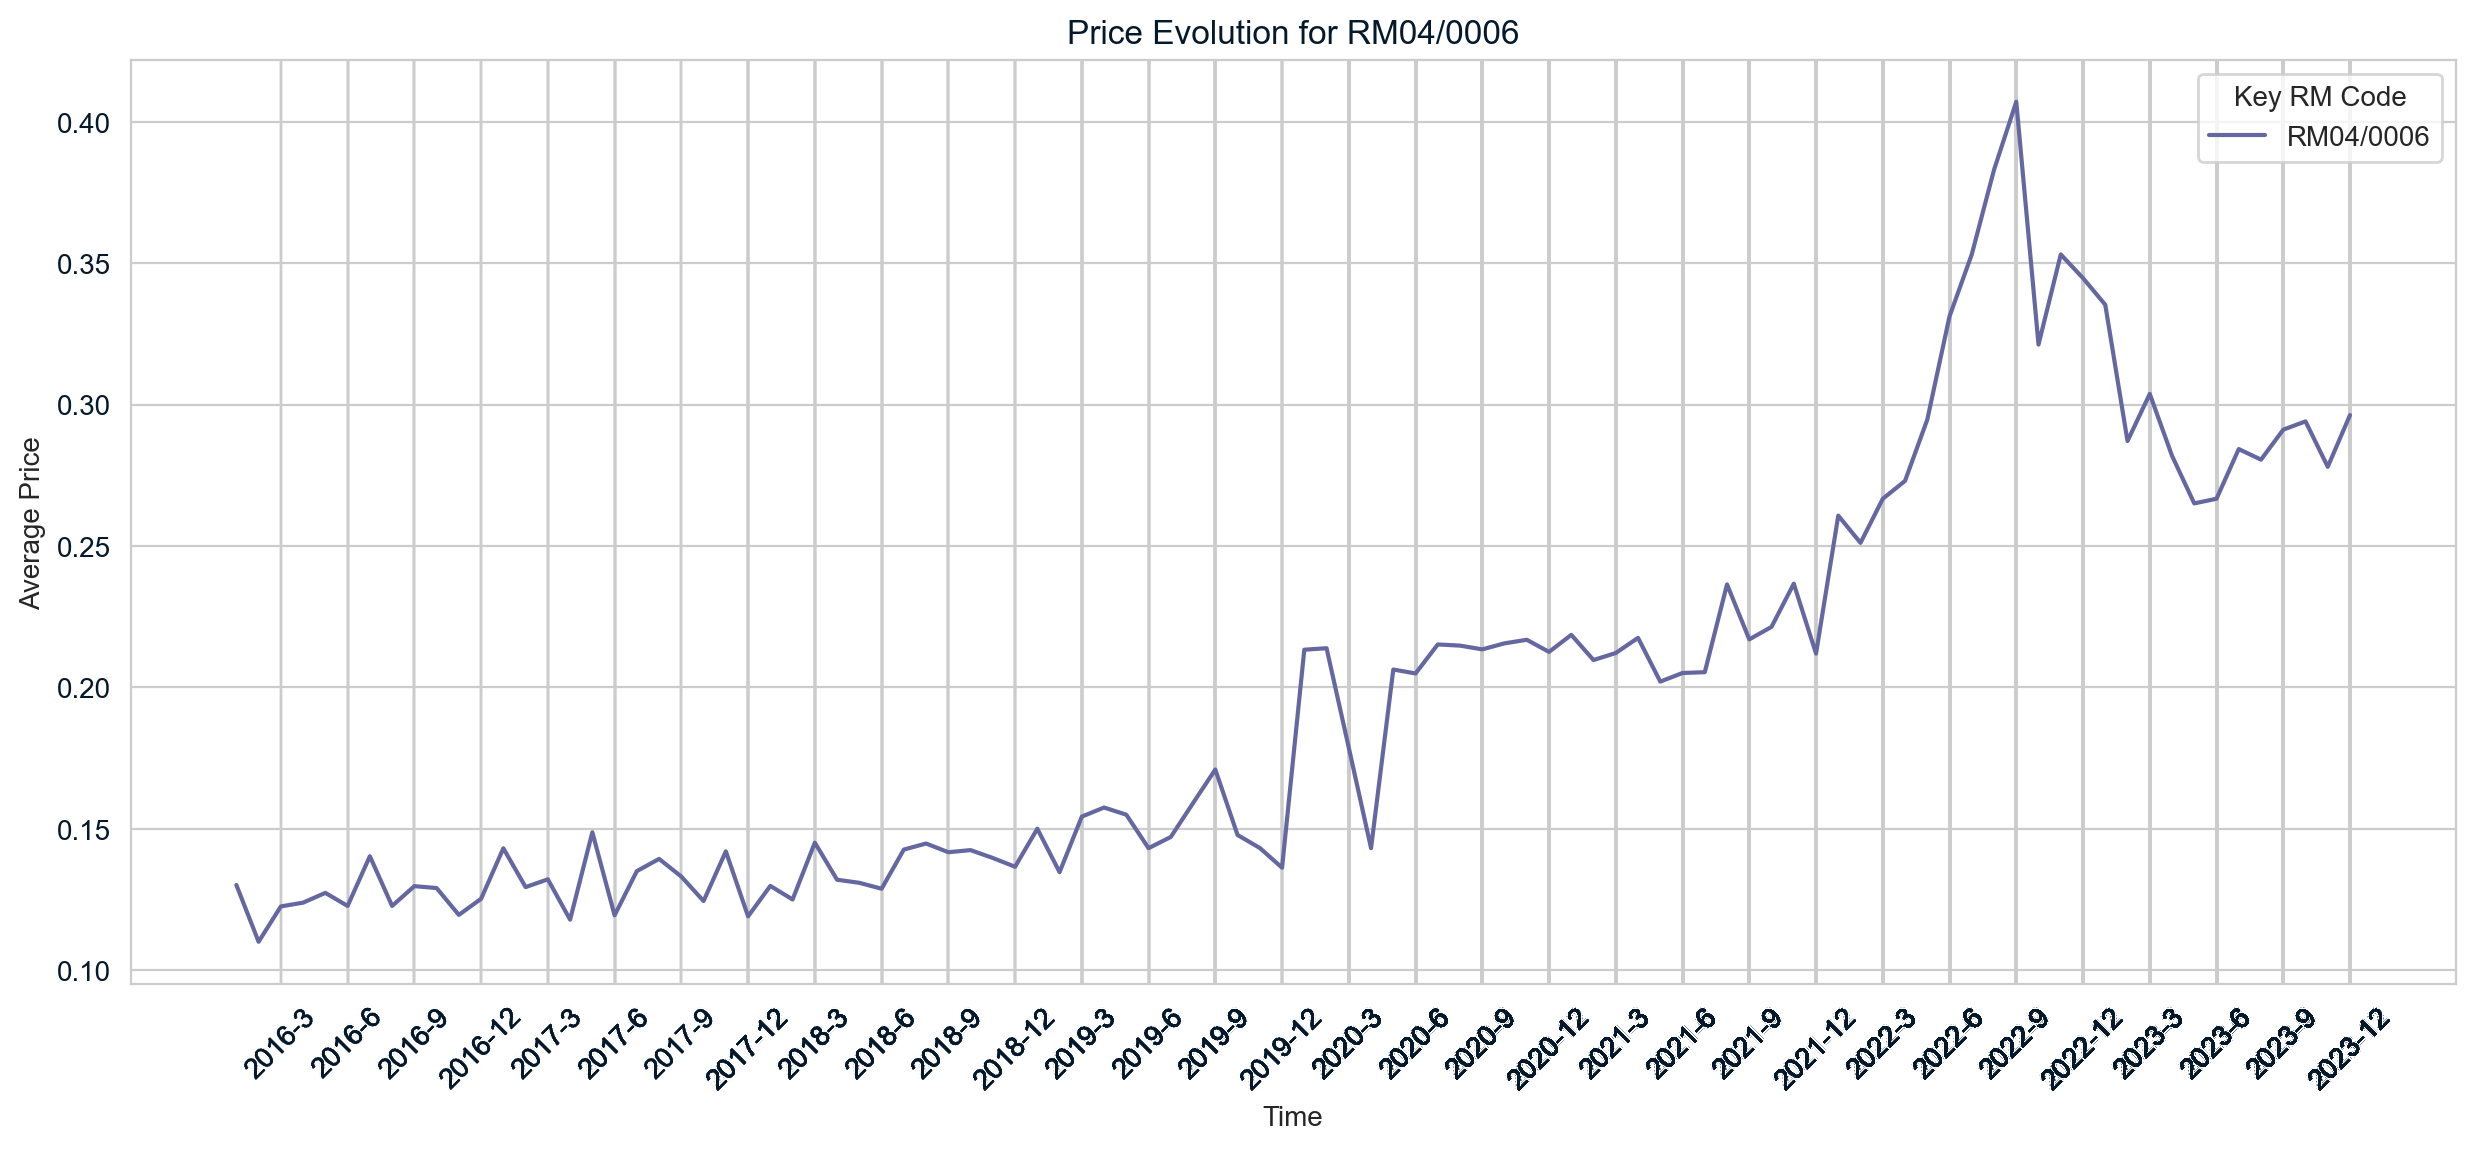

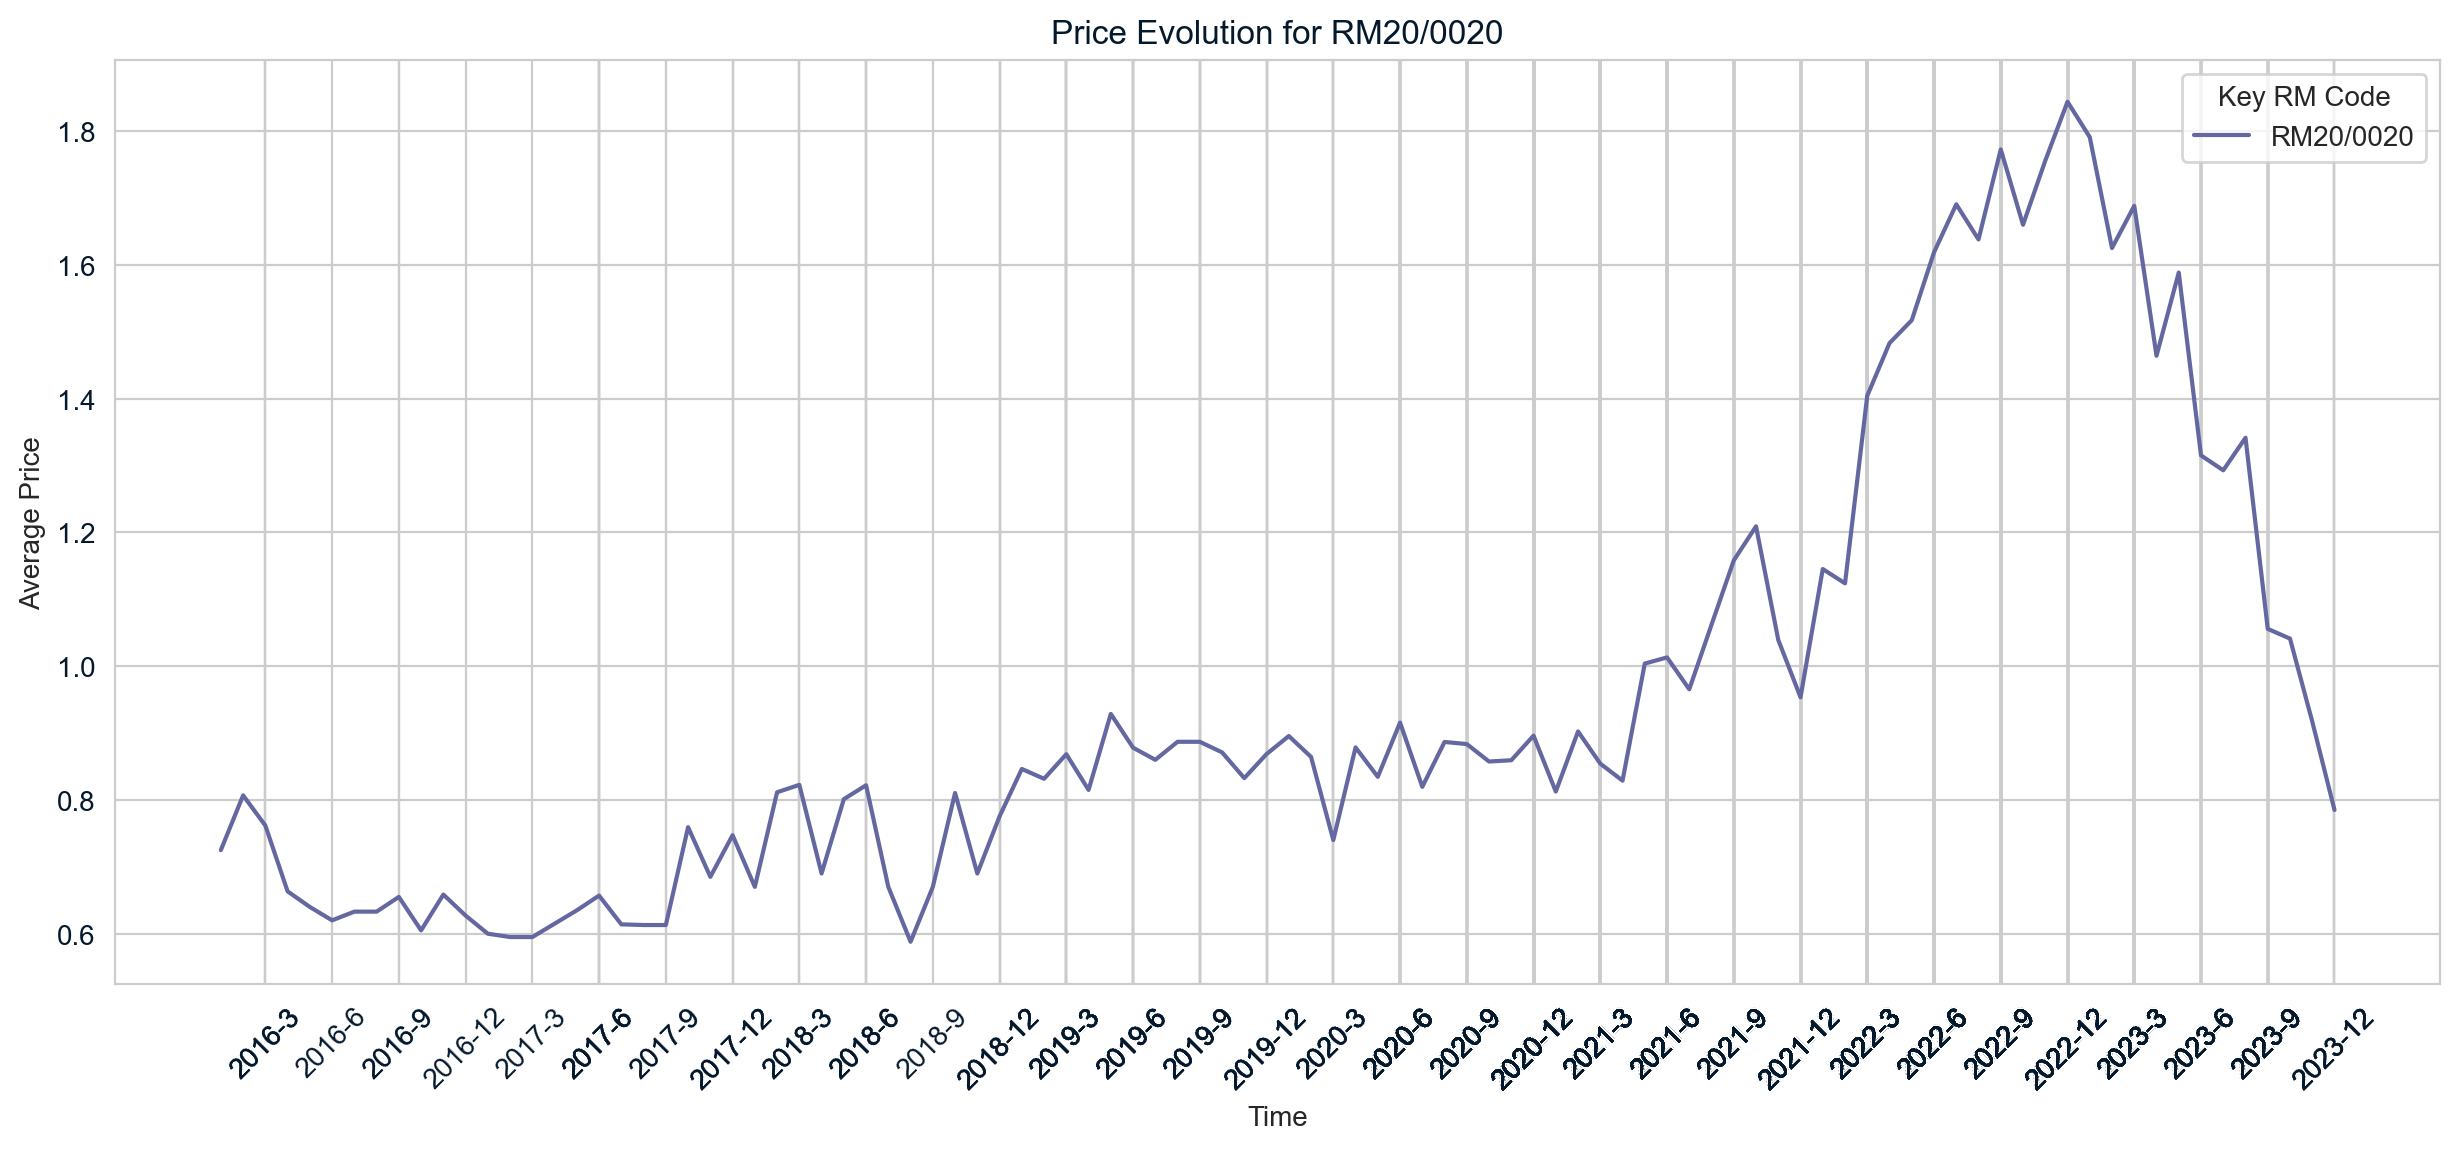

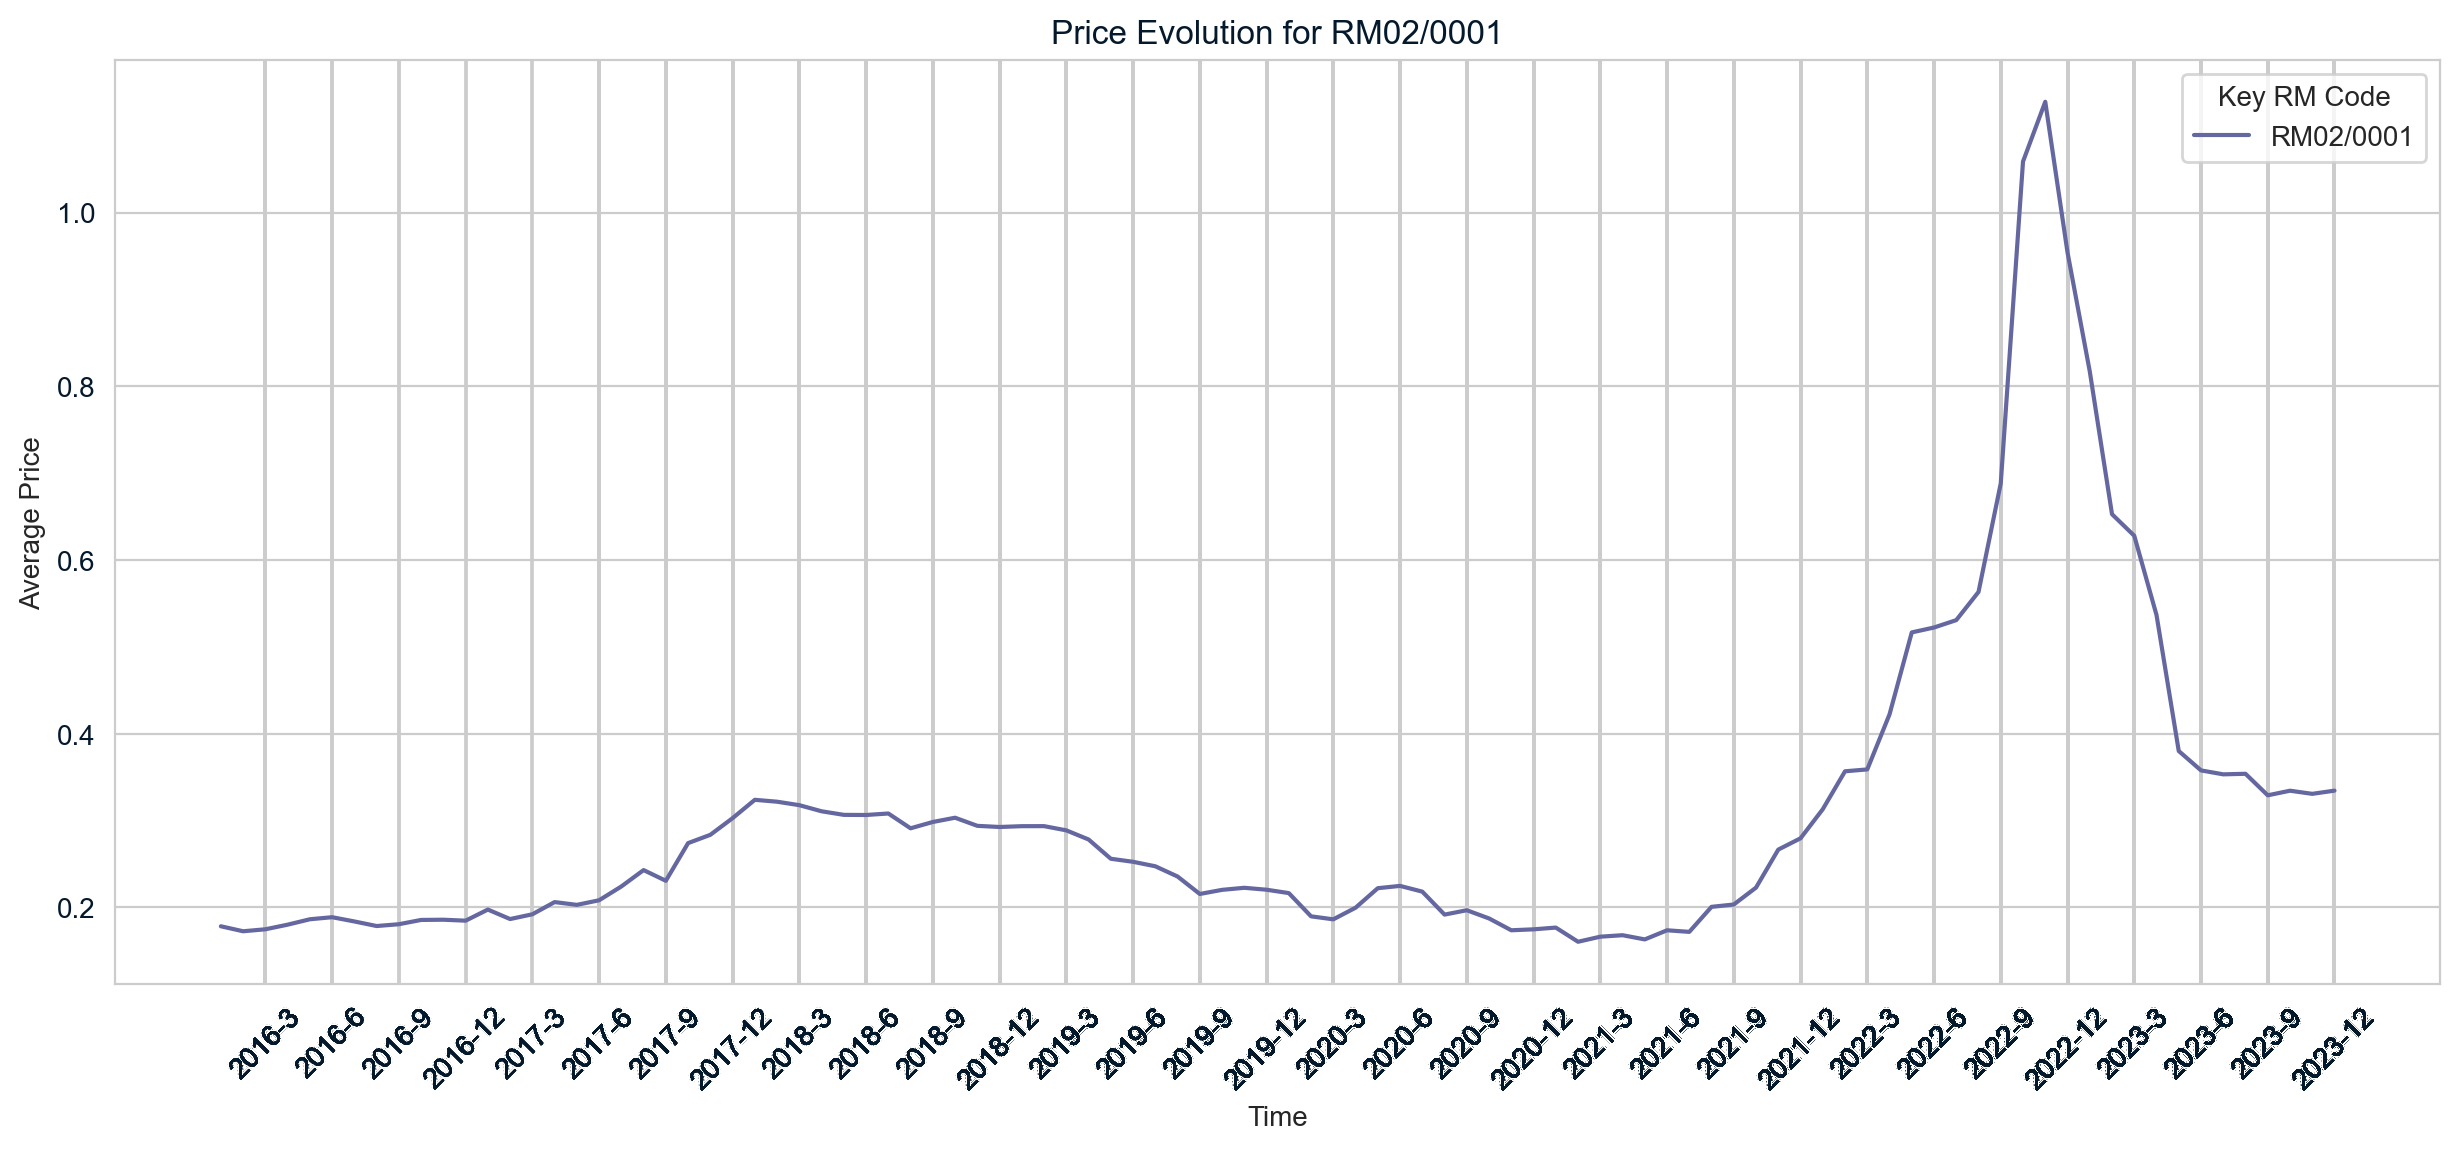

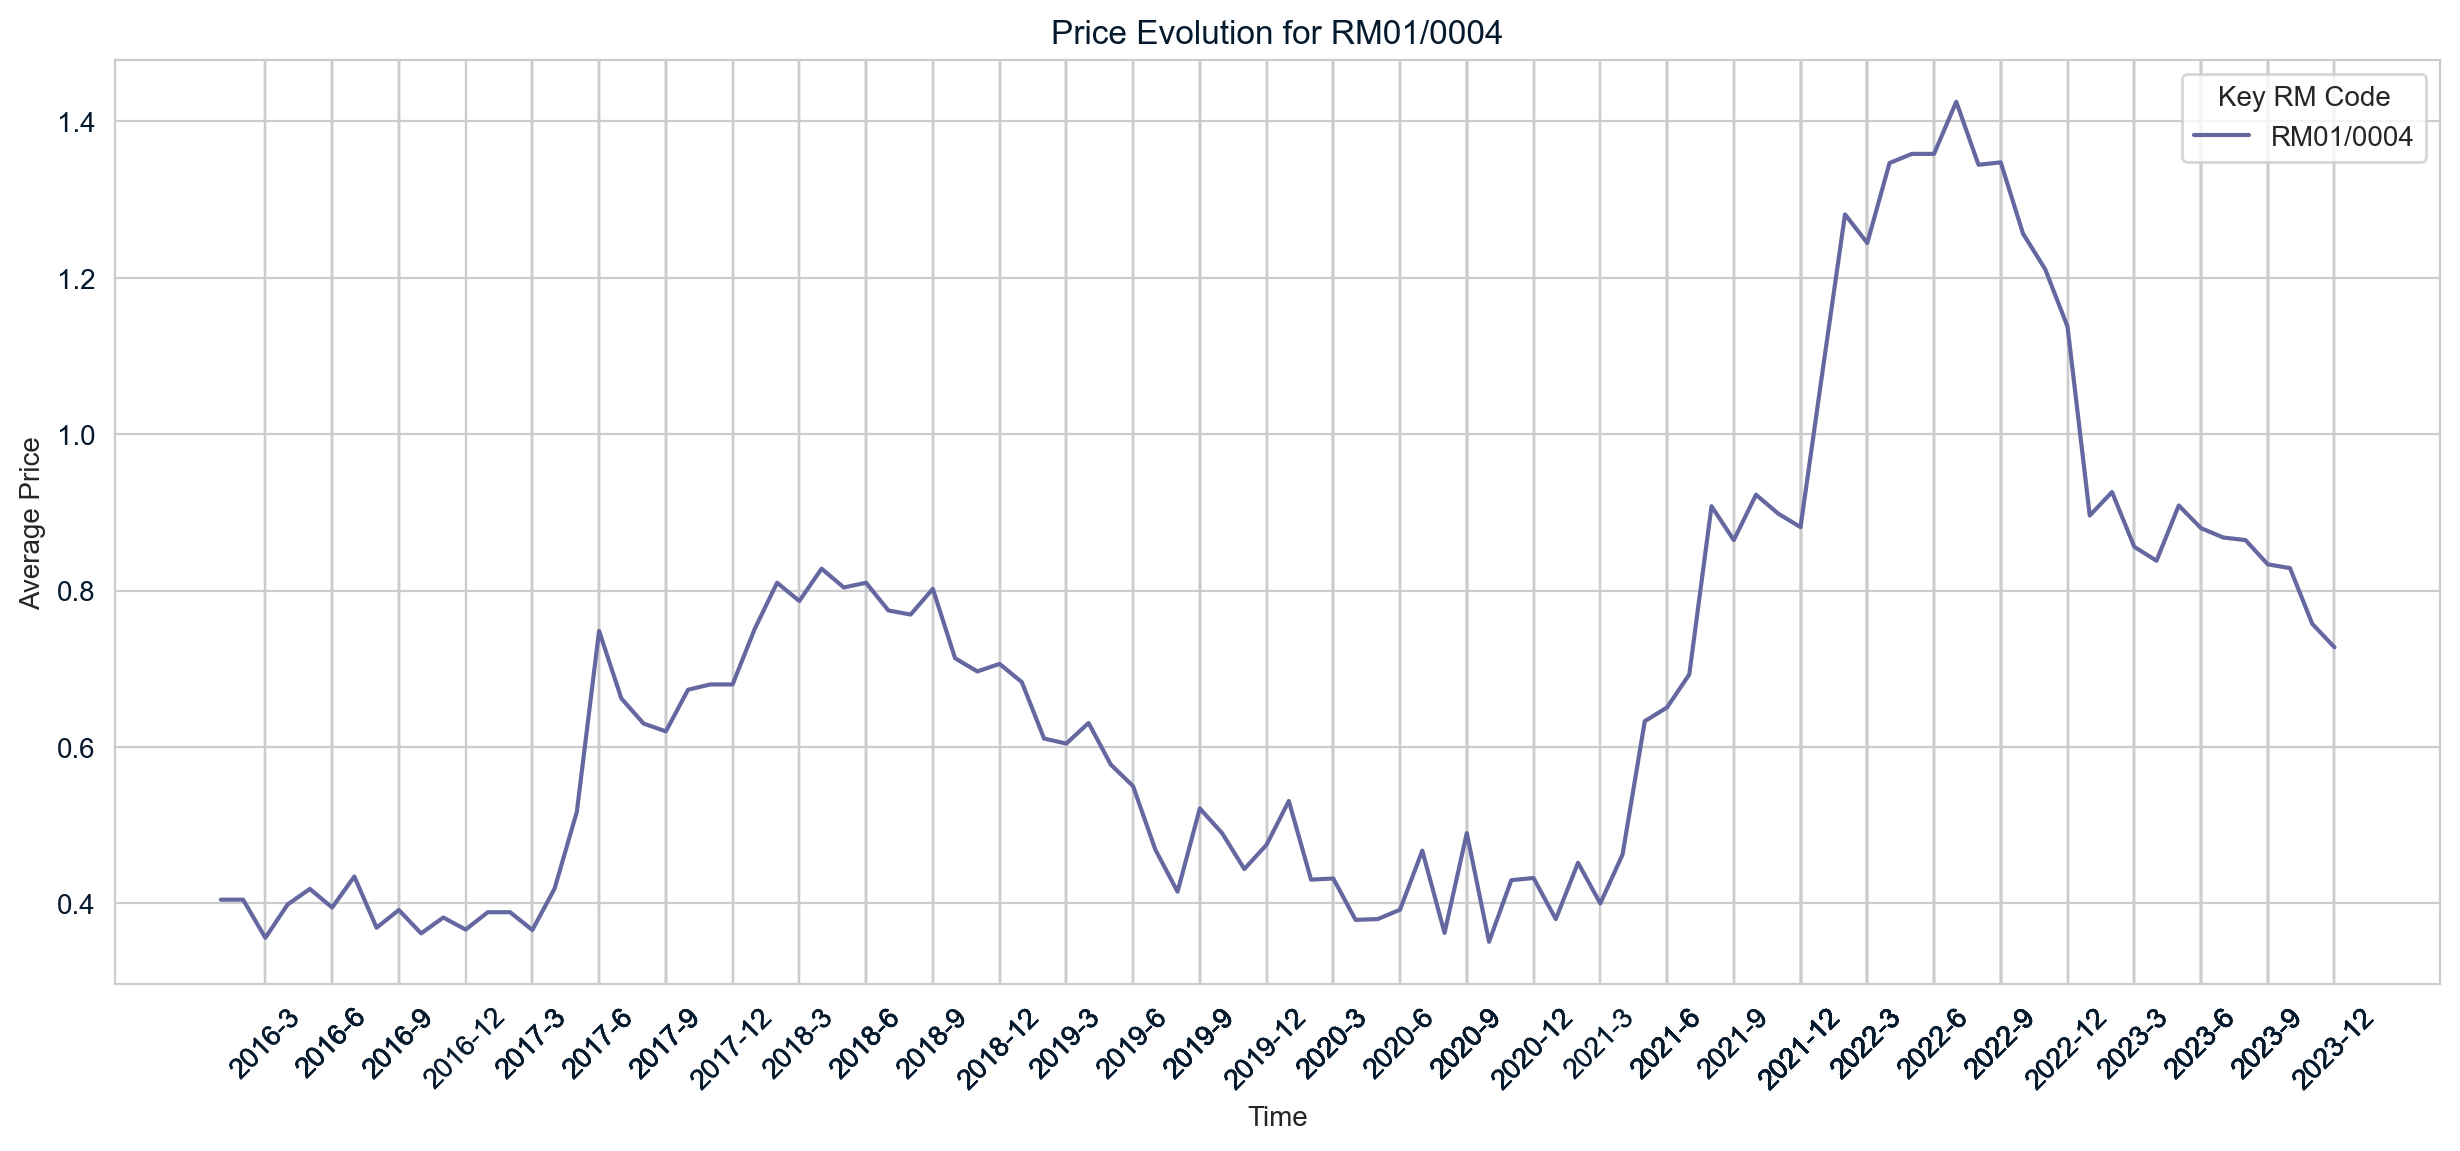

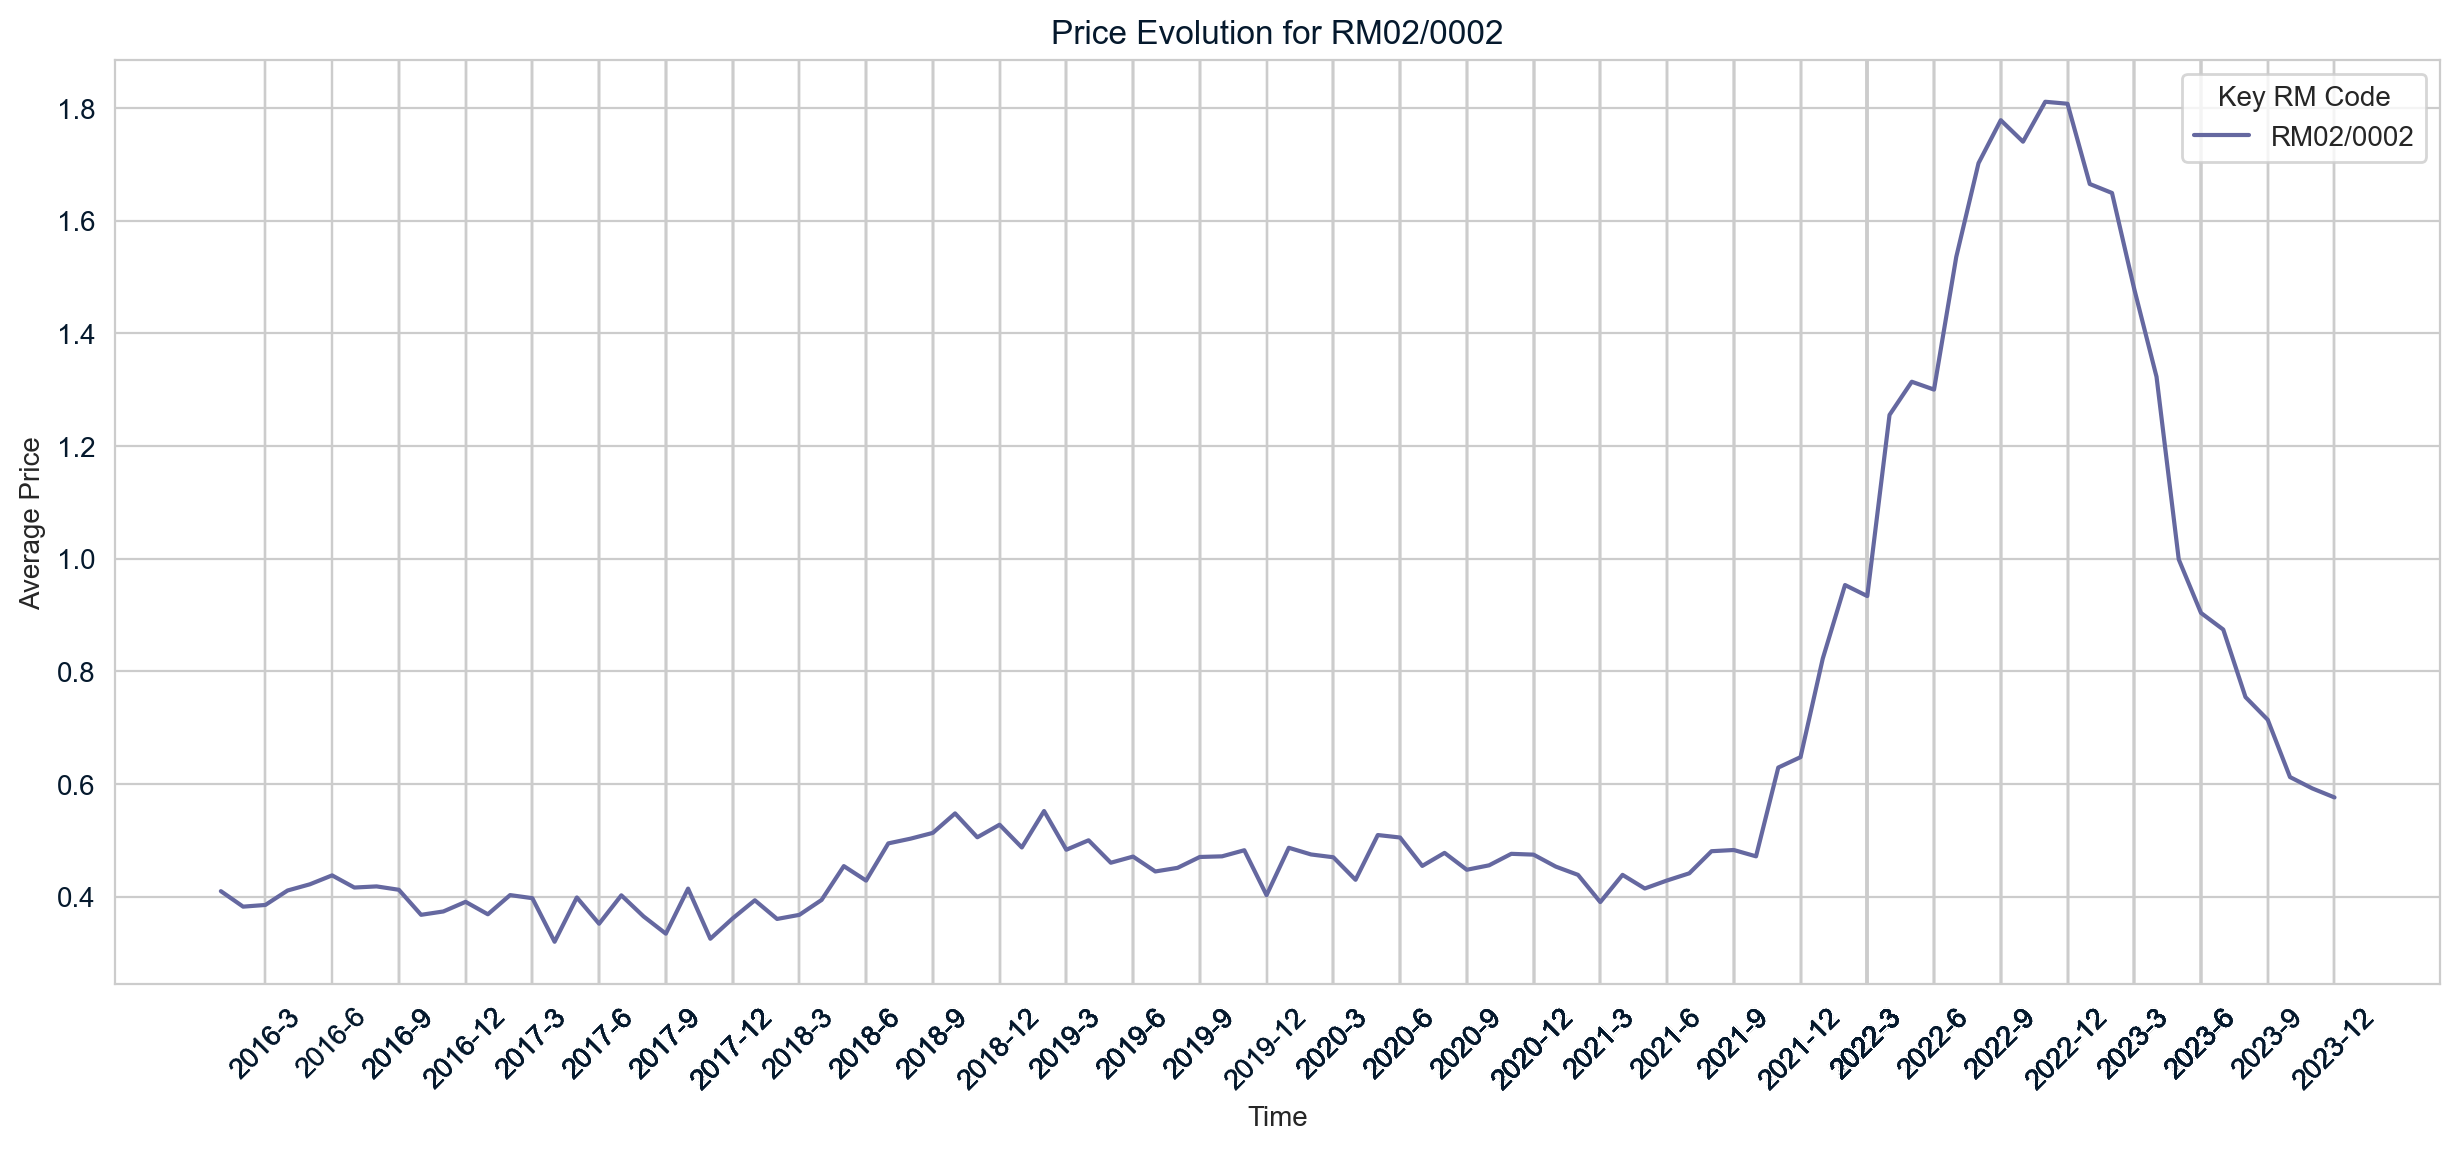

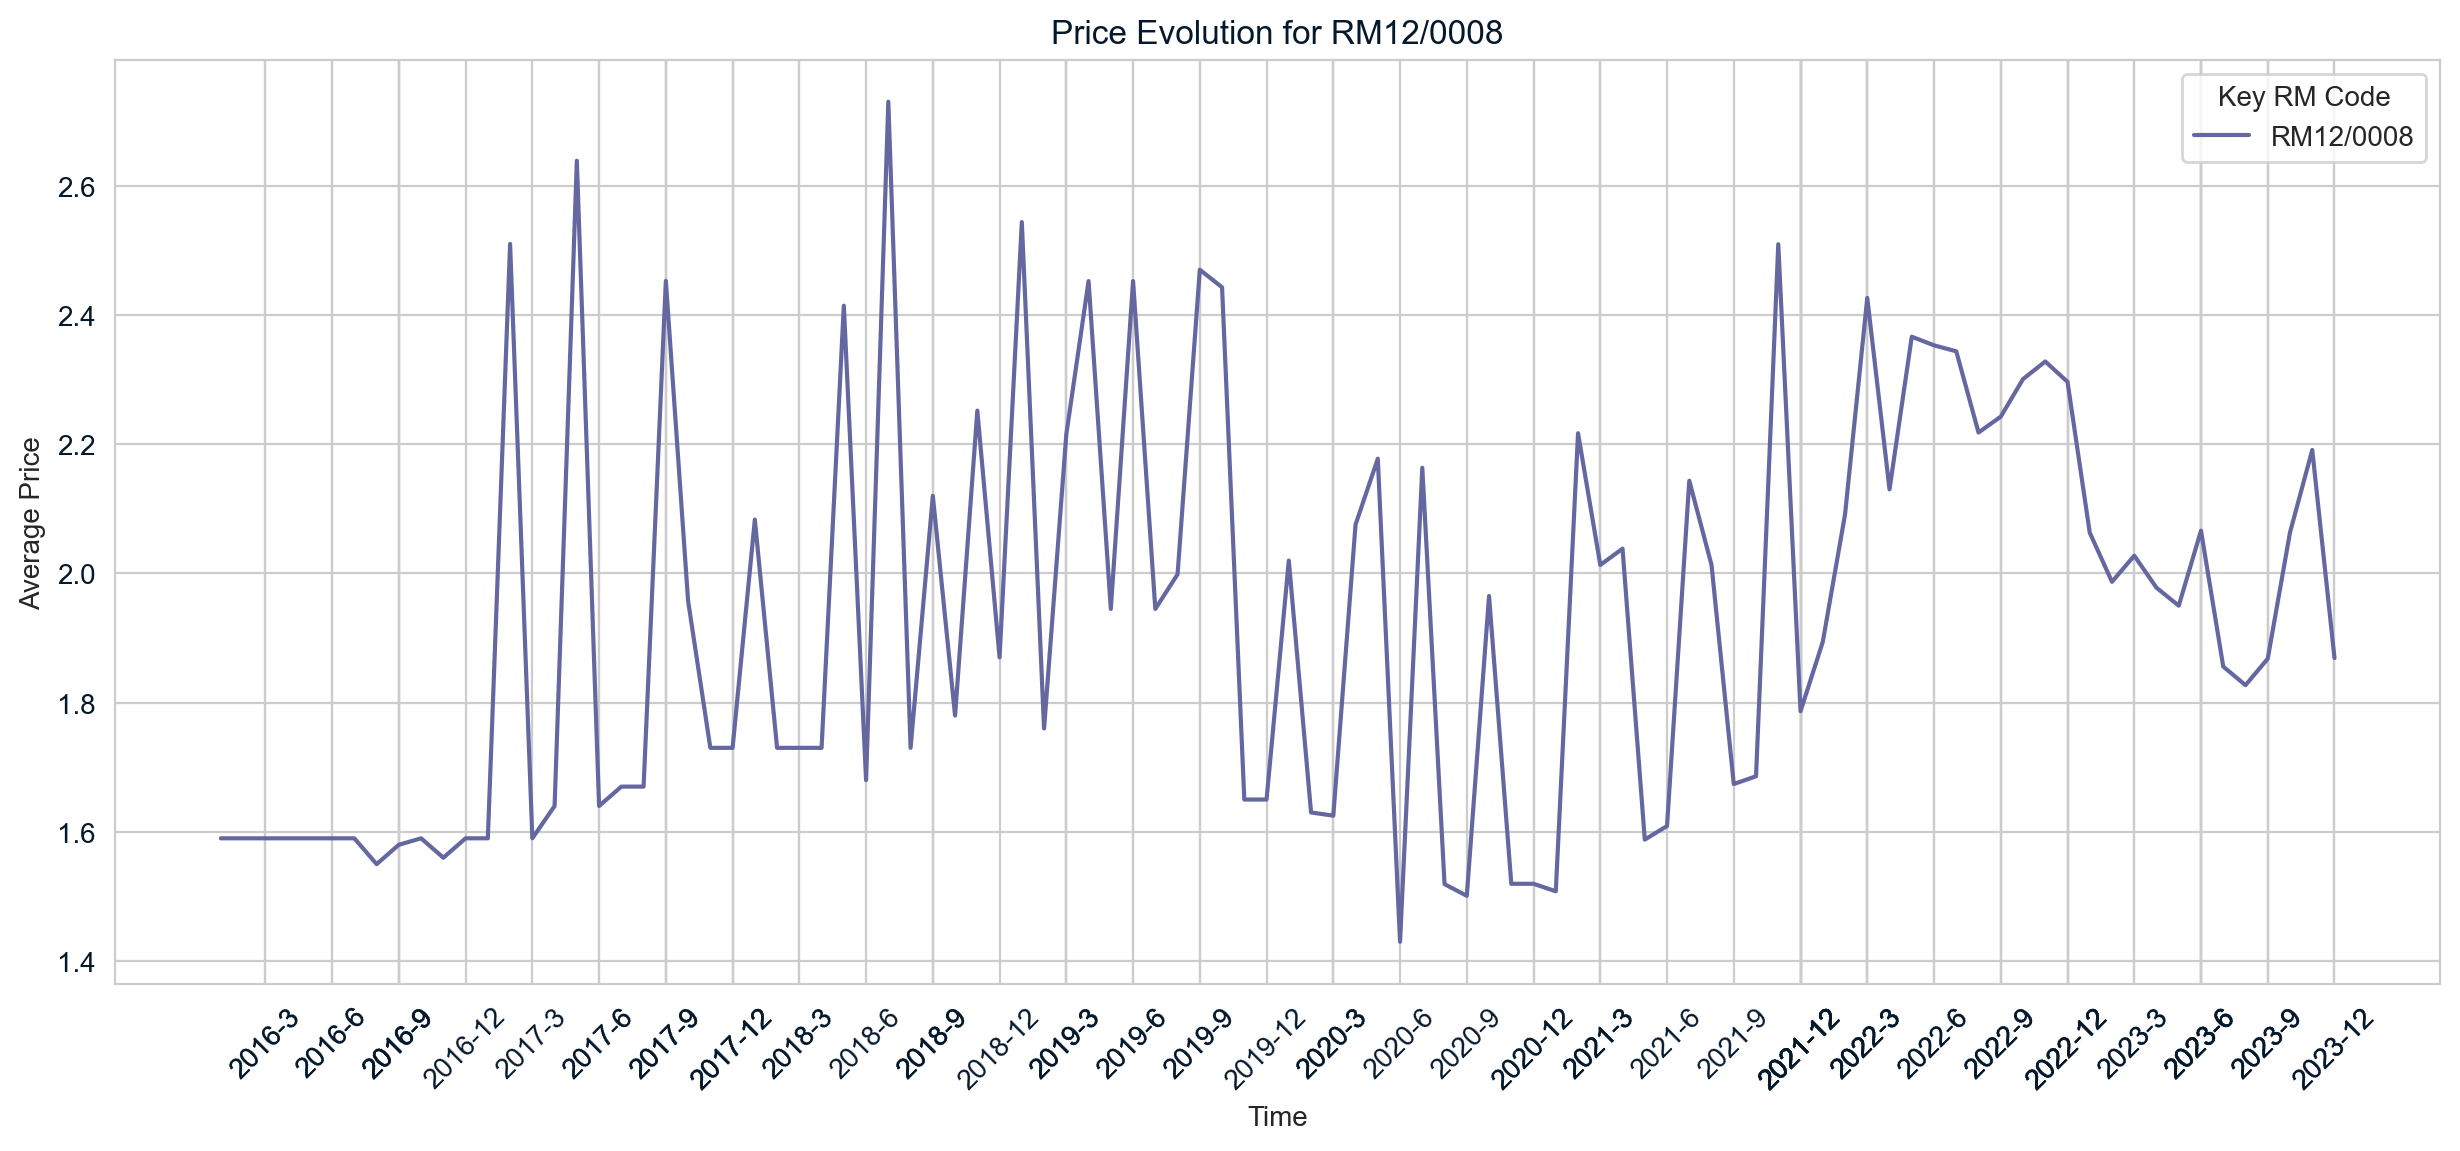

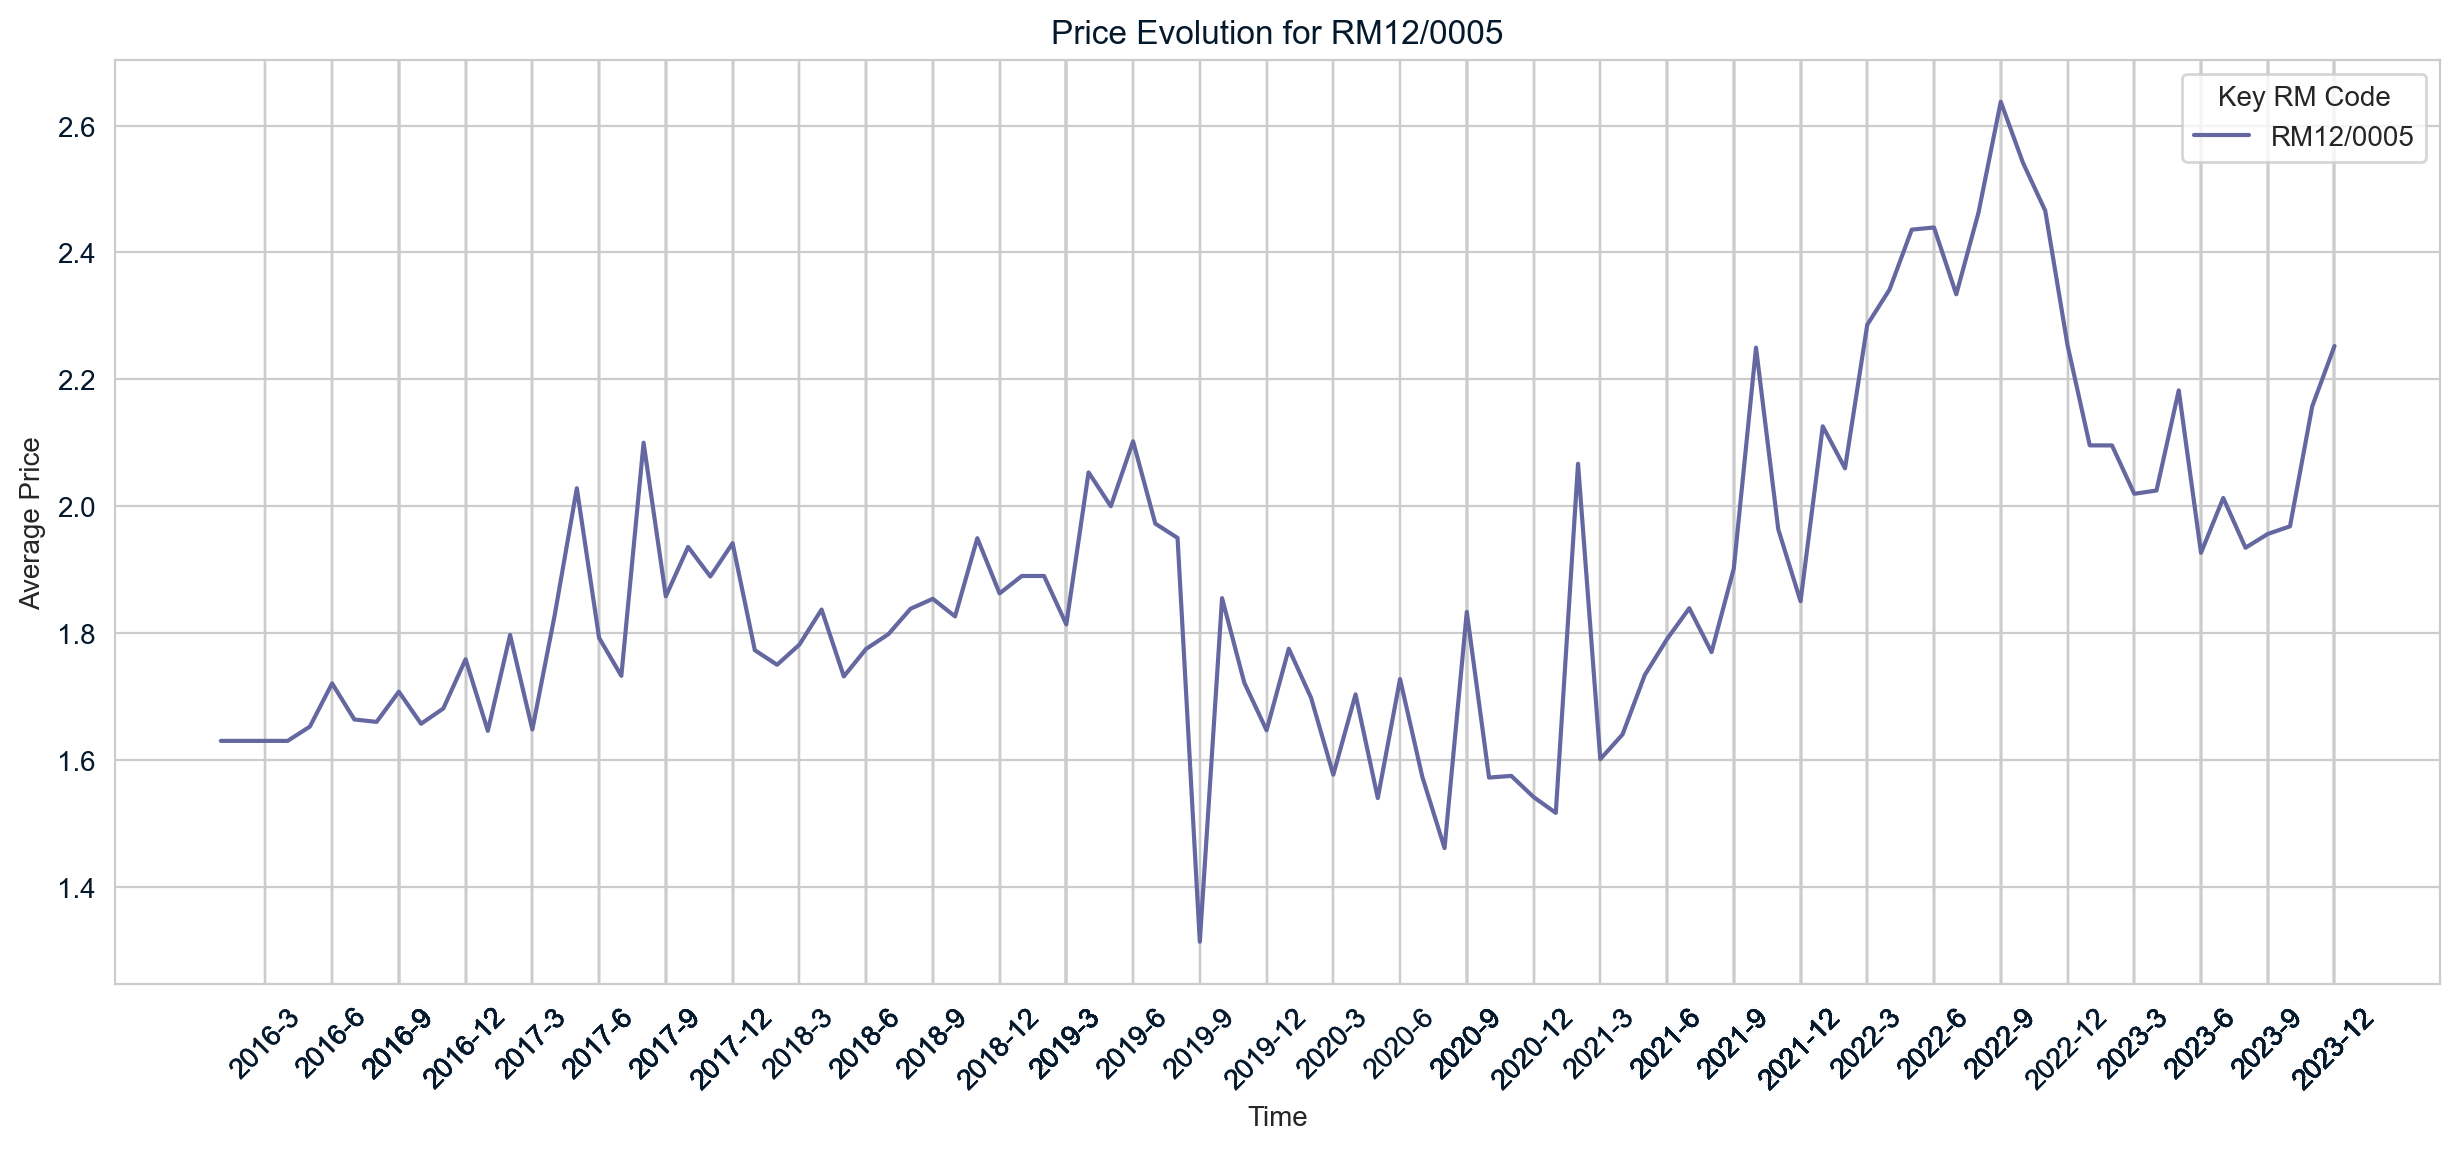

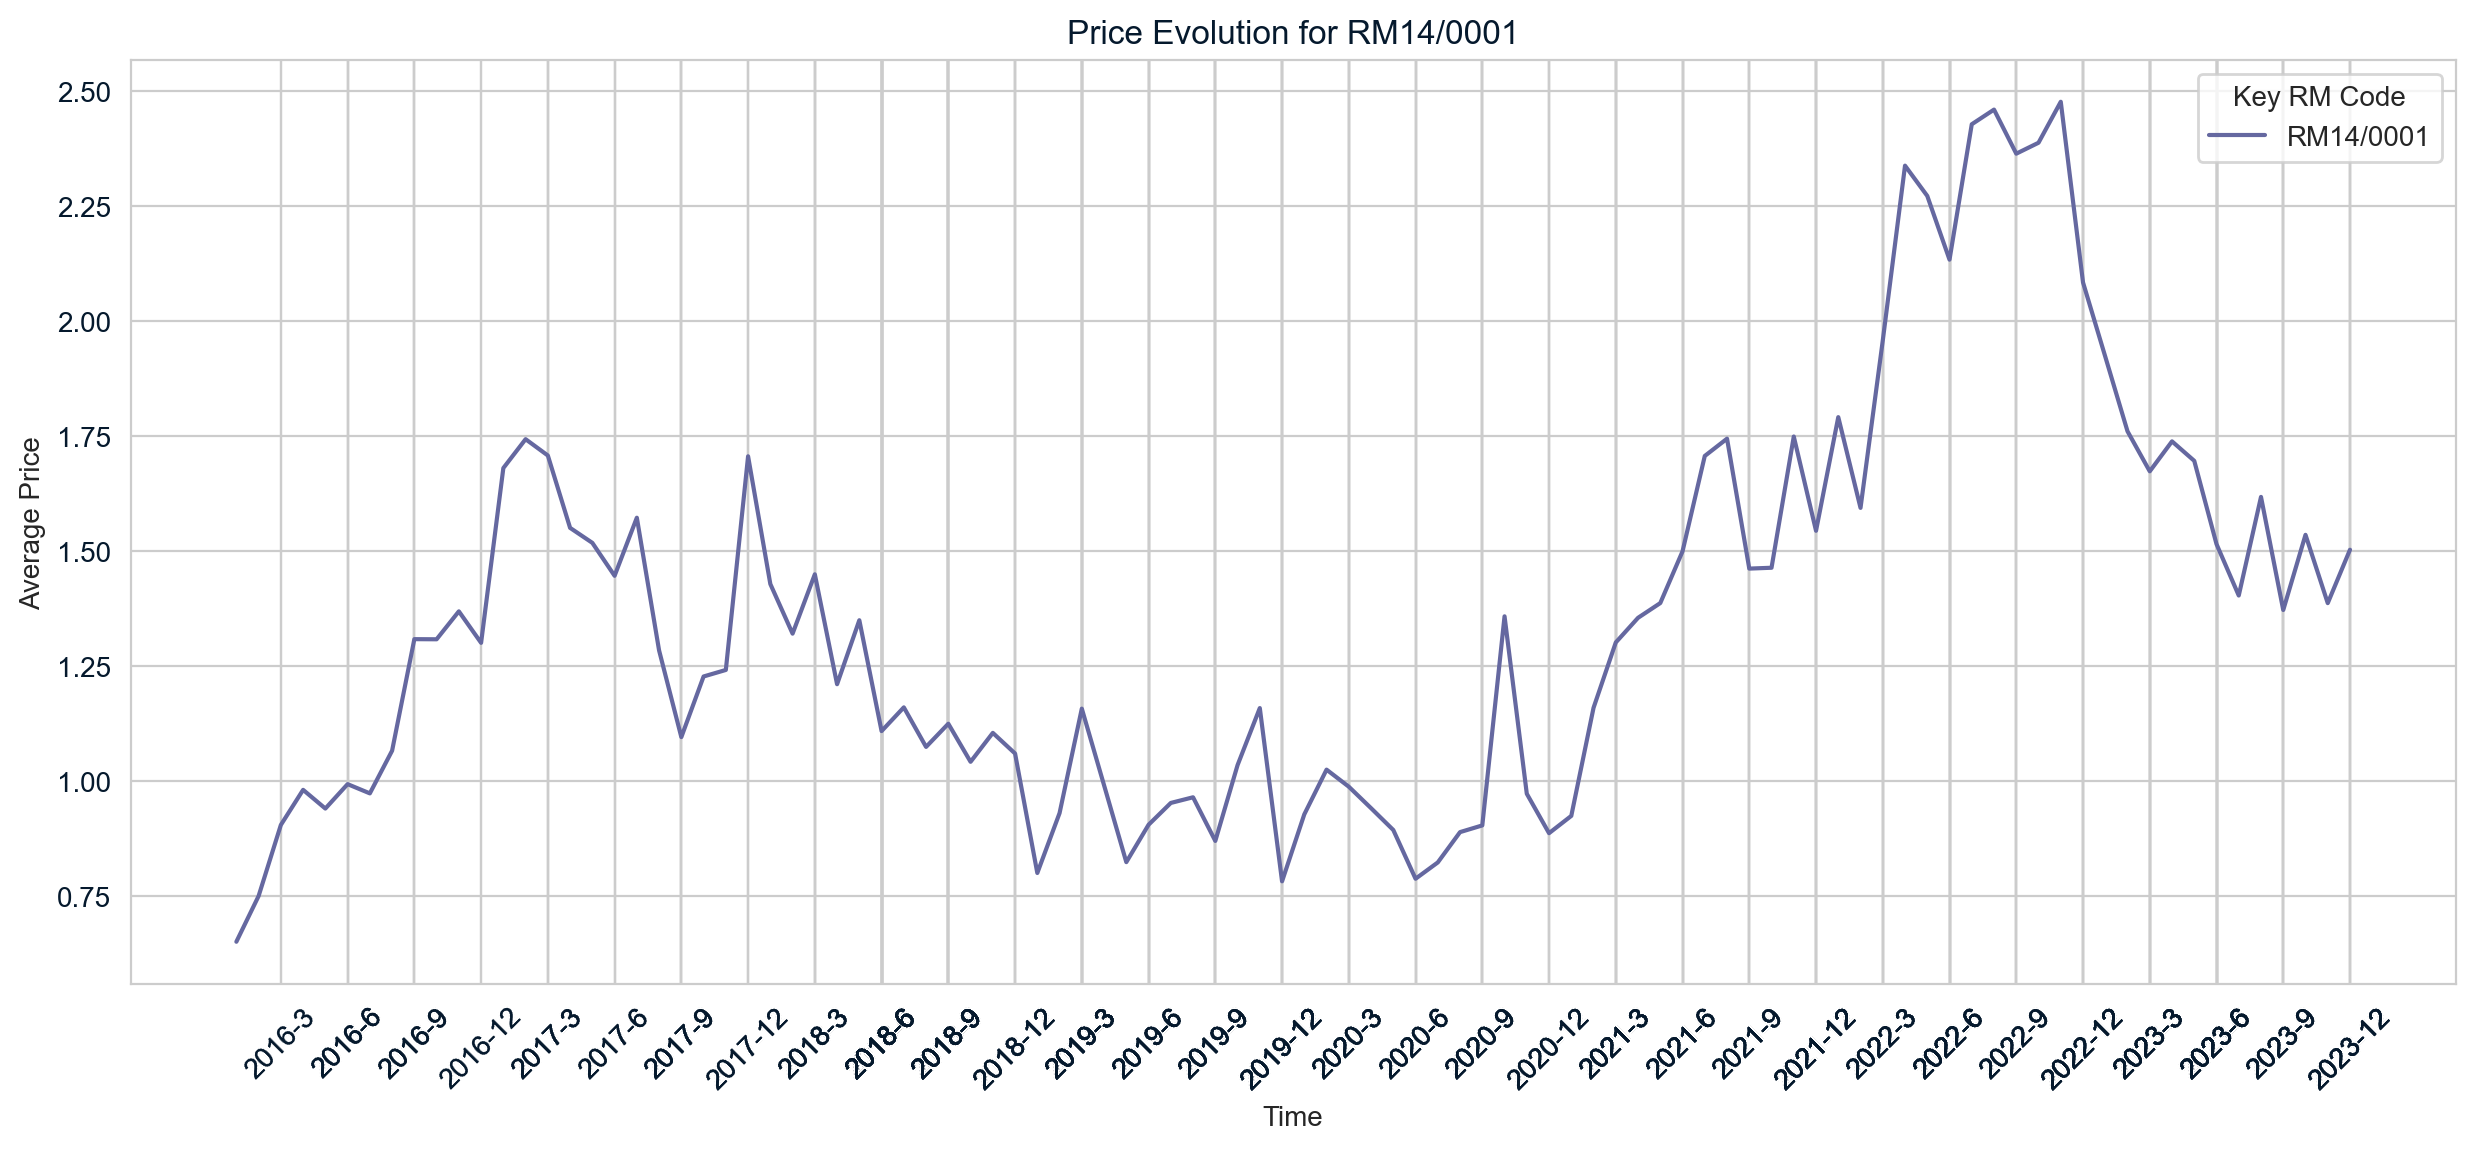

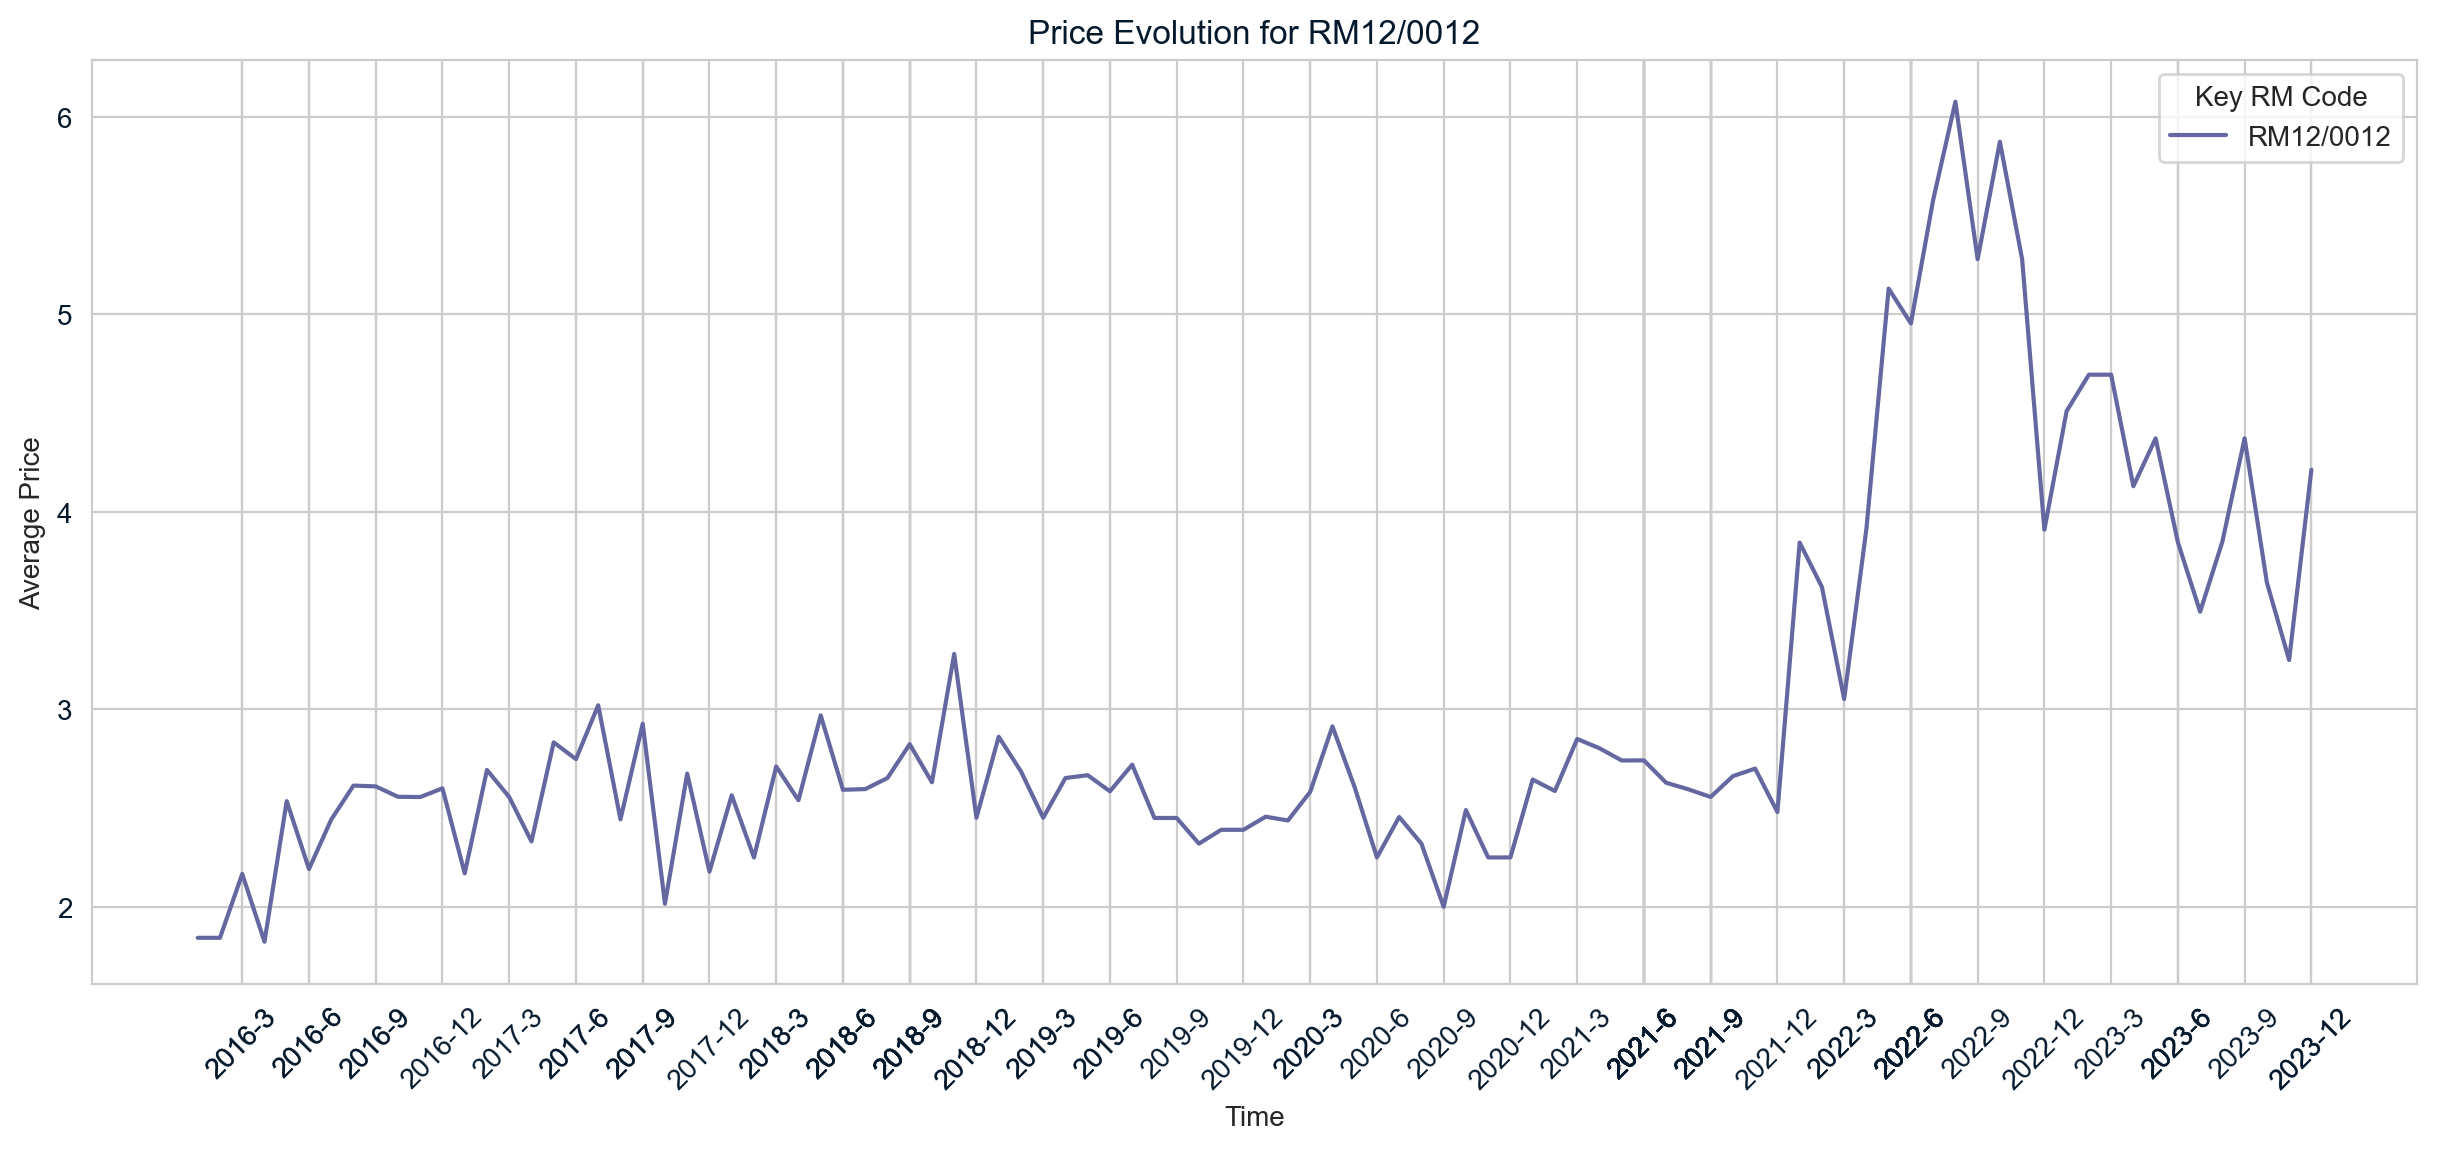

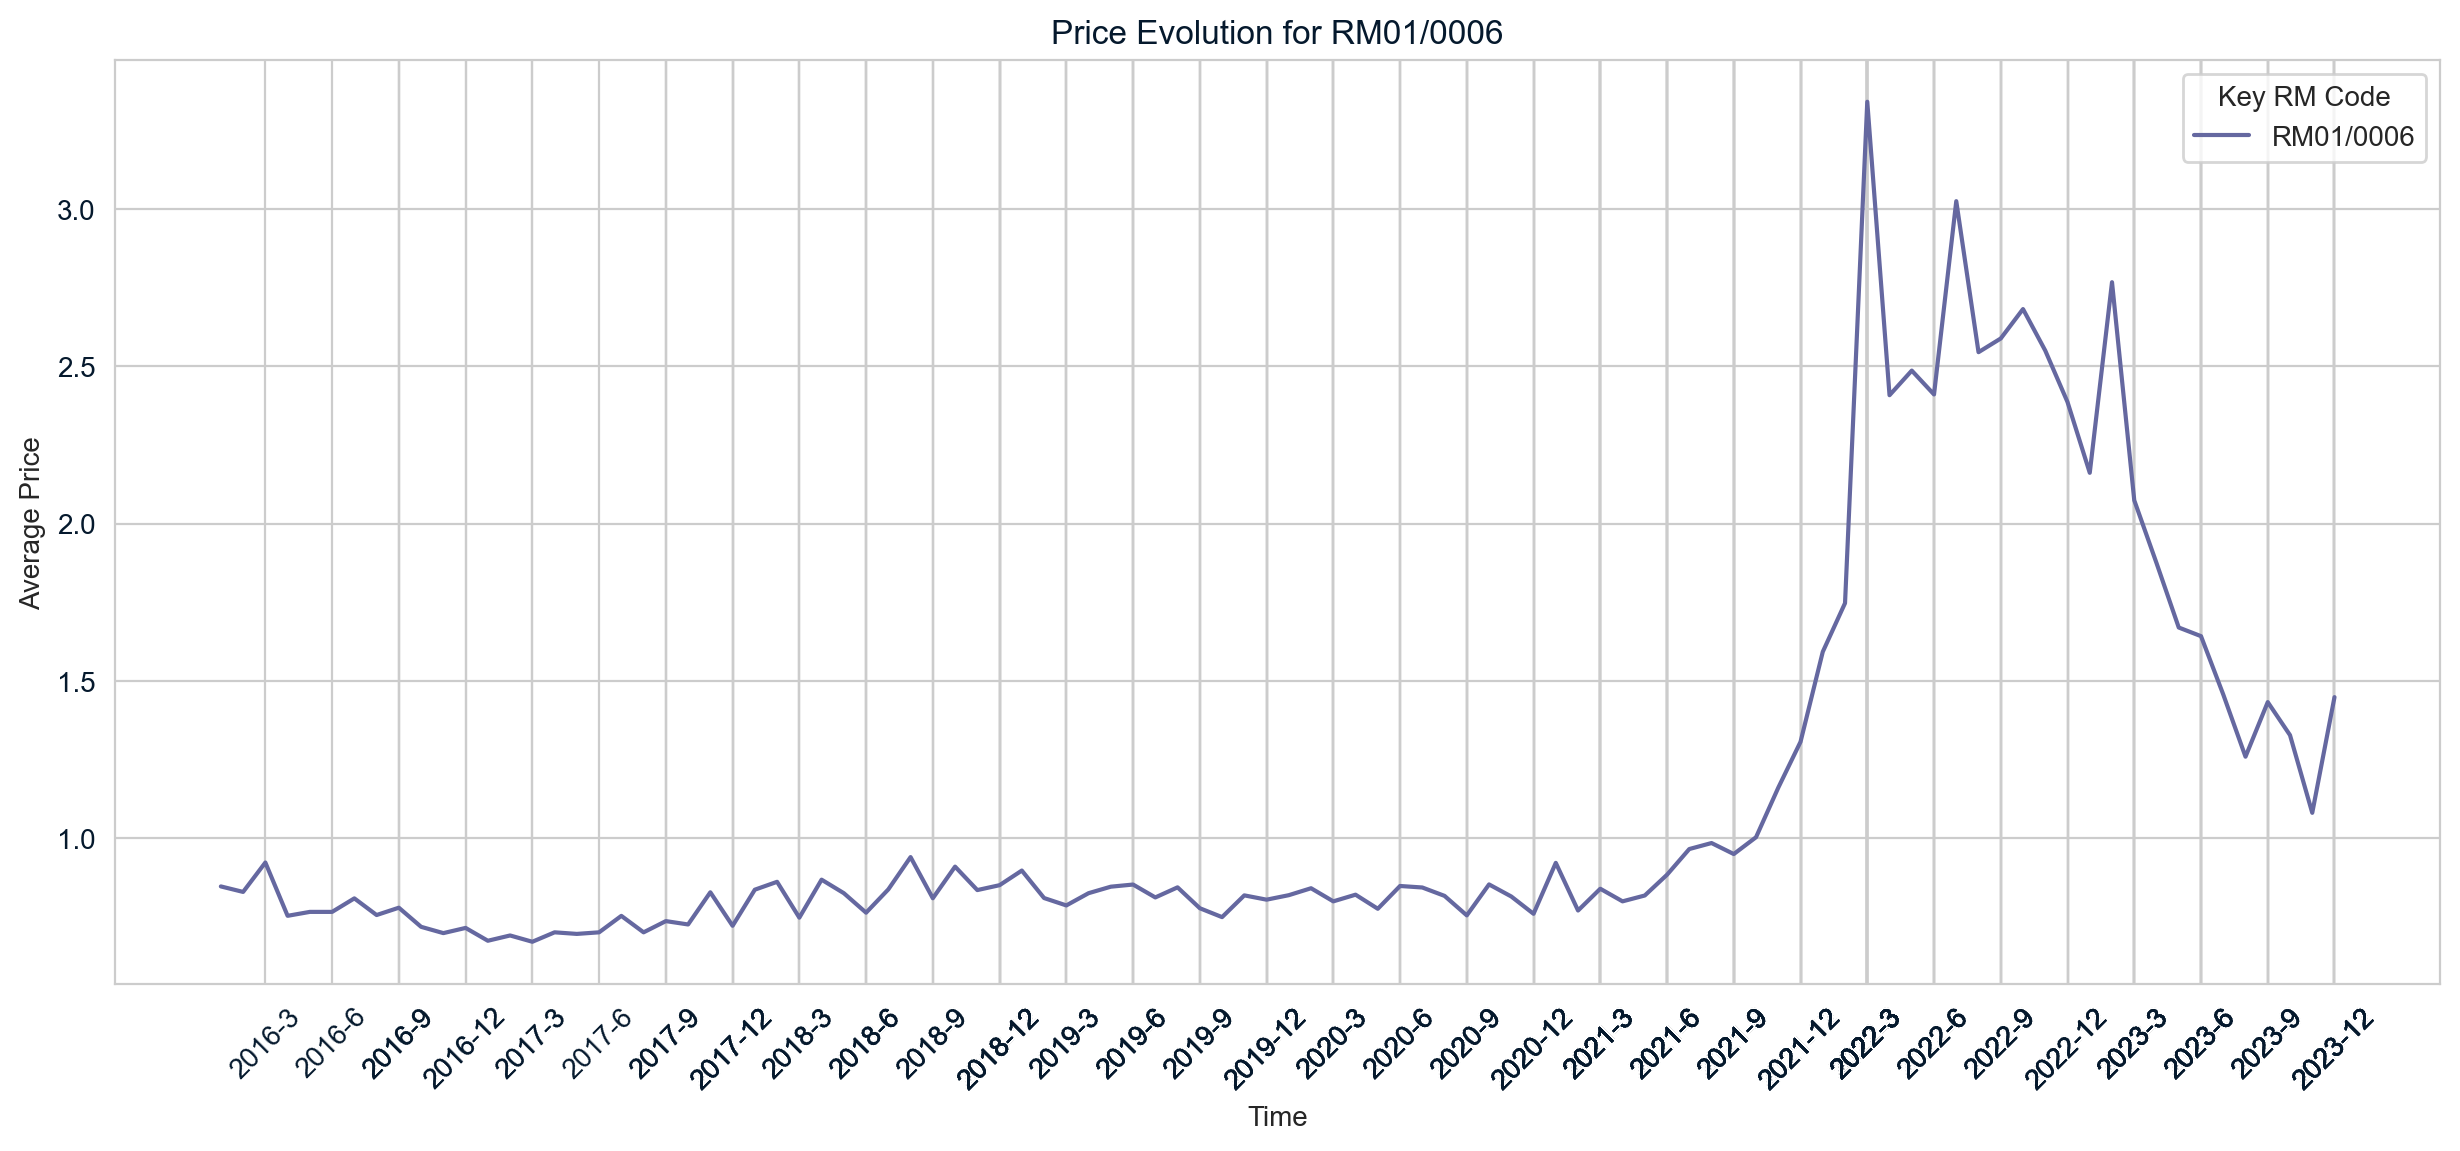

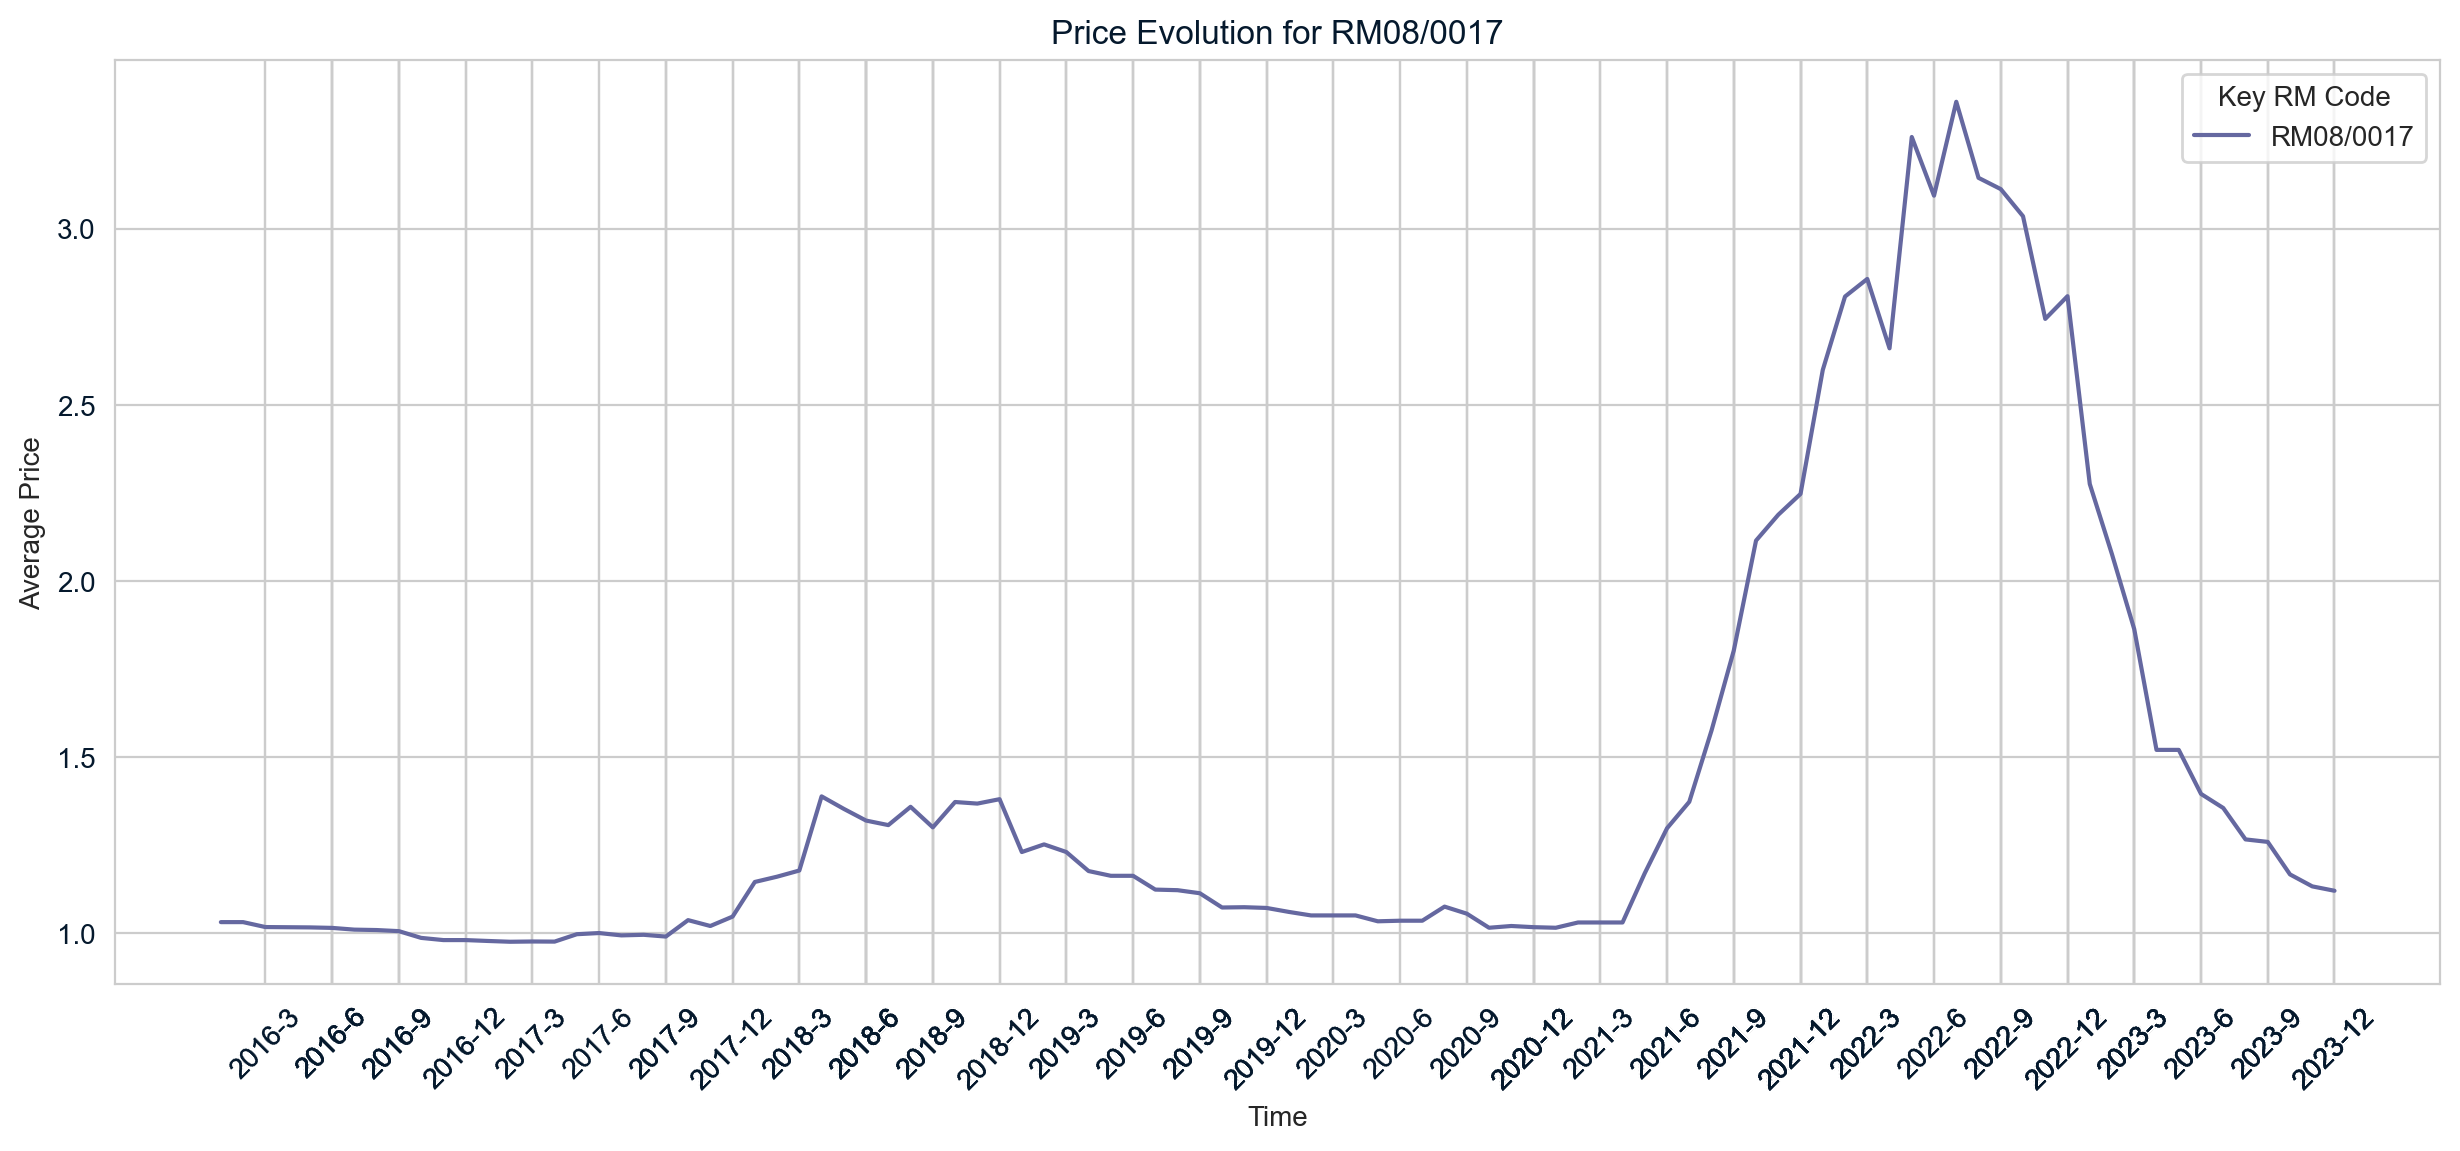

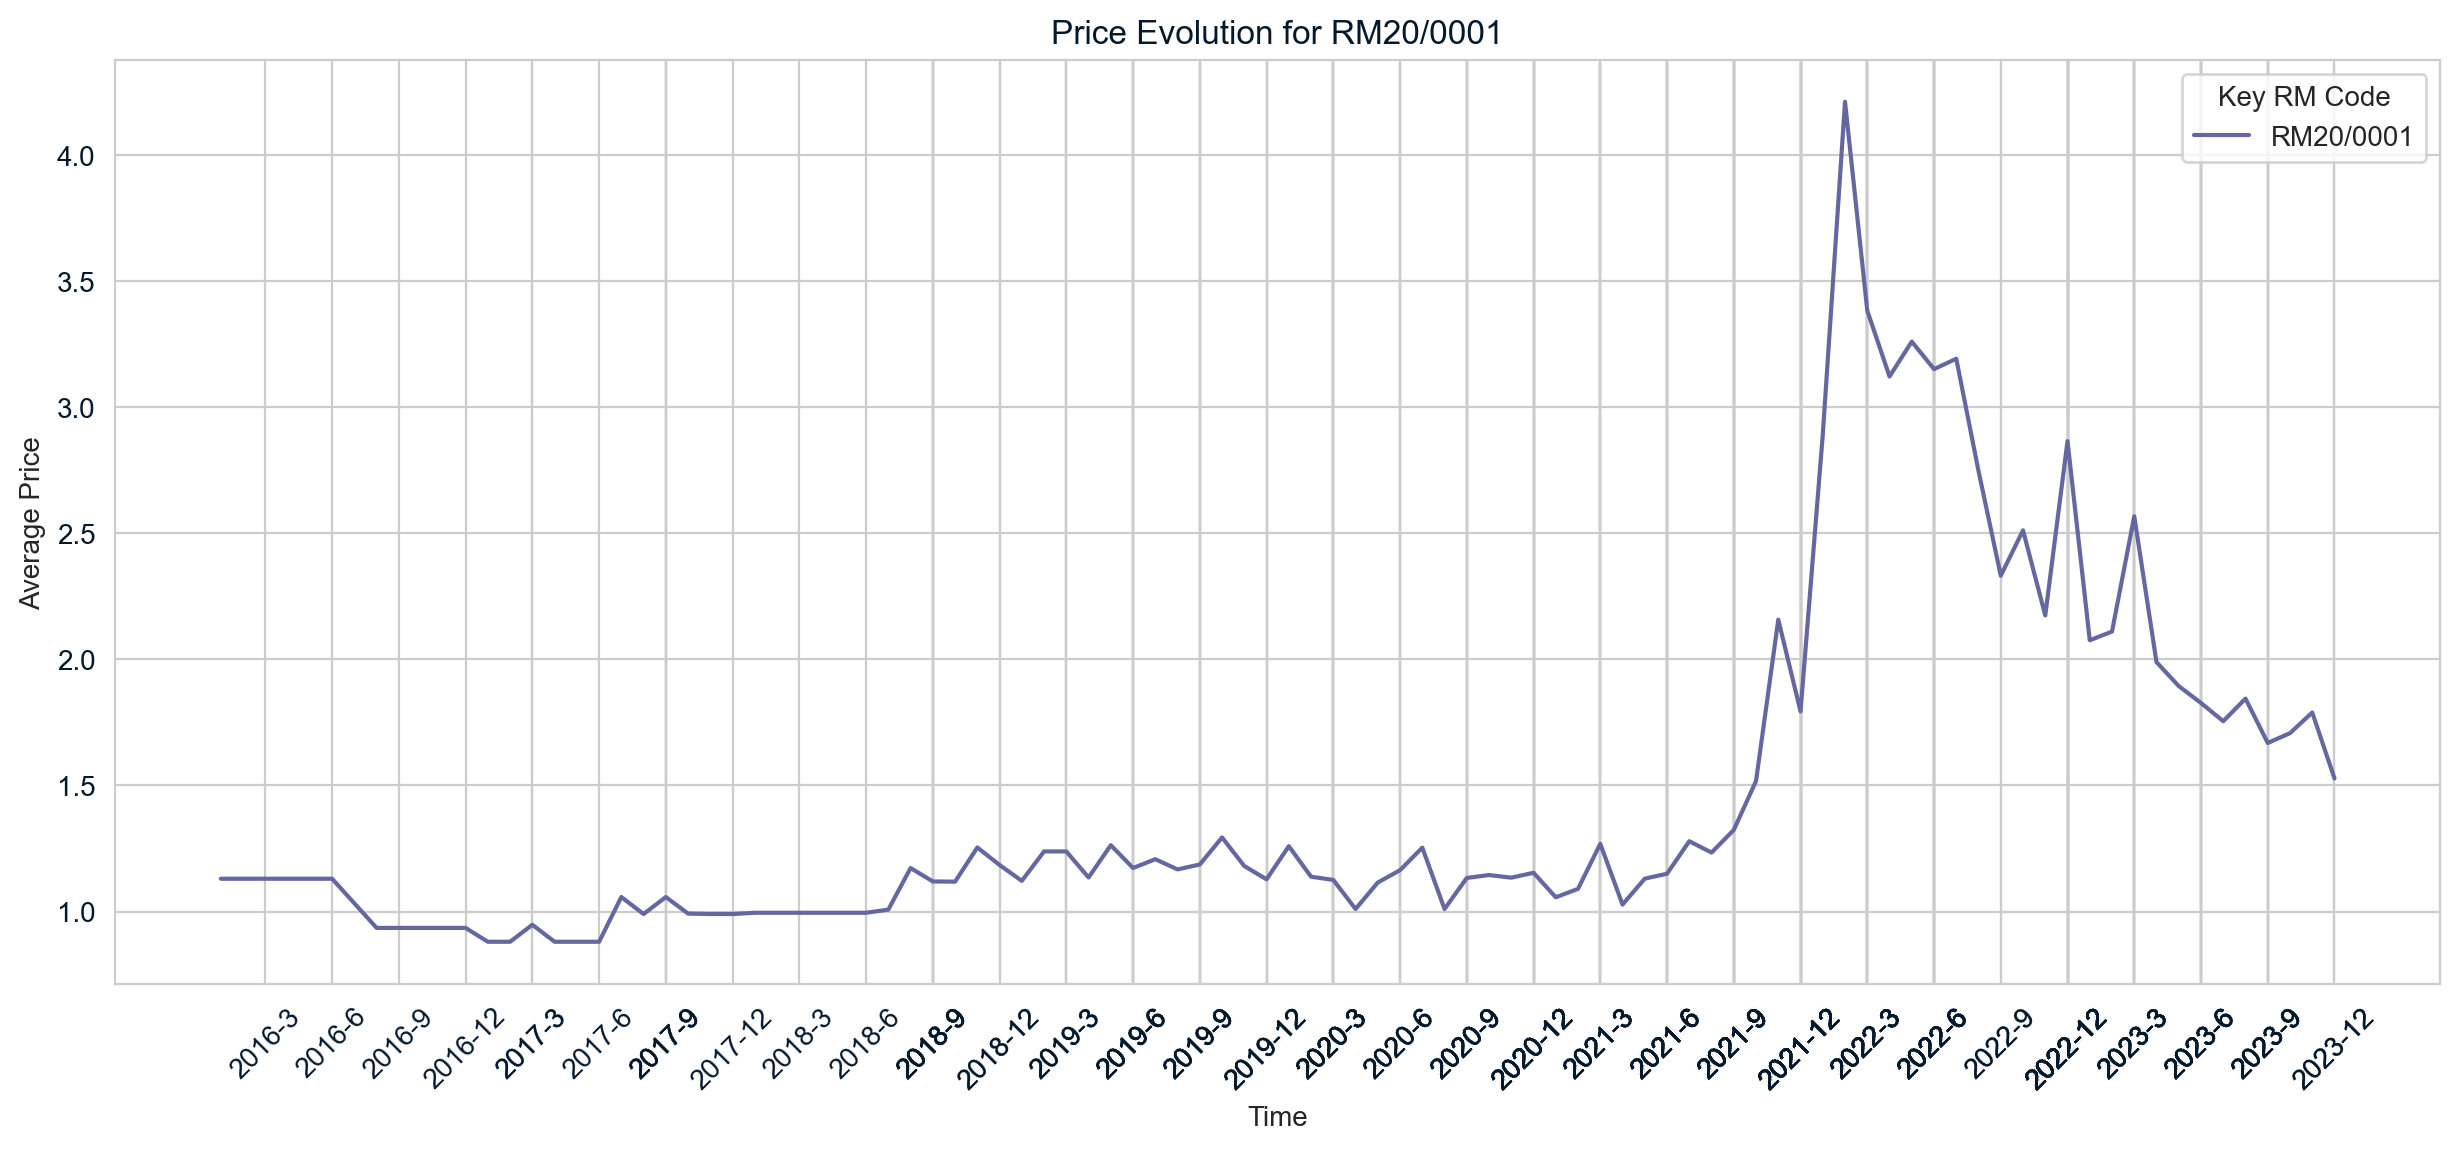

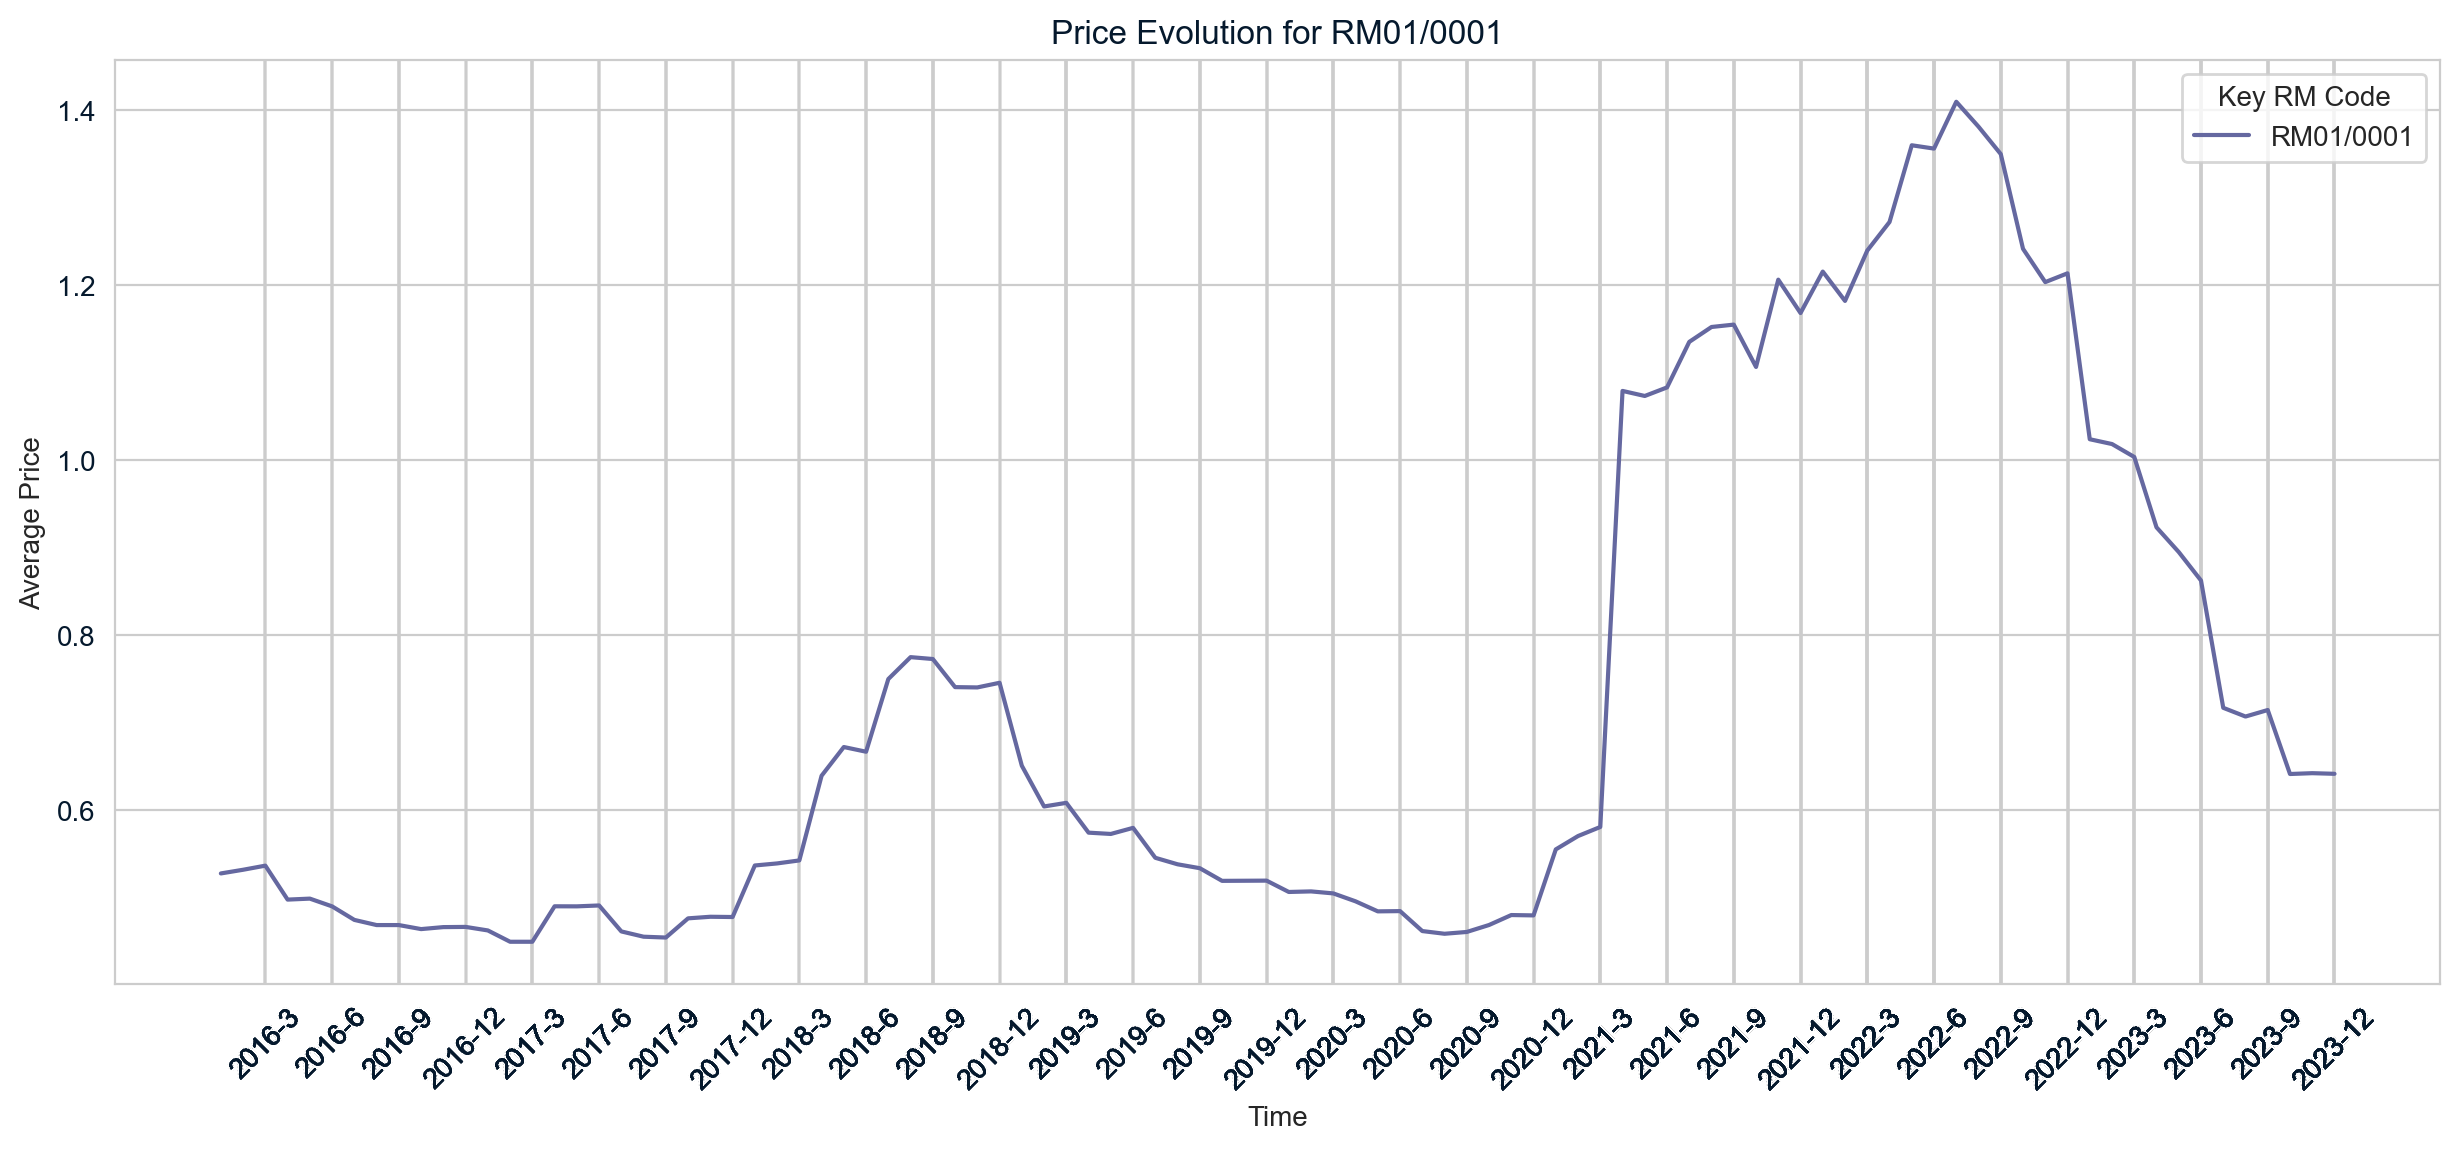

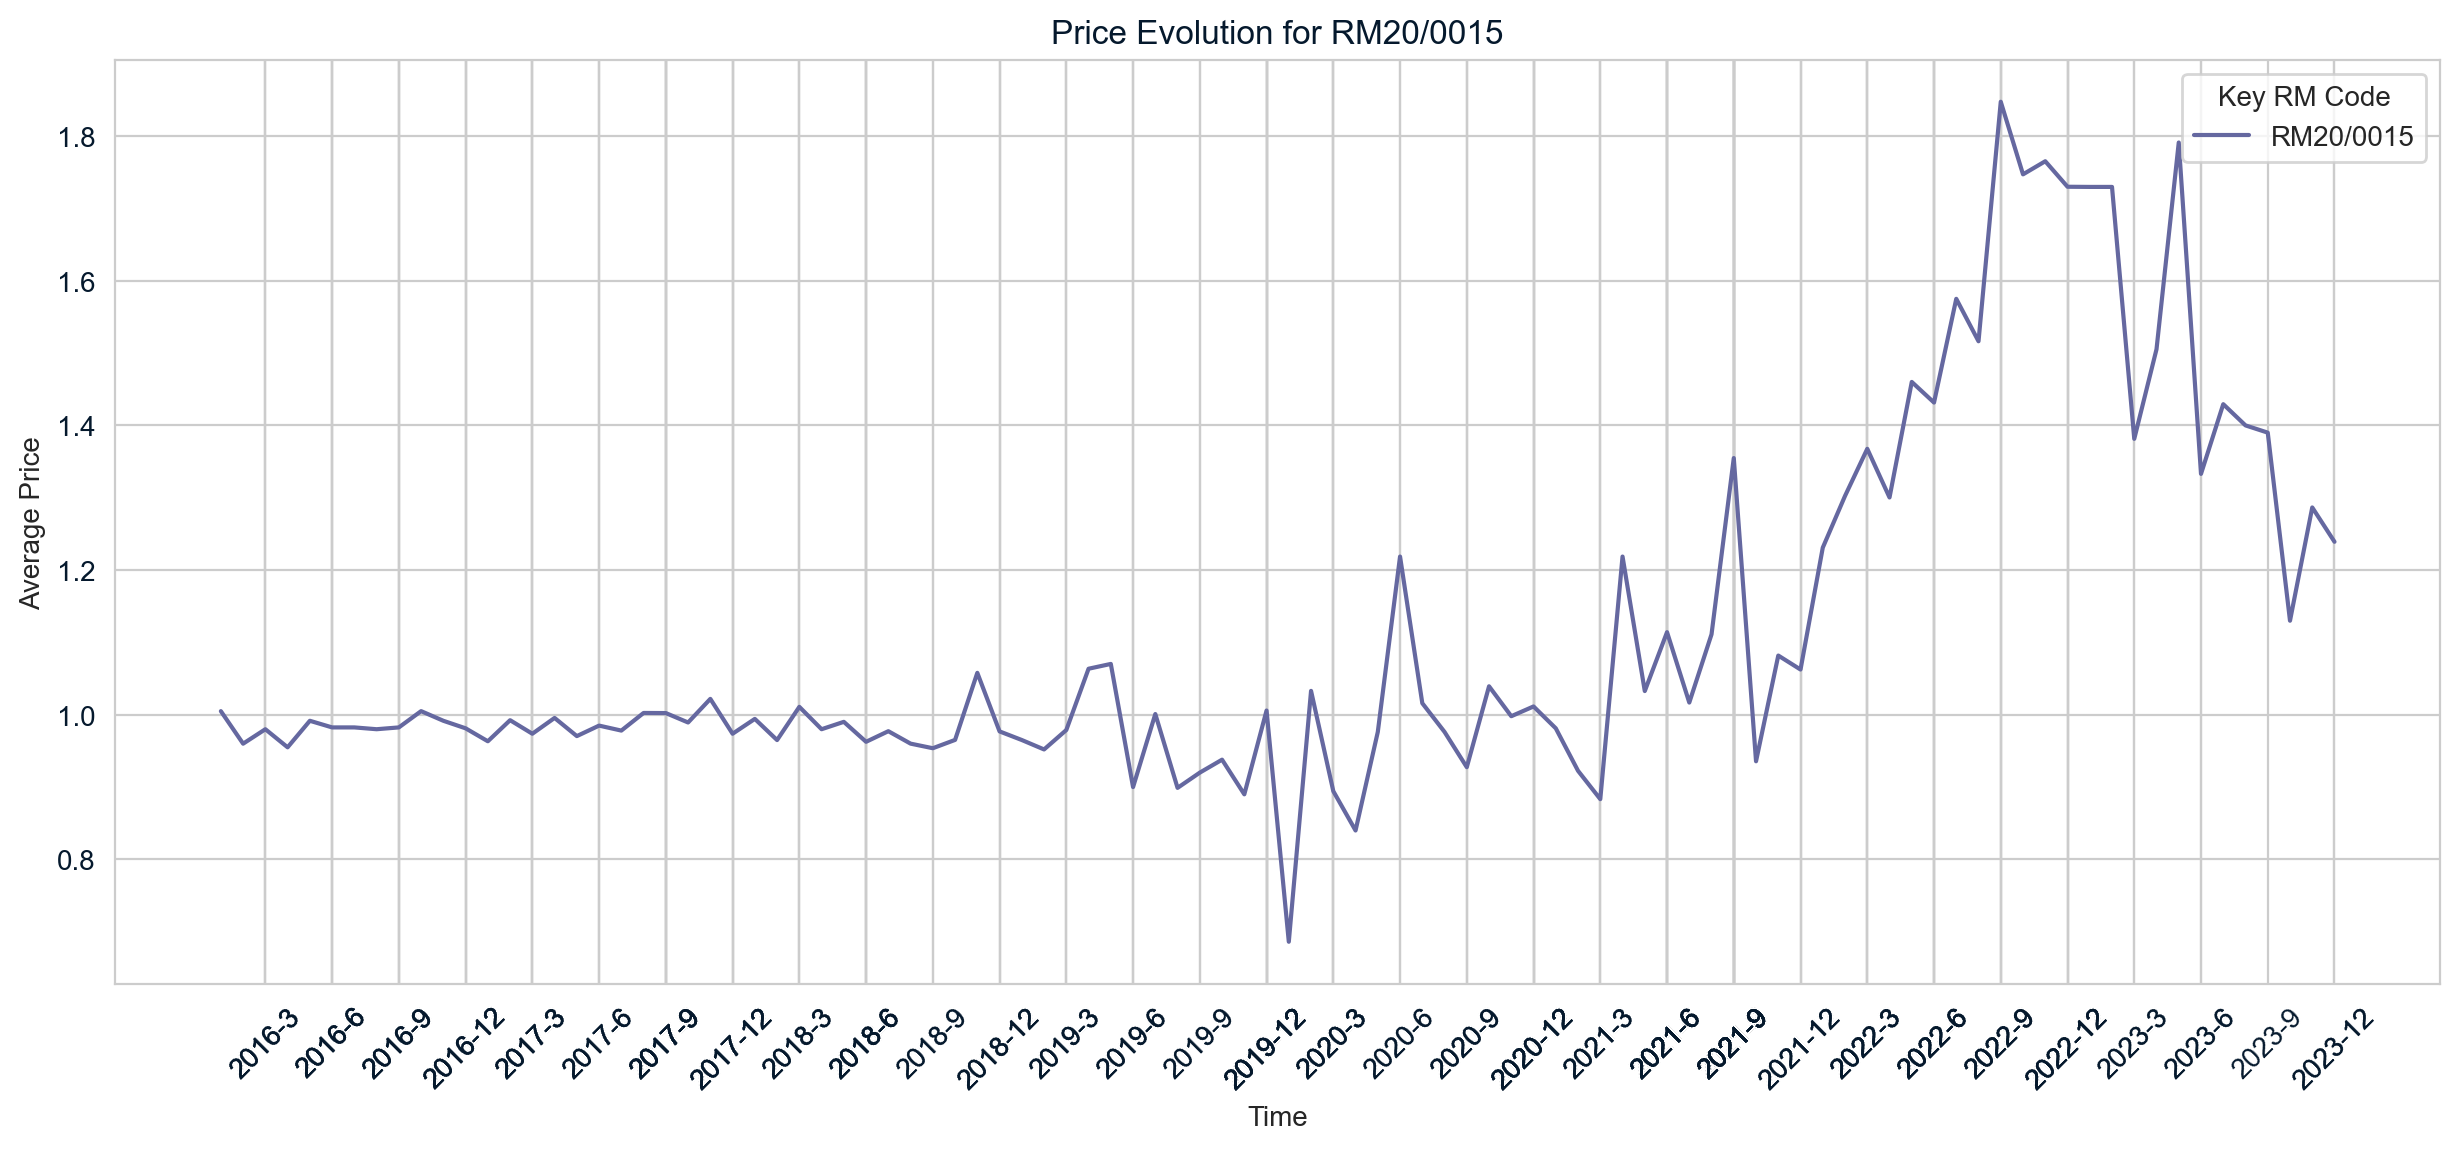

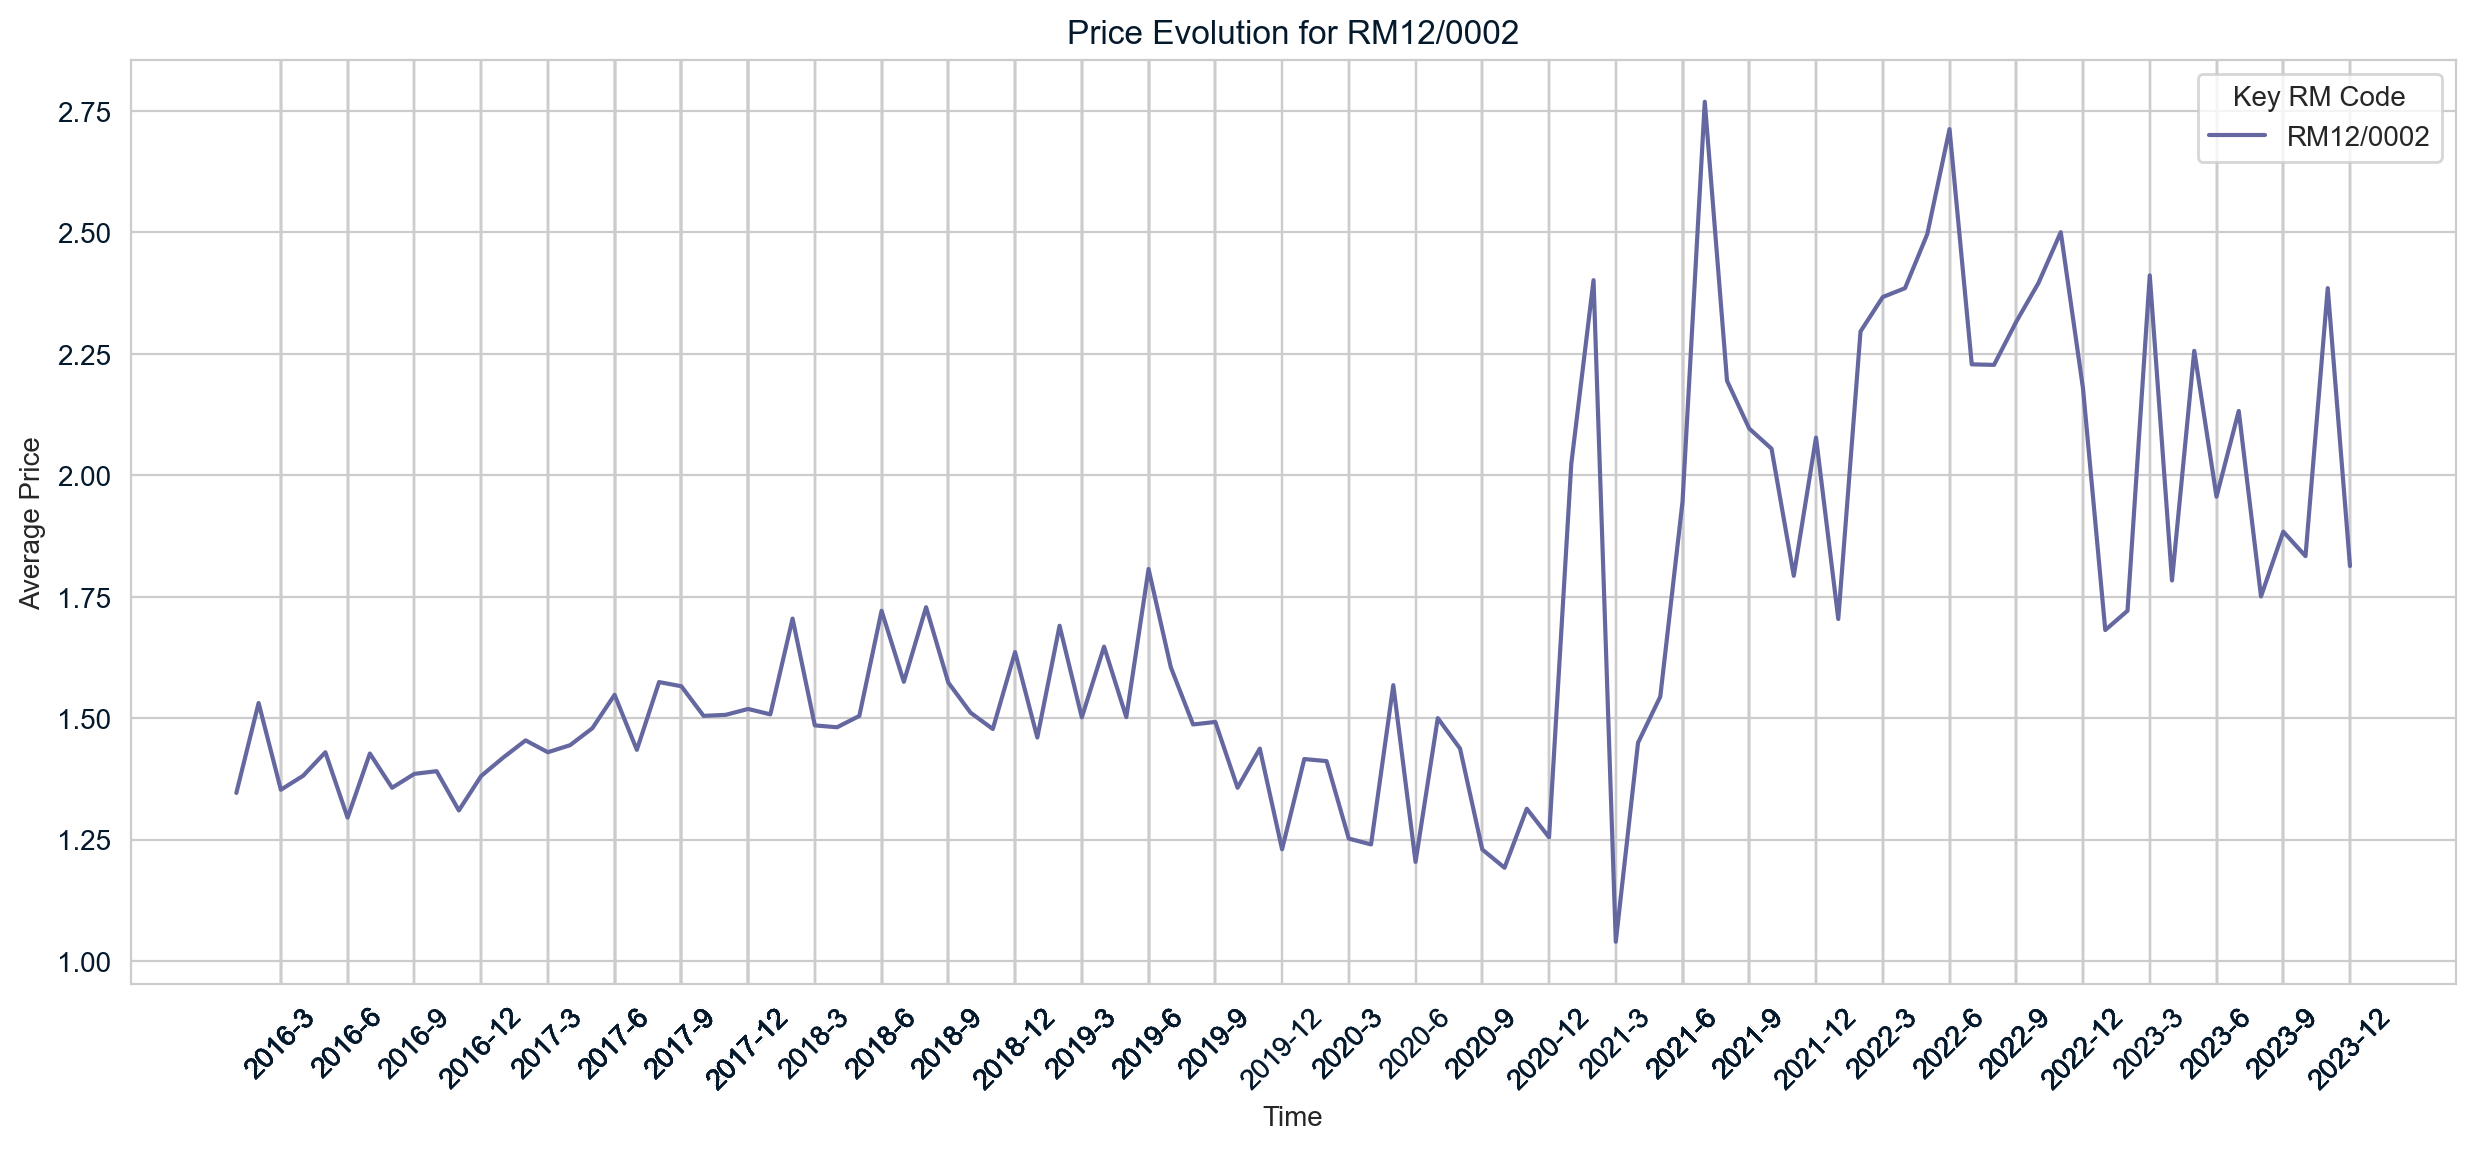

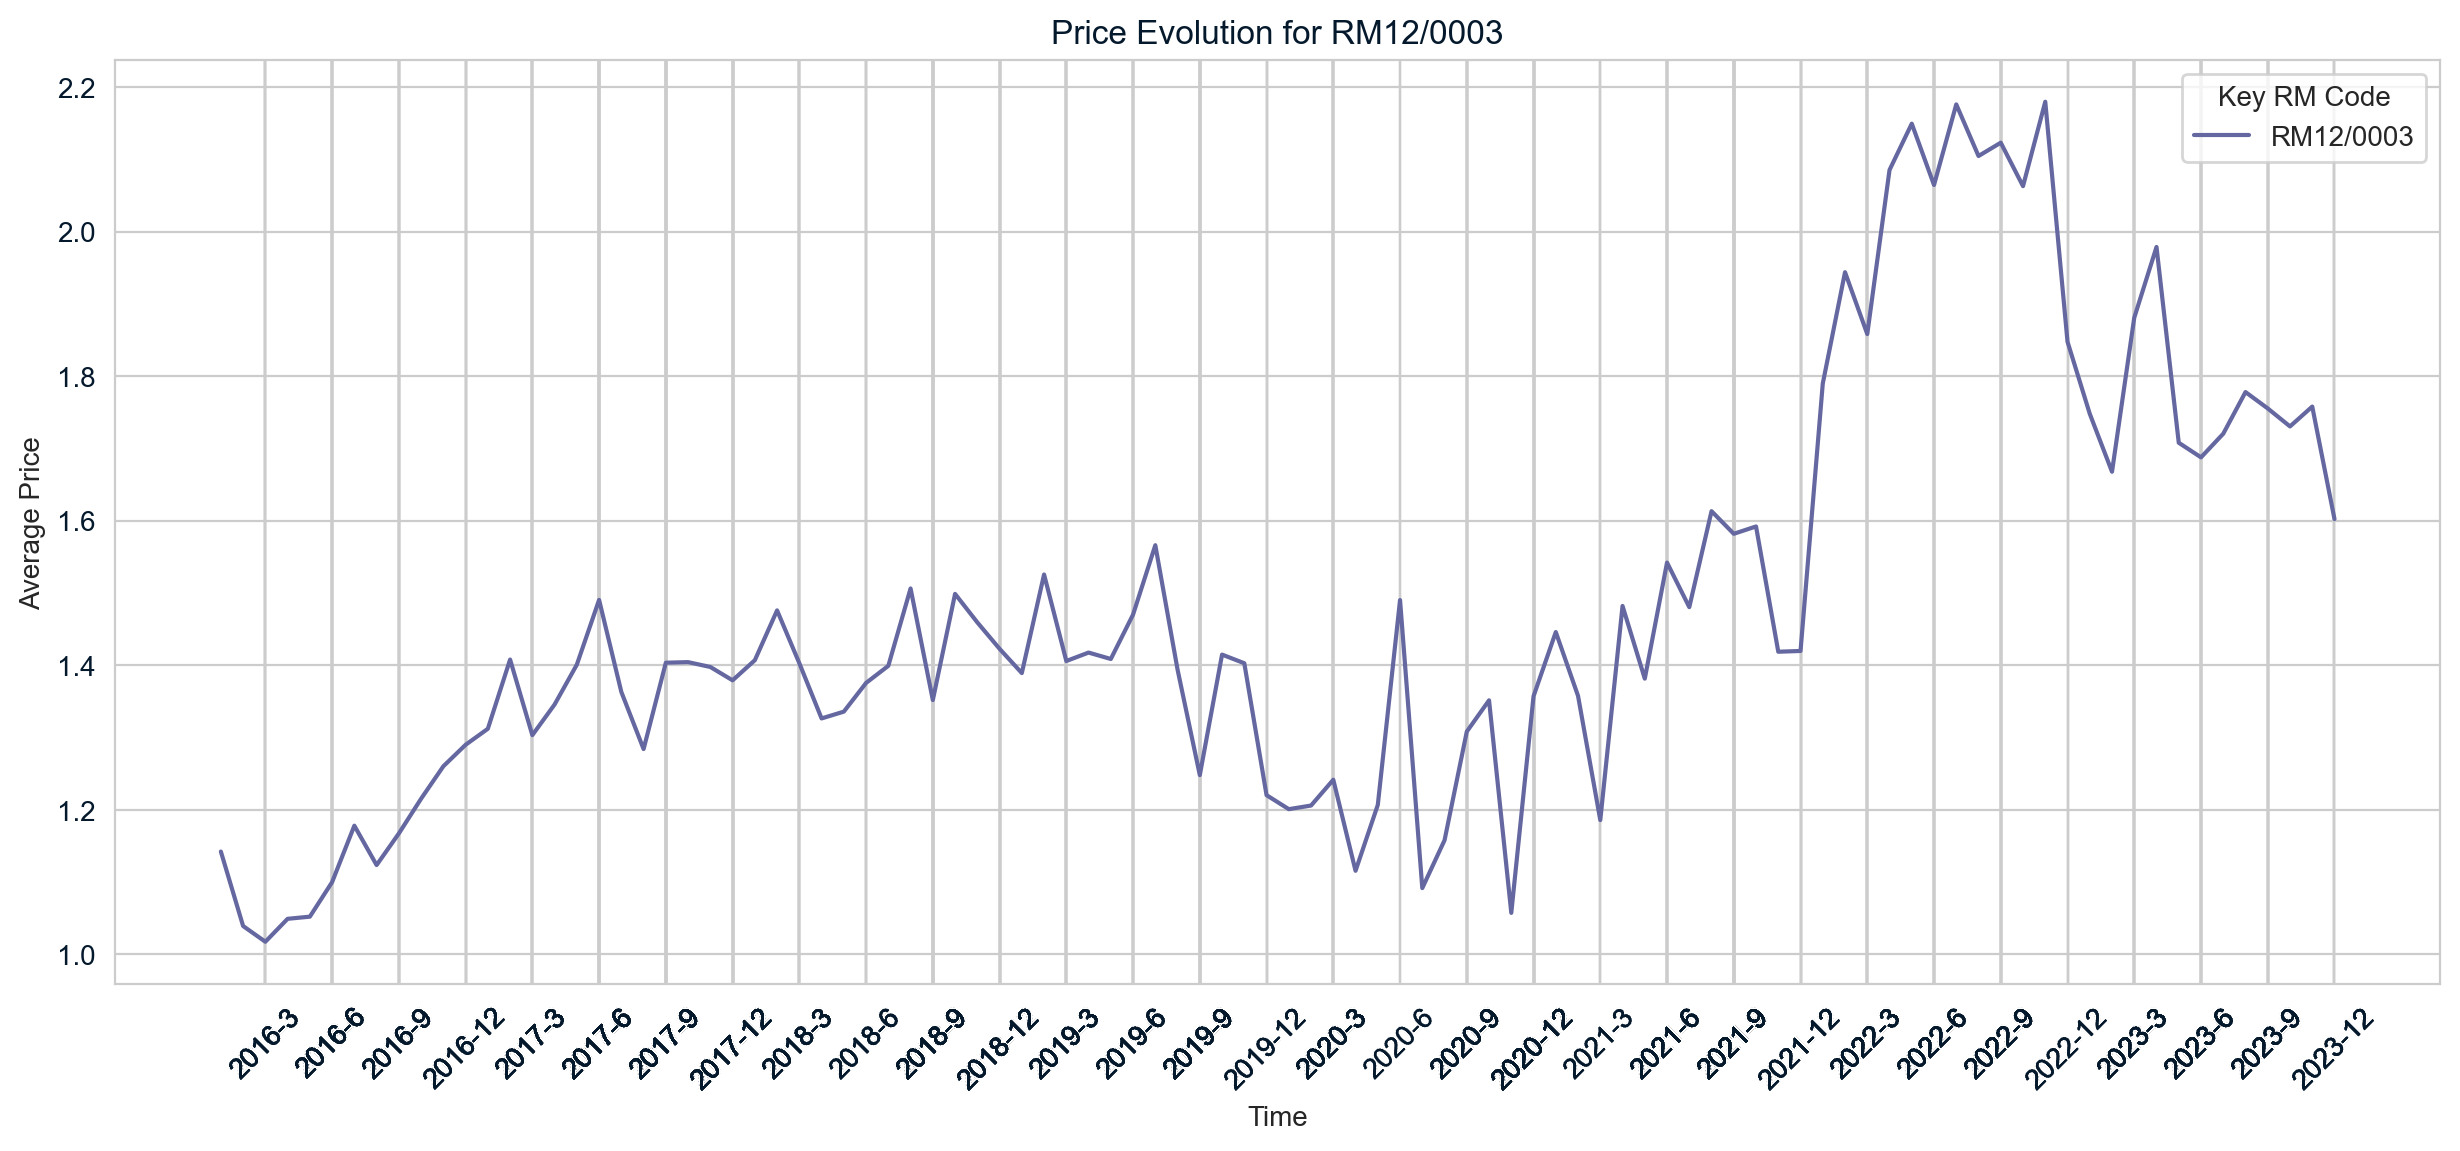

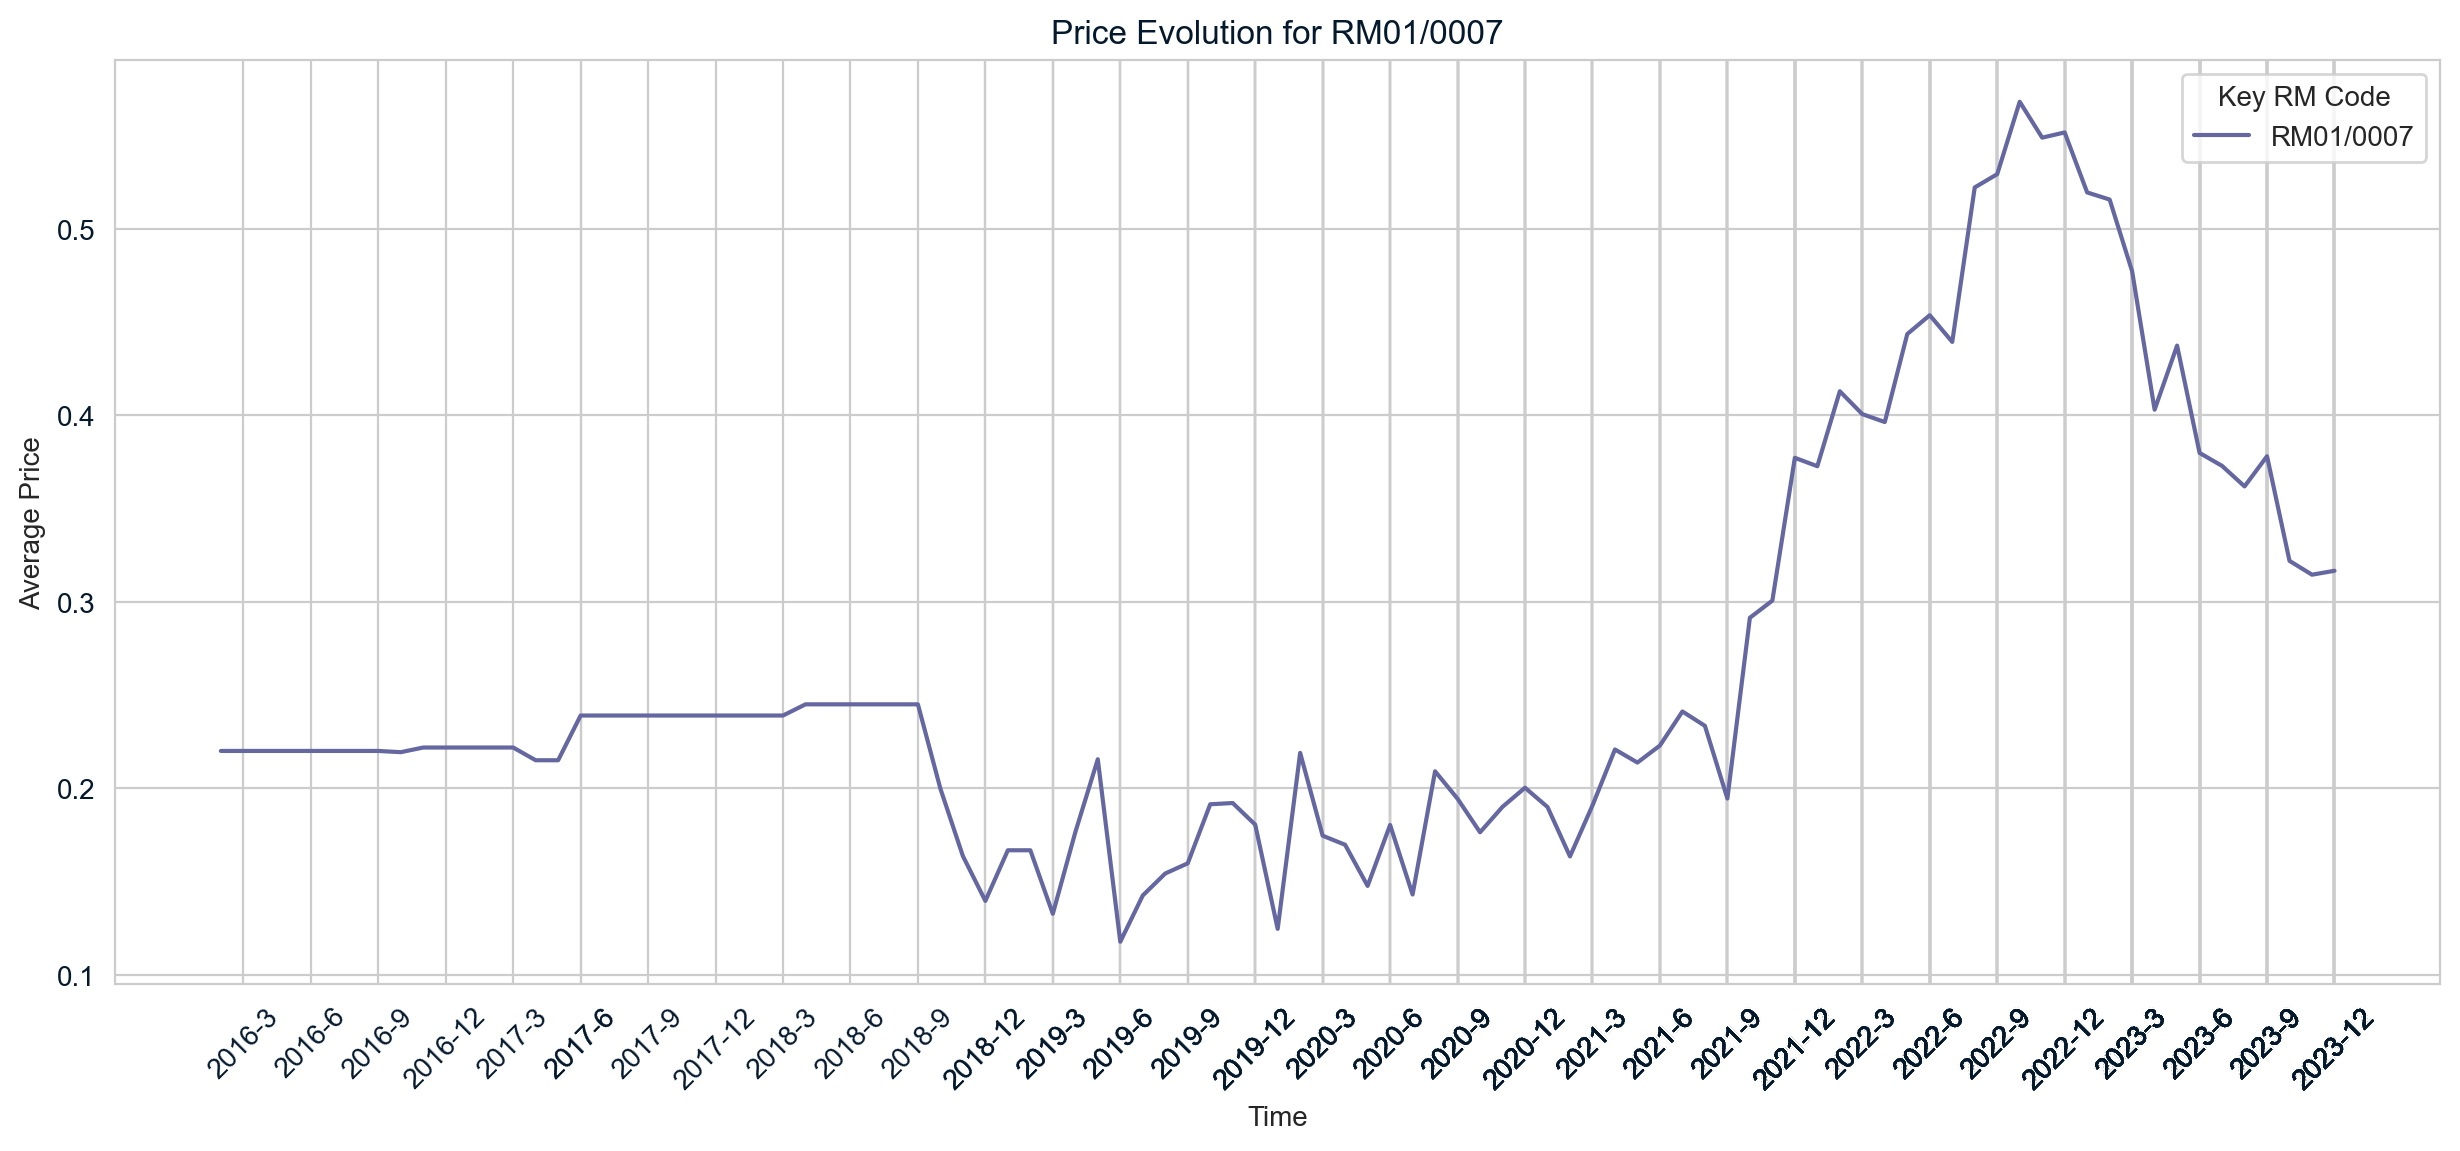

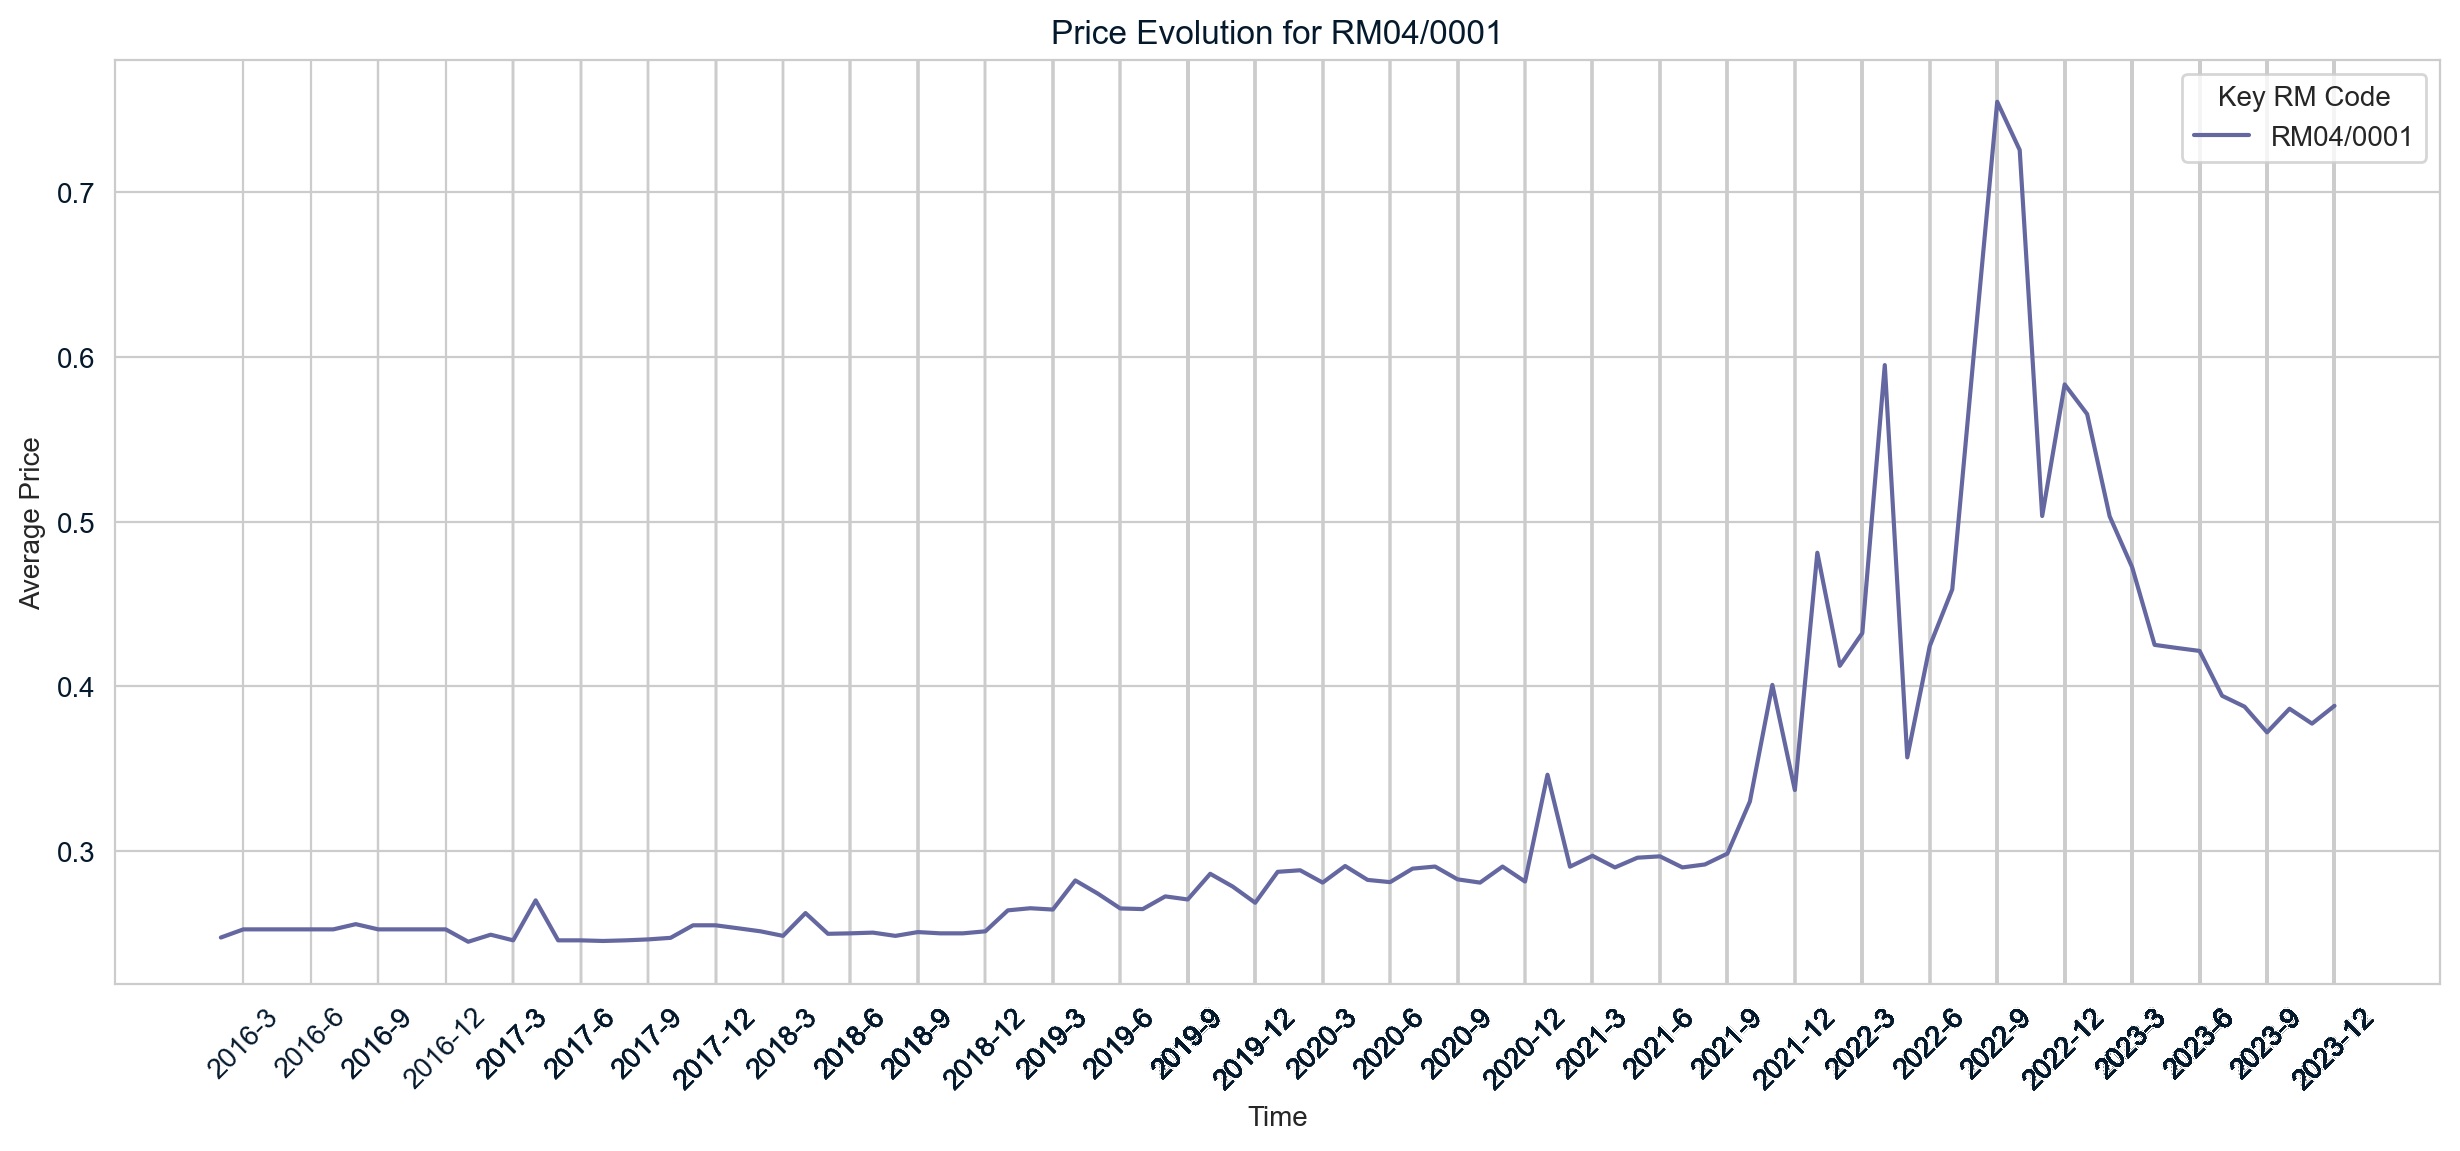

In [9]:
draw_actual_individual_graphs(imputed_df,target_dict)